# **<h1 align="center">Data Mining 2024-25</h3>**
## **<h3 align="center">Customer Segmentation - ABCDEats Inc.</h3>**
### **<h3 align="center">EDA and Preprocessing</h3>**


**Group 10 members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Marco Galão  - r20201545@novaims.unl.pt - r20201545<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub  - 20240505@novaims.unl.pt - 20240505<br>

<a id = "toc"></a>

# Table of Contents

* [1. Import the Libraries](#import_libraries)
* [2. Import the Dataset](#import_dataset)
* [3. Description of the Dataset’s Structure](#dataset_structure)
* [4. Exploring the Dataset](#exploration)
    * [4.1. Constant Features](#constant_features)
    * [4.2. Duplicates](#duplicates)
    * [4.3. Missing Values](#missing_values)
    * [4.4. Data Types](#data_types)
    * [4.5. Coherence Checking](#coherence_checking)
        * [4.5.1. Minors Customers](#sub_section_4_5_1)
        * [4.5.2. Last_order and First_order consistency](#sub_section_4_5_2)
        * [4.5.3. CUI_Asian vs Japonese, Chinese](#sub_section_4_5_3)
        * [4.5.4. Sum DOWs vs sum HRs](#sub_section_4_5_4)
        * [4.5.5. Is_chain variable](#sub_section_4_5_5)
        * [4.5.6. Total Orders and Vendor Count consistency ](#sub_section_4_5_6)      
        * [4.5.7. Total Orders equal to zero](#sub_section_4_5_7)
        * [4.5.8. Total rows with inconsistencies](#sub_section_4_5_8)
    * [4.6. Visualizations](#visualizations)
    * [4.7. Correlation Matrix](#correlation_matrix)
    * [4.8. Outliers](#outliers1)
* [5. Feature Engineering](#feature_engineering)
    * [5.1. Generation](#generation)
    * [5.2. Total Cuisine Spending](#total_cuisine_spending)
    * [5.3. Healthiness Index](#healthiness_index)
    * [5.4. Weekend and Weekday Orders](#weekend_and_weekday_orders)
    * [5.5. Hourly Orders Aggregation](#hourly_orders_aggregation)
    * [5.6. Order Recency](#Order_Recency)
    * [5.7. Average Daily Orders](#Average_Daily_Orders)
    * [5.8. Average Order Value](#Average_Order_Value)
    * [5.9. Last Promotion Indicator](#last_promotion_indicator)
    * [5.10. Chain Orders Proportion](#chain_orders_proportion)
    * [5.11. Cities](#cities)
    * [5.12. Cuisine Origin Spending](#cuisine_origin_spend)
    * [5.13. Meal Occasion Spending](#meal_occasion_spend)
* [6. Outliers](#outliers)
    * [6.1. Defining Relevant Metric Features](#defining_features)
    * [6.2. Histograms and Boxplots](#visualizations)
    * [6.3. Filtering](#filtering)
        * [6.3.1. IQR Method](#iqr_method)
        * [6.3.2. Manual Method](#manual_method)
        * [6.3.3. Winsorizing](#winsorizing)
     * [6.4. DBSCAN](#dbscan_outliers)
        * [6.4.1. Identify eps value (elbow method)](#eps)
        * [6.4.2. Choose min_samples value](#min_samples)
        * [6.4.3. Apply DBSCAN to detect outliers](#apply_dbscan_outliers)
        * [6.4.3. Winsorizing](#winsorizing_after_dbscan)
* [7. Feature Selection](#feature_selection)
* [8. Data Normalization](#data-normalization)
* [9. Export Preprocessed Dataset](#export_preproc_data)

# 1. Import the Libraries <a class="anchor" id="import_libraries"></a>
[Back to ToC](#toc)<br>

For tasks involving data manipulation, numerical calculations, visualization, and machine learning, imports of libraries like the mentioned in the below cell are crucial. These libraries offer the required functions and tools for preprocessing data, pattern analysis, consumer segmentation, and development of focused marketing campaigns.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

#Importing the functions created in main.py
from main import *
import importlib
imported_module = importlib.import_module("main")
importlib.reload(imported_module)

<module 'main' from 'c:\\Users\\xandg\\Ambiente de Trabalho\\IMS\\3rd year\\1st Semester\\Capstone Project\\OpenAI\\Capstone-Project\\CustomerSegmentationDataMining\\deliverables\\main.py'>

# 2. Import the Dataset <a class="anchor" id="import_dataset"></a>
[Back to ToC](#toc)<br>

In this section, we import the datasets and set the customer_id as the index column in DM2425_ABCDEats_DATASET. Also, check the first and last 5 rows of the dataset.

In [181]:
df_original = pd.read_csv("../Data/DM2425_ABCDEats_DATASET.csv", index_col="customer_id")
df_original.head().T

customer_id              1b8f824d5e 5d272b9dcb f6d1b2ba63 180c632ed8  \
customer_region                2360       8670       4660       4660   
customer_age                   18.0       17.0       38.0        NaN   
vendor_count                      2          2          1          2   
product_count                     5          2          2          3   
is_chain                          1          2          2          1   
first_order                     0.0        0.0        0.0        0.0   
last_order                        1          1          1          2   
last_promo                 DELIVERY   DISCOUNT   DISCOUNT   DELIVERY   
payment_method                 DIGI       DIGI       CASH       DIGI   
CUI_American                    0.0      12.82        9.2        0.0   
CUI_Asian                       0.0       6.39        0.0       13.7   
CUI_Beverages                   0.0        0.0        0.0        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                     0.0        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                    28.88        0.0        0.0      17.86   
CUI_Italian                     0.0        0.0        0.0        0.0   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             1          1          1          0   
DOW_1                             0          0          0          1   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          0   
DOW_5                             0          0          0          0   
DOW_6                             1          1          1          1   
HR_0                            0.0        0.0        0.0        0.0   
HR_1                              0          0          0          0   
HR_2                              0          0          0          0   
HR_3                              0          0          0          0   
HR_4                              0          0          0          0   
HR_5                              0          0          0          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          1          0   
HR_10                             0          1          0          0   
HR_11                             0          1          1          1   
HR_12                             0          0          0          0   
HR_13                             0          0          0          0   
HR_14                             0          0          0          1   
HR_15                             0          0          0          0   
HR_16                             0          0          0          0   
HR_17                             0          0          0          0   
HR_18                             2          0          0          0   
HR_19                             0          0          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             0     

In [182]:
df_original.tail().T

customer_id              f4e366c281 f6b6709018 f74ad8ce3f f7b19c0241  \
customer_region                8670       8670       8670       8670   
customer_age                   30.0        NaN       24.0       34.0   
vendor_count                      1          1          1          1   
product_count                     1          1          1          1   
is_chain                          1          0          1          0   
first_order                     NaN        NaN        NaN        NaN   
last_order                        0          0          0          0   
last_promo                  FREEBIE   DELIVERY          -   DISCOUNT   
payment_method                 DIGI       DIGI       DIGI       DIGI   
CUI_American                    0.0      18.04        0.0        0.0   
CUI_Asian                       0.0        0.0        0.0      12.03   
CUI_Beverages                 18.04        0.0        0.0        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                     0.0        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0      17.79        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                      0.0        0.0        0.0        0.0   
CUI_Italian                     0.0        0.0        0.0        0.0   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             0          0          0          0   
DOW_1                             0          0          0          0   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          0   
DOW_5                             0          0          0          0   
DOW_6                             1          1          1          1   
HR_0                            0.0        0.0        0.0        0.0   
HR_1                              0          0          0          0   
HR_2                              0          0          0          0   
HR_3                              0          0          0          0   
HR_4                              0          0          0          0   
HR_5                              0          0          1          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          0          0   
HR_10                             0          0          0          0   
HR_11                             0          0          0          1   
HR_12                             0          0          0          0   
HR_13                             1          0          0          0   
HR_14                             0          0          0          0   
HR_15                             0          0          0          0   
HR_16                             0          1          0          0   
HR_17                             0          0          0          0   
HR_18                             0          0          0          0   
HR_19                             0          0          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             0     

# 3. Description of the Dataset’s Structure<a class="anchor" id="dataset_structure"></a>
[Back to ToC](#toc)<br>

Here, let's try to identify missing values, check if data types are appropriate and performs summary statistics.

In [183]:
df_original.shape

(31888, 55)

In [184]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

<br>
The <span style="color:Blue"> info()  </span> method prints information about the DataFrame. Using this method we can evaluate the following:

Missing values:
- customer_age
- first_order
- HR_0

Data types:
- customer_age should be a integer
- first_order is number of days so should be a integer

The <span style="color:Blue"> describe()  </span> method  is used for calculating some statistical data.

In [185]:
df_original.describe().round(2).T

count   mean    std   min   25%   50%    75%  \
customer_age              31161.0  27.51   7.16  15.0  23.0  26.0  31.00   
vendor_count              31888.0   3.10   2.77   0.0   1.0   2.0   4.00   
product_count             31888.0   5.67   6.96   0.0   2.0   3.0   7.00   
is_chain                  31888.0   2.82   3.98   0.0   1.0   2.0   3.00   
first_order               31782.0  28.48  24.11   0.0   7.0  22.0  45.00   
last_order                31888.0  63.68  23.23   0.0  49.0  70.0  83.00   
CUI_American              31888.0   4.88  11.65   0.0   0.0   0.0   5.66   
CUI_Asian                 31888.0   9.96  23.56   0.0   0.0   0.0  11.83   
CUI_Beverages             31888.0   2.30   8.48   0.0   0.0   0.0   0.00   
CUI_Cafe                  31888.0   0.80   6.43   0.0   0.0   0.0   0.00   
CUI_Chicken Dishes        31888.0   0.77   3.66   0.0   0.0   0.0   0.00   
CUI_Chinese               31888.0   1.43   8.19   0.0   0.0   0.0   0.00   
CUI_Desserts              31888.0   0.88   5.26   0.0   0.0   0.0   0.00   
CUI_Healthy               31888.0   0.95   5.83   0.0   0.0   0.0   0.00   
CUI_Indian                31888.0   1.63   7.44   0.0   0.0   0.0   0.00   
CUI_Italian               31888.0   3.23  11.25   0.0   0.0   0.0   0.00   
CUI_Japanese              31888.0   3.00  10.18   0.0   0.0   0.0   0.00   
CUI_Noodle Dishes         31888.0   0.71   4.54   0.0   0.0   0.0   0.00   
CUI_OTHER                 31888.0   3.00   9.77   0.0   0.0   0.0   0.00   
CUI_Street Food / Snacks  31888.0   3.91  15.55   0.0   0.0   0.0   0.00   
CUI_Thai                  31888.0   0.84   4.43   0.0   0.0   0.0   0.00   
DOW_0                     31888.0   0.56   1.01   0.0   0.0   0.0   1.00   
DOW_1                     31888.0   0.57   1.04   0.0   0.0   0.0   1.00   
DOW_2                     31888.0   0.59   1.05   0.0   0.0   0.0   1.00   
DOW_3                     31888.0   0.62   1.07   0.0   0.0   0.0   1.00   
DOW_4                     31888.0   0.68   1.09   0.0   0.0   0.0   1.00   
DOW_5                     31888.0   0.65   1.07   0.0   0.0   0.0   1.00   
DOW_6                     31888.0   0.70   1.17   0.0   0.0   0.0   1.00   
HR_0                      30723.0   0.00   0.00   0.0   0.0   0.0   0.00   
HR_1                      31888.0   0.05   0.32   0.0   0.0   0.0   0.00   
HR_2                      31888.0   0.06   0.35   0.0   0.0   0.0   0.00   
HR_3                      31888.0   0.12   0.50   0.0   0.0   0.0   0.00   
HR_4                      31888.0   0.10   0.44   0.0   0.0   0.0   0.00   
HR_5                      31888.0   0.08   0.36   0.0   0.0   0.0   0.00   
HR_6                      31888.0   0.07   0.33   0.0   0.0   0.0   0.00   
HR_7                      31888.0   0.08   0.38   0.0   0.0   0.0   0.00   
HR_8                      31888.0   0.13   0.64   0.0   0.0   0.0   0.00   
HR_9                      31888.0   0.23   0.72   0.0   0.0   0.0   0.00   
HR_10                     31888.0   0.33   0.89   0.0   0.0   0.0   0.00   
HR_11                     31888.0   0.38   0.96   0.0   0.0   0.0   0.00   
HR_12                     31888.0   0.31   0.84   0.0   0.0   0.0   0.00   
HR_13                     31888.0   0.24   0.64   0.0   0.0   0.0   0.00   
HR_14                     31888.0   0.22   0.60   0.0   0.0   0.0   0.00   
HR_15                     31888.0   0.28   0.74   0.0   0.0   0.0   0.00   
HR_16                     31888.0   0.36   0.87   0.0   0.0   0.0   0.00   
HR_17                     31888.0   0.39   0.94   0.0   0.0   0.0   0.00   
HR_18                     31888.0   0.34   0.89   0.0   0.0   0.0   0.00   
HR_19                     31888.0   0.25   0.80   0.0   0.0   0.0   0.00   
HR_20                     31888.0   0.14   0.59   0.0   0.0   0.0   0.00   
HR_21                     31888.0   0.07   0.35   0.0   0.0   0.0   0.00   
HR_22                     31888.0   0.05   0.30   0.0   0.0   0.0   0.00   
HR_23                     31888.0   0.05   0.28   0.0   0.0   0.0   0.00   


As we can see the HR_0 is always equal to zero, so we can delete this feature.

In [186]:
df_original.describe(include="object")

customer_region last_promo payment_method
count            31888      31888          31888
unique               9          4              3
top               8670          -           CARD
freq              9761      16748          20161

Let's see the unique values that exist in categorical variables

In [187]:
(df_original["customer_region"].value_counts(normalize=True) * 100).round(2)

8670    30.61
4660    29.95
2360    27.69
2440     4.65
4140     2.69
8370     1.55
2490     1.40
-        1.39
8550     0.08
Name: customer_region, dtype: float64

In [188]:
(df_original["last_promo"].value_counts(normalize=True) * 100).round(2)

-           52.52
DELIVERY    19.71
DISCOUNT    14.10
FREEBIE     13.67
Name: last_promo, dtype: float64

Lets replace the - for None.

In [189]:
(df_original["payment_method"].value_counts(normalize=True) * 100).round(2)

CARD    63.22
DIGI    19.13
CASH    17.64
Name: payment_method, dtype: float64

So, there are hidden missing values in "customer_region" ("-") and we should evaluate what could mean "-" in "last_promo"

<a id = "exploration"></a>

# 4. Exploring the Dataset <a class="anchor" id="a"></a>
[Back to ToC](#toc)<br>

In this section we perform several checks and treatments to ensure data quality. <br>
This entails locating and managing duplicates to prevent redundant data, removing constant characteristics that don't offer insightful information, and dealing with missing values using methods like imputation or exclusion. These procedures are essential for preserving data integrity and enhancing the accuracy of later analysis and modeling efforts.

> ## 4.1. Constant features <a class="anchor" id="constant_features"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

The <span style='color:Blue'> var() </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0).

In [190]:
variances = df_original.var(numeric_only=True)
variances[variances == 0]

HR_0    0.0
dtype: float64

Let's drop the univariate feature "HR_0"

In [191]:
df_no_hr0 = df_original.drop("HR_0", axis = 1)

> ## 4.2. Duplicates <a class="anchor" id="duplicates"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

With the <span style="color:Blue"> drop_duplicates() </span> method the duplicates rows will be dropped. We can conclude that that this dataset had 60 duplicates.

Check for duplicated indexes

In [192]:
df_no_hr0.index.duplicated().sum()

13

In [193]:
df_no_duplicates = df_no_hr0[~df_no_hr0.index.duplicated(keep='first')]

In [194]:
df_no_duplicates.index.duplicated().sum()

0

Check for duplicated rows (without considering indexes)

In [195]:
df_no_duplicates.duplicated().sum()

47

In [196]:
df_no_duplicates.drop_duplicates(inplace=True)

In [197]:
df_no_duplicates.duplicated().sum()

0

In [198]:
df_no_duplicates.shape

(31828, 54)

**Conclusion:**

In [199]:
# Calculate the number of rows removed
rows_removed = len(df_no_hr0) - len(df_no_duplicates)

print(len(df_no_hr0))

# Calculate the percentage of rows removed
percent_removed = (rows_removed / len(df_no_hr0)) * 100

# Print the results
print(f"Rows removed due to duplicates: {rows_removed} ({round(percent_removed, 2)}%)")

31888
Rows removed due to duplicates: 60 (0.19%)


> ## 4.3. Missing values <a class="anchor" id="missing_values"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

As we concluded there are some features that have some missing values. In this subsection we will check for each feature and try to understand what would be the best approach.

In [200]:
df_treat_missing = df_no_duplicates.copy()

In [201]:
# Calculate the percentage of disguised missing values "-" in each column
perc_dash_values = (df_treat_missing.apply(lambda x: (x == '-').sum()) / len(df_treat_missing) * 100).round(2)
perc_dash_values[perc_dash_values > 0].sort_values(ascending=False)

last_promo         52.54
customer_region     1.39
dtype: float64

In [202]:
# Calculate percentage of missing values in each column
perc_missing_values = (df_treat_missing.isna().sum() / len(df_treat_missing) * 100).round(2)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

customer_age    2.28
first_order     0.33
dtype: float64

> ### Missing values in **last_promo**


Evaluate "-" values

In [203]:
(df_treat_missing["last_promo"].value_counts(normalize=True, ascending=False) * 100).round(2)

-           52.54
DELIVERY    19.70
DISCOUNT    14.11
FREEBIE     13.65
Name: last_promo, dtype: float64

Create new columns (and auxiliary variables with column names) to help creating visualizations

**auxiliary variables:**
* metric features
* non metric features
* metric features excluding cui/dow/hr columns

In [204]:
# New columns

# Select all columns that start with "CUI_"
cui_columns = df_treat_missing.filter(like="CUI_").columns.tolist()
dow_columns = df_treat_missing.filter(like="DOW_").columns.tolist()
hr_columns = df_treat_missing.filter(like="HR_").columns.tolist()

# Fill NaN values with 0 before summing
df_treat_missing["total_cui_spending"] = df_treat_missing[cui_columns].sum(axis=1)
df_treat_missing["total_orders"] = df_treat_missing[dow_columns].sum(axis=1)

# Auxiliary variables

# Define metric and non-metric features
metric_features = df_treat_missing.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_treat_missing.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW and HR (and CUI) columns from metric features
metric_features_excluding_dow_and_hr = [feat for feat in metric_features if feat not in dow_columns + hr_columns]
metric_features_excluding_cui_dow_and_hr = [feat for feat in metric_features if feat not in cui_columns + dow_columns + hr_columns]

<br>
To improve the visualizations and maintain coherence across all of them, let's define a consistent color palette that will be applied throughout.

https://seaborn.pydata.org/tutorial/color_palettes.html#sequential-color-brewer-palettes

In [205]:
# Set color palette
color_palette = "Set2"

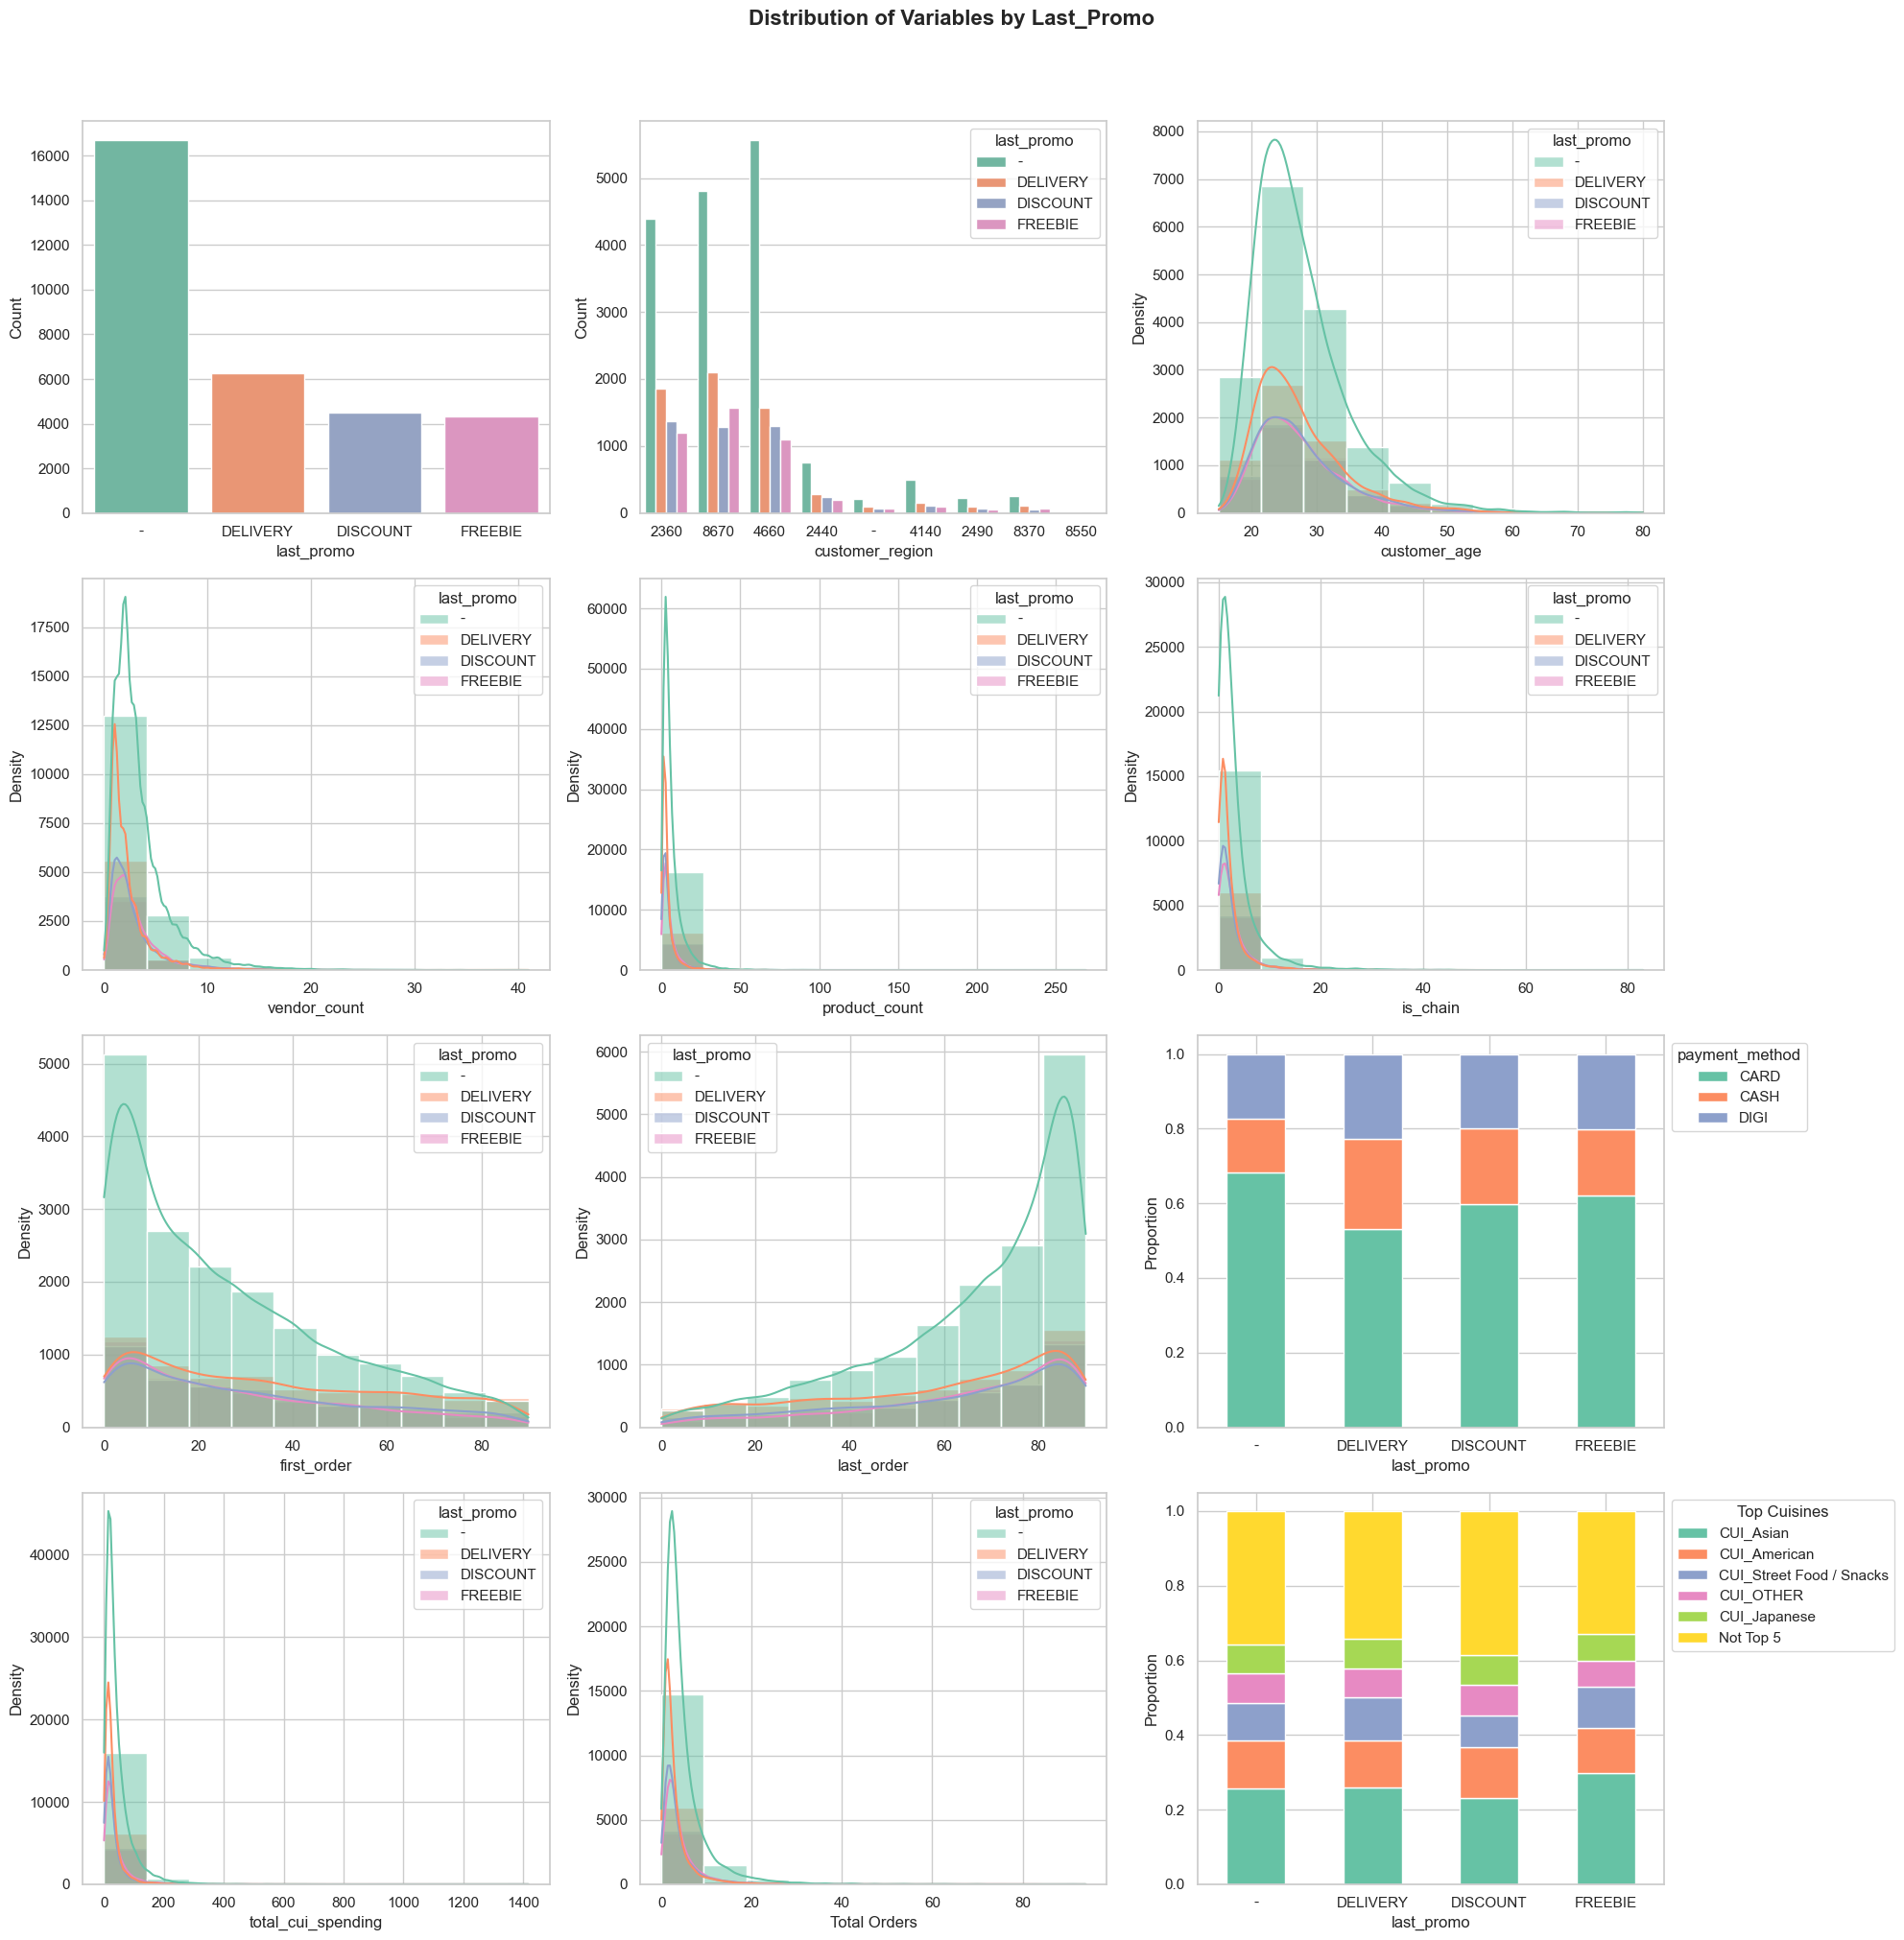

In [206]:
# For last_promo
# This function is defined in main.py
plot_grouped_distributions(df_treat_missing, group_by_variable='last_promo', color_palette=color_palette)

**Conclusion:** All "last_promo" categories, including those labeled with “-”, display similar distribution shapes. This consistency across distributions suggests that the records marked with “-” are not random and likely represent a specific group of customers rather than missing data. Therefore, we can infer that they indicate customers who did not engage with any promotions. By doing so, we allow for more effective segmentation and insights into customer behavior.

In [207]:
df_treat_missing["last_promo"].replace("-", 'NOPROMO', inplace=True)

> ### Missing values in **customer_region**


Notes:
- Values could represent postal codes
- Check if customer region values with similar prefix indicate geographical proximity

In [208]:
(df_treat_missing["customer_region"].value_counts(normalize=True, ascending=False) * 100).round(2)

8670    30.63
4660    29.95
2360    27.70
2440     4.66
4140     2.69
8370     1.56
2490     1.39
-        1.39
8550     0.04
Name: customer_region, dtype: float64

In [209]:
df_treat_missing.isna().sum().sum()

833

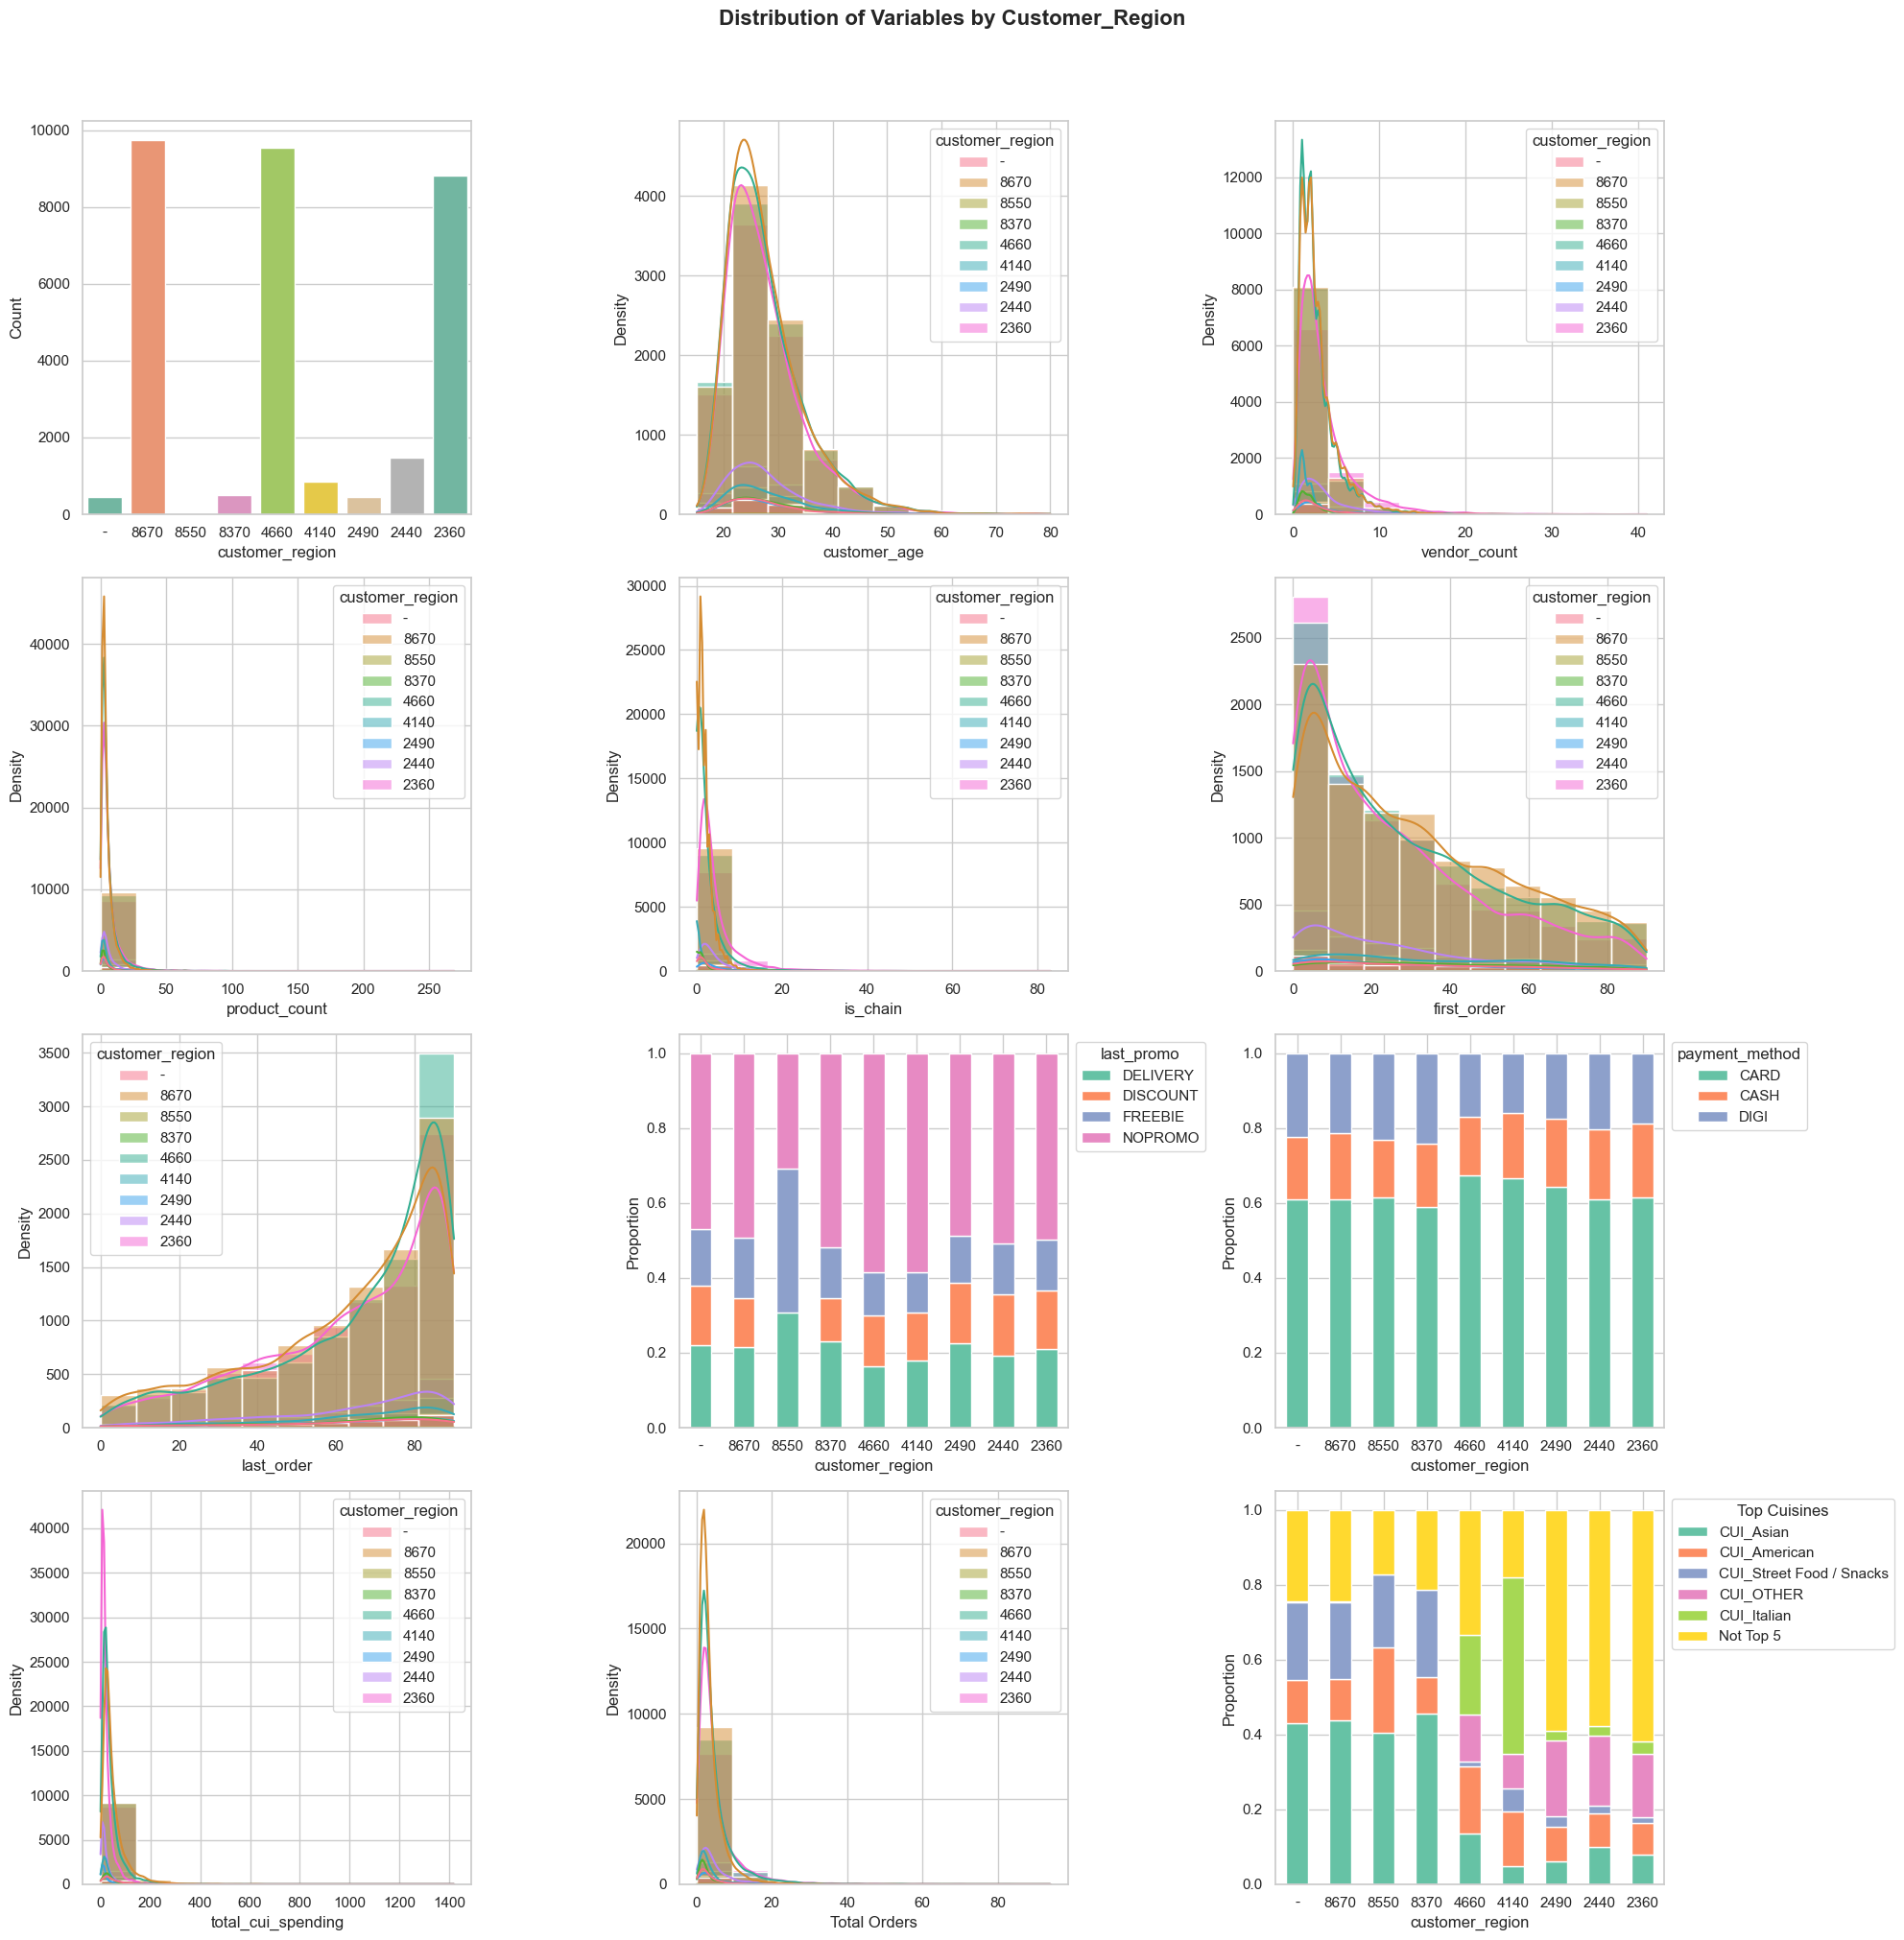

In [210]:
# For customer_region
# This function is defined in main.py
plot_grouped_distributions(df_treat_missing, group_by_variable='customer_region', color_palette=color_palette)

**Conclusion:** After analyzing the plots, it appears that customer region values with similar prefixes indicate geographical proximity, as they exhibit similar behavior and statistics. This observation aligns with the project description, which notes that the data was collected from three cities. 

1. **Group 1:**
   - 8670
   - 8550
   - 8370

2. **Group 2:**
   - 4660
   - 4140

3. **Group 3:**
   - 2490
   - 2440
   - 2360

Additionally, the customer region represented by `"-"` shares more similarities with the regions `8670` and `8370`. 

**Next steps:** The next step is to identify the customer region that is most similar to `"-"` (`8670` or `8370`).

In [211]:
# # Set seaborn style and color palette
# sns.set_theme()
# sns.set_palette(color_palette)  # Consistent color palette across all plots

# # Define relevant regions
# regions = ['-', '8670', '8550', '8370']

# # Filter DataFrame for the selected regions
# df_selected = df_treat_missing[df_treat_missing['customer_region'].isin(regions)]

# # Sum spending for each cuisine type per region
# region_spending = df_selected.groupby('customer_region')[cui_columns].sum()

# # Calculate total spending percentages for each cuisine type by region
# region_percentages = region_spending.div(region_spending.sum(axis=1), axis=0) * 100

# # Calculate the percentage difference relative to customer_region '-'
# reference_region = '-'
# region_differences = region_percentages.loc[['8670', '8550', '8370']].subtract(region_percentages.loc[reference_region], axis=1)

# # Prepare DataFrame for plotting
# region_differences = region_differences.reset_index().melt(id_vars='customer_region', var_name='cuisine', value_name='percentage_difference')

# # Plot the difference in percentages compared to region '-'
# plt.figure(figsize=(10, 6))
# sns.barplot(data=region_differences, x='cuisine', y='percentage_difference', hue='customer_region', palette=color_palette, alpha=1.0)
# plt.title('Percentage Difference in Spending for Selected Cuisines by Region (Compared to "-")', fontsize=16, weight='bold')
# plt.ylabel('Percentage Difference')
# plt.xlabel('Cuisines')
# plt.xticks(rotation=0, ha='center')
# plt.legend(title='customer_region', bbox_to_anchor=(1, 1))

# # Layout and display
# plt.tight_layout(rect=[0, 0, 1, 0.98])
# plt.show()

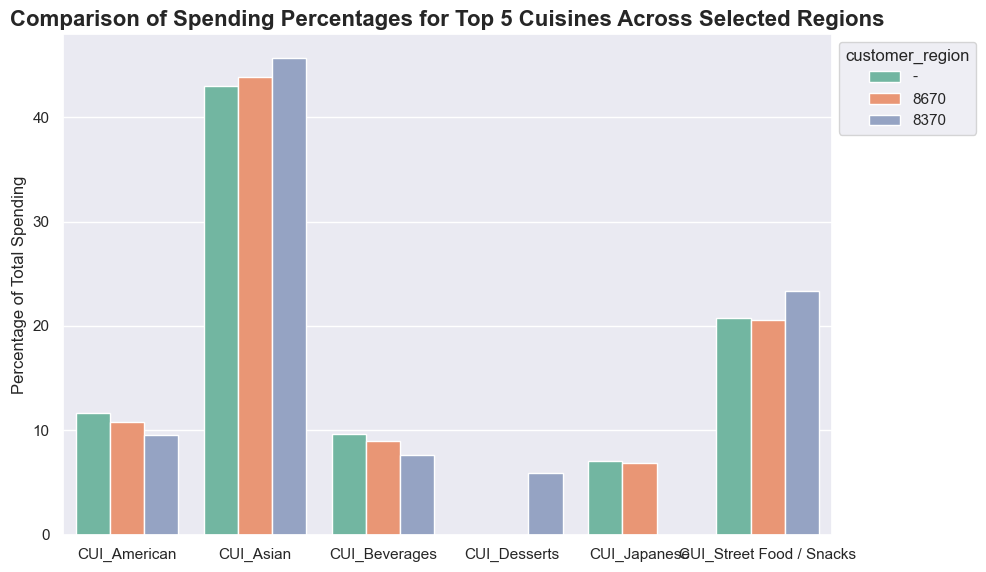

In [212]:
# Set seaborn style and color palette
sns.set_theme()
sns.set_palette(color_palette)  # Consistent color palette across all plots

# Define relevant regions
regions = ['-', '8670', '8370']

# Filter DataFrame for the selected regions
df_selected = df_treat_missing[df_treat_missing['customer_region'].isin(regions)]

# Sum spending for each cuisine type per region
region_spending = df_selected.groupby('customer_region')[cui_columns].sum()

# Calculate total spending percentages for each cuisine type by region
region_percentages = region_spending.div(region_spending.sum(axis=1), axis=0) * 100

# Create a comparison DataFrame for the top 5 cuisines per region
top_cuisine_percentages = {}

for region in regions:
    top_cuisines = region_spending.loc[region].nlargest(5).index
    top_percentages = region_percentages.loc[region, top_cuisines]
    top_cuisine_percentages[region] = top_percentages

# Convert to DataFrame
comparison_df = pd.DataFrame(top_cuisine_percentages).reset_index().melt(id_vars='index', var_name='customer_region', value_name='percentage')

# Plot using Seaborn's countplot to visualize the top cuisines by region
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='index', y='percentage', hue='customer_region', palette=color_palette, alpha=1.0)
plt.title('Comparison of Spending Percentages for Top 5 Cuisines Across Selected Regions', fontsize=16, weight='bold')
plt.ylabel('Percentage of Total Spending')
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.legend(title='customer_region', bbox_to_anchor=(1, 1))

# Layout and display
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

The visualization suggests that customers from the empty region `-` are geographically close to those in region `8670`. Therefore, we will reassign the region for all customers classified under `-` to `8670`.

**Note:** In the future, we will use KNN to replace the values represented by "-" with the mode of the nearest neighbors.

In [213]:
df_treat_missing['customer_region'].replace('-', '8670', inplace=True)

> ### Missing values in **customer_age**


In [214]:
# Calculate percentage of missing values in "customer_age"
perc_missing_customer_age = (df_treat_missing["customer_age"].isna().sum() / len(df_treat_missing) * 100).round(2)

# Print percentage of missing values
print(f"{perc_missing_customer_age}%")

2.28%


In [215]:
nan_age = df_treat_missing[df_treat_missing['customer_age'].isna()]
nan_age[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

count   mean    std   min    25%    50%    75%     max
customer_age          0.0    NaN    NaN   NaN    NaN    NaN    NaN     NaN
vendor_count        727.0   3.17   2.58  1.00   1.00   2.00   4.00   18.00
product_count       727.0   5.95   6.99  1.00   2.00   4.00   7.00   68.00
is_chain            727.0   3.00   3.96  0.00   1.00   2.00   4.00   43.00
first_order         725.0  27.51  23.74  0.00   7.00  21.00  43.00   89.00
last_order          727.0  65.17  22.37  0.00  51.00  72.00  83.50   90.00
total_cui_spending  727.0  40.38  50.11  1.14  13.39  24.72  44.27  606.84
total_orders        727.0   4.57   5.14  1.00   2.00   3.00   5.00   53.00

In [216]:
nan_age.describe(include='object').T

count unique      top freq
customer_region   727      7     2360  220
last_promo        727      4  NOPROMO  412
payment_method    727      3     CARD  463

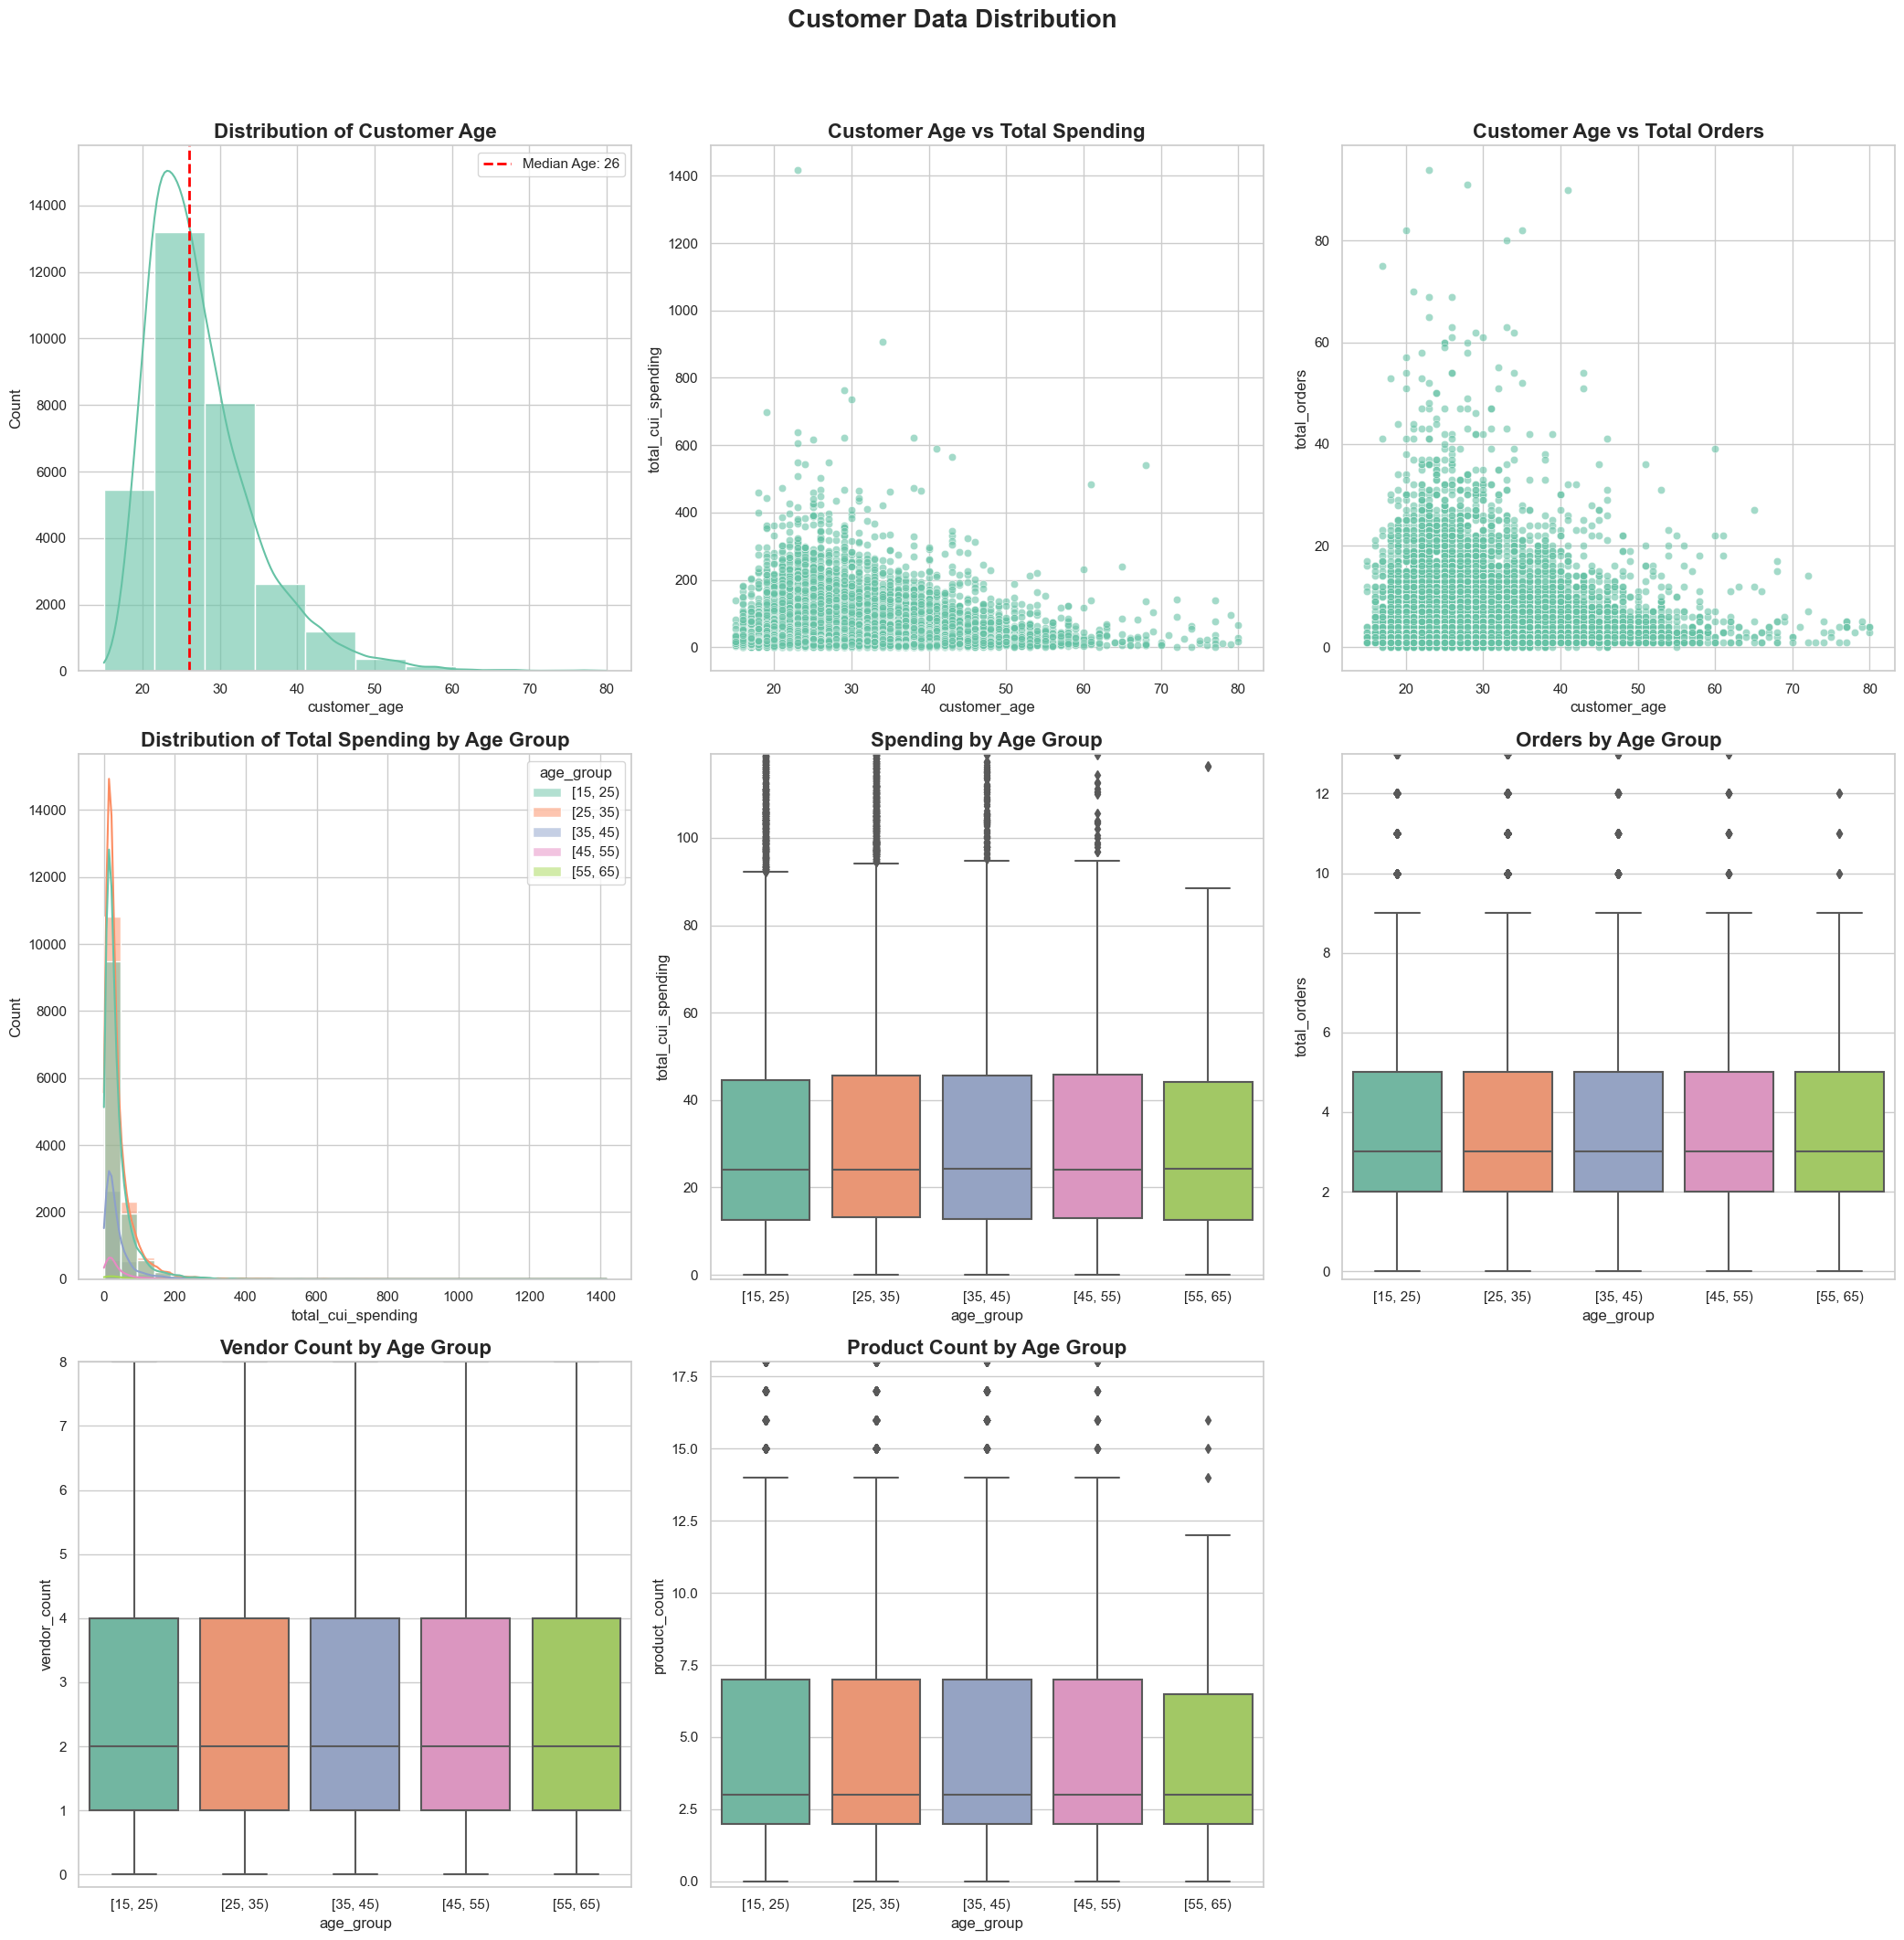

In [217]:
# For customer_age
# This function is defined in main.py
plot_customer_distributions(
    df_treat_missing,
    age_column='customer_age',
    spending_column='total_cui_spending',
    orders_column='total_orders',
    vendor_column='vendor_count',
    product_column='product_count',
    color_palette=color_palette
)

The visualization suggests:
* the Age of our customer is mostly 50 or less.
* that the spending and total orders in each customer group is very similiar distributed.
* Product count and vendor count is similiar distributed accross age

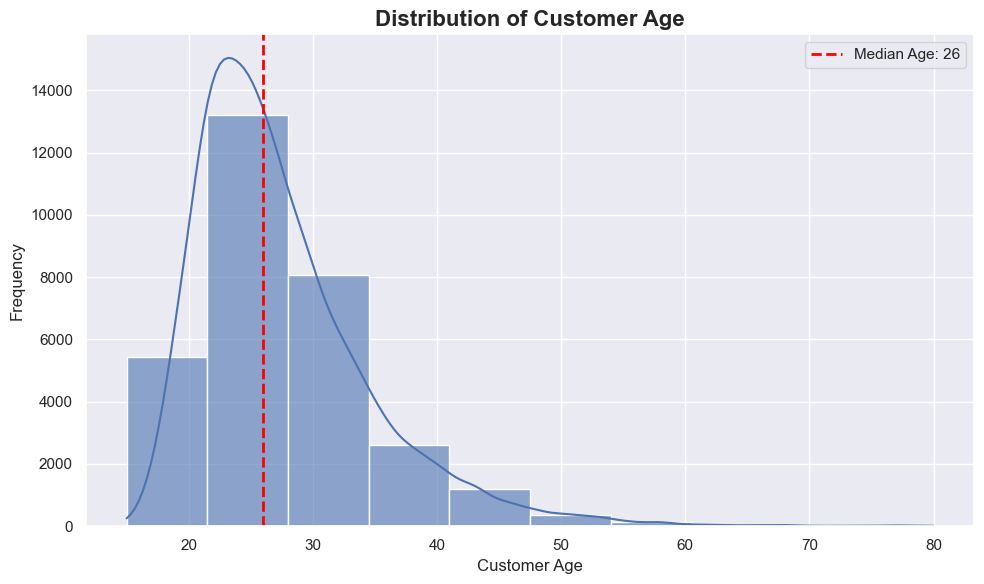

In [218]:
# Set seaborn style
sns.set()

# Assuming 'df_treat_missing' contains the relevant data and 'customer_age' is one of the columns
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(df_treat_missing['customer_age'], bins=10, kde=True, alpha=0.6)

# Calculate the median age and add a vertical line
median_age = df_treat_missing['customer_age'].median()
plt.axvline(median_age, color='red', linestyle='--', linewidth=2, label=f'Median Age: {round(median_age)}')

# Set titles and labels
plt.title('Distribution of Customer Age', fontsize=16, weight='bold')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [219]:
# Calculate the number of rows removed due to duplicates and missing values
rows_removed_due_to_duplicates_and_missing = len(df_no_hr0) - len(df_treat_missing)

# Calculate the percentage of rows removed
percent_rows_removed_due_to_duplicates_and_missing = rows_removed_due_to_duplicates_and_missing / len(df_no_hr0) * 100

# Calculate the number of values imputed
values_imputed = df_no_duplicates.isna().sum().sum() - df_treat_missing.isna().sum().sum()
percent_values_imputed = (values_imputed / df_treat_missing.size) * 100

# Print the results
print(f"Rows removed due to duplicates and missing values: {rows_removed_due_to_duplicates_and_missing} ({round(percent_rows_removed_due_to_duplicates_and_missing, 2)}%)")
print(f"Values imputed due to duplicates and missing data: {values_imputed} ({round(percent_values_imputed, 2)}%)")

Rows removed due to duplicates and missing values: 60 (0.19%)
Values imputed due to duplicates and missing data: 0 (0.0%)


**Conclusion:** The analysis of descriptive statistics for the relevant variables revealed no significant standout features. With only 2.28% of data missing, we will impute the missing customer ages using the median (the median is robust to outliers and provides a more accurate reflection of a typical value, especially in skewed distributions).

In [220]:
df_treat_missing['customer_age'].fillna(median_age, inplace=True)

**Future:** Try with KNN

In [221]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Make a copy of the dataframe
# df_kNN_impute = df_treat_missing.copy()

# # Store the original index
# original_index = df_kNN_impute.index

# # Get categorical columns
# categorical_columns = df_kNN_impute.select_dtypes(include=['object', 'category']).columns.tolist()

# # Dictionary to store label encoders
# label_encoders = {}

# # Encode categorical variables
# for col in categorical_columns:
#     # Convert categorical column to string type first
#     df_kNN_impute[col] = df_kNN_impute[col].astype(str)
    
#     # Replace 'nan' strings with 'MISSING'
#     df_kNN_impute[col] = df_kNN_impute[col].replace('nan', 'MISSING')
    
#     le = LabelEncoder()
#     df_kNN_impute[col] = le.fit_transform(df_kNN_impute[col])
#     label_encoders[col] = le

# # Scale numerical columns
# numerical_columns = df_kNN_impute.select_dtypes(include=['int64', 'float64']).columns.tolist()
# scaler = StandardScaler()
# df_kNN_impute[numerical_columns] = scaler.fit_transform(df_kNN_impute[numerical_columns])

# # Initialize and fit KNN imputer
# imputer = KNNImputer(n_neighbors=5)
# imputed_array = imputer.fit_transform(df_kNN_impute)

# # Convert back to dataframe with original index
# df_imputed = pd.DataFrame(imputed_array, columns=df_kNN_impute.columns, index=original_index)

# # Inverse transform numerical columns
# df_imputed[numerical_columns] = scaler.inverse_transform(df_imputed[numerical_columns])

# # Inverse transform categorical columns
# for col in categorical_columns:
#     df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col].astype(int))
#     # If the original column was categorical, convert back to category type
#     if df_treat_missing[col].dtype.name == 'category':
#         df_imputed[col] = pd.Categorical(df_imputed[col], categories=df_treat_missing[col].cat.categories)

# # Now let's compare the values before and after imputation
# print("Original missing values:", df_treat_missing['customer_age'].isna().sum())
# print("Remaining missing values:", df_imputed['customer_age'].isna().sum())

# # Get the original indices where customer_age was NaN
# nan_indices = df_treat_missing[df_treat_missing['customer_age'].isna()].index

# # Create a comparison DataFrame
# comparison_df = pd.DataFrame({
#     'Original': df_treat_missing['customer_age'][nan_indices],
#     'Imputed': df_imputed['customer_age'][nan_indices]
# })

# # Round imputed values to 2 decimal places for better readability
# comparison_df['Imputed'] = comparison_df['Imputed'].round(2)

# # Show the comparison
# print("\nComparison of NaN values before and after imputation:")
# print(comparison_df)

# df_treat_missing['customer_age'] = df_imputed['customer_age']

> ### Missing values in **first_order**


In [222]:
# Calculate percentage of missing values in "first_order"
perc_missing_first_order = (df_treat_missing["first_order"].isna().sum() / len(df_treat_missing) * 100).round(2)

# Print percentage of missing values
print(f"{perc_missing_first_order}%")

0.33%


In [223]:
nan_first_order = df_treat_missing[df_treat_missing['first_order'].isna()]
nan_first_order[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

count   mean    std   min    25%    50%    75%     max
customer_age        106.0  28.75   7.42  18.0  23.00  27.50  32.00   60.00
vendor_count        106.0   1.02   0.14   1.0   1.00   1.00   1.00    2.00
product_count       106.0   1.31   0.72   1.0   1.00   1.00   1.75    7.00
is_chain            106.0   0.57   0.52   0.0   0.00   1.00   1.00    2.00
first_order           0.0    NaN    NaN   NaN    NaN    NaN    NaN     NaN
last_order          106.0   0.00   0.00   0.0   0.00   0.00   0.00    0.00
total_cui_spending  106.0  14.23  12.41   1.0   6.14  12.08  18.84  105.55
total_orders        106.0   1.02   0.14   1.0   1.00   1.00   1.00    2.00

In [224]:
nan_first_order.describe(include='object').T

count unique       top freq
customer_region   106      6      8670   50
last_promo        106      4  DELIVERY   37
payment_method    106      3      CARD   44

In [225]:
# Filter the DataFrame based on 'vendor_count' condition
filtered_nan_first_order = nan_first_order[nan_first_order['total_orders'] != 1]

# Select the relevant features the DataFrame
filtered_nan_first_order[metric_features_excluding_cui_dow_and_hr + dow_columns].T

customer_id         1f9cd0d268  c3690a6fa1
customer_age             30.00       27.00
vendor_count              2.00        2.00
product_count             2.00        7.00
is_chain                  2.00        1.00
first_order                NaN         NaN
last_order                0.00        0.00
total_cui_spending        4.08      105.55
total_orders              2.00        2.00
DOW_0                     0.00        0.00
DOW_1                     0.00        0.00
DOW_2                     0.00        0.00
DOW_3                     0.00        0.00
DOW_4                     0.00        0.00
DOW_5                     0.00        0.00
DOW_6                     2.00        2.00

In [226]:
# Calculate the percentage of those customers in the DataFrame
percentage_filtered = len(filtered_nan_first_order) / len(df_treat_missing) * 100

# Print percentage
print(f"Filtered customers make up {round(percentage_filtered, 2)}% of the dataset.")

Filtered customers make up 0.01% of the dataset.


**Conclusion:** Since most customers with missing first_order data have last_order = 0 and total_orders = 1, we know they placed only one order on the first day of the dataset. Therefore, we can confidently impute first_order as 0 for these cases.

For the two customers with total_orders = 2, while they placed their orders on DOW_6 with two vendors, it’s possible that these orders occurred across different Saturdays. Given this minor ambiguity affects only 0.01% of the data, we can remove these cases without significantly impacting the dataset’s integrity.

In [227]:
# Update `first_order` with `last_order` for all customers with missing `first_order`
df_treat_missing.loc[nan_first_order.index, 'first_order'] = df_treat_missing.loc[nan_first_order.index, 'last_order']

# Identify customers, with missing `first_order`, where `total_orders` is different than 1
customers_to_remove = nan_first_order[nan_first_order['total_orders'] != 1].index

# Drop the two customers with missing `first_order` and `total_orders` different than 1
df_treat_missing.drop(index=customers_to_remove, inplace=True)

> ### Missing values conclusion


In [228]:
df_treat_missing.isna().sum().sum()

0

In [229]:
# Calculate the number of rows removed due to missing values
rows_removed_due_to_missing = len(df_no_duplicates) - len(df_treat_missing)

print()

# Calculate the percentage of rows removed
percent_rows_removed_due_to_missing = rows_removed_due_to_missing / len(df_no_duplicates) * 100

# Calculate the number of values imputed
values_imputed = df_no_duplicates.isna().sum().sum() - df_treat_missing.isna().sum().sum()
percent_values_imputed = (values_imputed / df_treat_missing.size) * 100

# Print the results
print(f"Rows removed due to missing values: {rows_removed_due_to_missing} ({round(percent_rows_removed_due_to_missing, 2)}%)")
print(f"Values imputed due to missing data: {values_imputed} ({round(percent_values_imputed, 2)}%)")


Rows removed due to missing values: 2 (0.01%)
Values imputed due to missing data: 833 (0.05%)


In [230]:
# Calculate the number of rows removed due to duplicates and missing values
rows_removed_due_to_duplicates_and_missing = len(df_no_hr0) - len(df_treat_missing)

# Calculate the percentage of rows removed
percent_rows_removed_due_to_duplicates_and_missing = rows_removed_due_to_duplicates_and_missing / len(df_no_hr0) * 100

# Calculate the number of values imputed
values_imputed = df_no_duplicates.isna().sum().sum() - df_treat_missing.isna().sum().sum()
percent_values_imputed = (values_imputed / df_treat_missing.size) * 100

# Print the results
print(f"Rows removed due to duplicates and missing values: {rows_removed_due_to_duplicates_and_missing} ({round(percent_rows_removed_due_to_duplicates_and_missing, 2)}%)")
print(f"Values imputed due to duplicates and missing data: {values_imputed} ({round(percent_values_imputed, 2)}%)")

Rows removed due to duplicates and missing values: 62 (0.19%)
Values imputed due to duplicates and missing data: 833 (0.05%)


> ## 4.4. Data Types <a class="anchor" id="data_types"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [231]:
df_adjust_dtypes = df_treat_missing.copy()
df_adjust_dtypes.dtypes

customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

**Notes:**
- age: should be integer
- first order: is number of days so should also be integer

In [232]:
# Using "Int64" allows for the representation of NaN values alongside integers
df_adjust_dtypes["customer_age"] = df_adjust_dtypes["customer_age"].astype("Int64")
df_adjust_dtypes["first_order"] = df_adjust_dtypes["first_order"].astype("Int64")

> ## 4.5. Coherence Checking <a class="anchor" id="coherence_checking"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

> ### 4.5.1. Minors Customers <a class="anchor" id="sub_section_4_5_1"></a>

In [233]:
df_inconsistencies = df_adjust_dtypes.copy()

Verify if there are minor customers (should not exist, because they are not allowed to placed orders online)

In [234]:
# Check the age distribution
df_inconsistencies["customer_age"].describe()

count      31826.0
mean     27.473858
std       7.085639
min           15.0
25%           23.0
50%           26.0
75%           31.0
max           80.0
Name: customer_age, dtype: Float64

In [235]:
# Count customers under 18
minor_customers = df_inconsistencies[df_inconsistencies["customer_age"] < 18]
perc_minor_customers = len(minor_customers) / len(df_inconsistencies) * 100

print(f"Number of customers under 18 years old: {len(minor_customers)} ({round(perc_minor_customers, 2)}%)")

# Show descriptive statistics
minor_customers[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

Number of customers under 18 years old: 365 (1.15%)


count   mean    std   min    25%    50%   75%     max
customer_age        365.0  16.68   0.57  15.0   16.0   17.0  17.0    17.0
vendor_count        365.0   2.97   2.53   0.0    1.0    2.0   4.0    18.0
product_count       365.0   5.35   6.73   0.0    2.0    3.0   6.0    75.0
is_chain            365.0   2.76    5.1   0.0    1.0    1.0   3.0    75.0
first_order         365.0  29.16  23.73   0.0   10.0   23.0  46.0    89.0
last_order          365.0  62.57  23.85   1.0   48.0   69.0  83.0    90.0
total_cui_spending  365.0  34.53  35.72   0.0  11.96  23.19  41.2  205.54
total_orders        365.0   4.24   5.79   0.0    1.0    3.0   5.0    75.0

In [236]:
minor_customers.describe(include="object")

customer_region last_promo payment_method
count              365        365            365
unique               7          4              3
top               8670    NOPROMO           CARD
freq               112        194            228

**Conclusion:** Since only 1.15% of customers in the dataset are minors, who are not legally permitted to place online orders, we can remove these entries. Excluding minors from the dataset will improve the accuracy and relevance of our analysis for the target demographic.

In [237]:
# Remove customers under 18 from the dataset
df_inconsistencies = df_inconsistencies[df_inconsistencies["customer_age"] >= 18]

> ### 4.5.2. Last_order and First_order consistency <a class="anchor" id="sub_section_4_5_2"></a>

Verify that last_order is lower than or equal to first_order for each customer

In [238]:
# Drop rows with missing values in "first_order" ("last_order" has no missing values)
data_cleaned = df_inconsistencies.dropna(subset="first_order")

# Check when "last_order" is greater than "first_order"
is_last_order_lower = data_cleaned["last_order"] < data_cleaned["first_order"]

# Calculate the percentage of inconsistent rows based on the original dataframe
perc_inconsistencies = is_last_order_lower.sum() / len(df_inconsistencies) * 100

# Output the percentage of rows where "last_order" is greater than "first_order"
print(f"Inconsistent rows ('last_order' < 'first_order'): {perc_inconsistencies.round(2)}%")

Inconsistent rows ('last_order' < 'first_order'): 0.0%


> ### 4.5.3. CUI_Asian vs Chinese, Indian, Japanese, etc <a class="anchor" id="sub_section_4_5_3"></a>

The classification of restaurants into broad and specific cuisine categories ('CUI_Asian' alongside 'CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai') could lead to inconsistencies and overlaps in data. Some restaurants may be categorized under both a broad category ('CUI_Asian') and a specific one (e.g., 'CUI_Chinese'), while others might only fall under the broader classification. This double classification could result in redundancy, making it challenging to analyze customer preferences and spending habits accurately.

To explore this issue, we can analyze the following:

- Correlation Analysis: How strongly correlated are the specific categories with the broader CUI_Asian category?
- Frequency of Overlap: How often do entries fall under both CUI_Asian and specific categories?

In [239]:
cui_columns

['CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai']

In [240]:
# Define the cuisine categories to analyze
asian_cui = ['CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']

# Create a binary DataFrame indicating whether there is spending on each cuisine
cuisine_presence = df_inconsistencies[asian_cui].gt(0).astype(int)

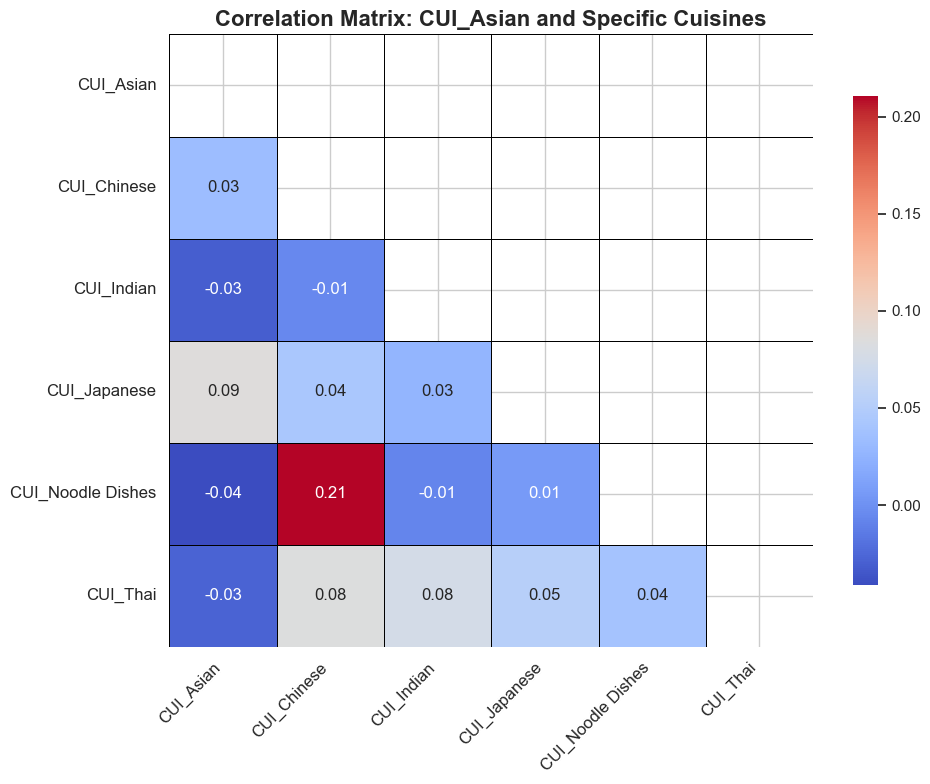

In [241]:
# Function created in main.py to plot the correlation heatmap
plot_correlation_heatmap(
    dataframe=df_inconsistencies,
    features=asian_cui,
    title='Correlation Matrix: CUI_Asian and Specific Cuisines',
    cmap='coolwarm'
)

In [242]:
# Count the number of entries with spending on each specific cuisine and CUI_Asian
overlap_counts = cuisine_presence[cuisine_presence['CUI_Asian'] == 1].sum()

# Create a comparison DataFrame with overlap counts and total non-zero counts for each specific cuisine
comparison_df = pd.DataFrame({
    'Overlap_Count': overlap_counts[1:],  # Get overlap counts for specific cuisines
    'Non_Zero_Count': (cuisine_presence[asian_cui[1:]].sum()).values  # Sum for non-zero counts
})

# Calculate total spending for each cuisine
total_spending = df_inconsistencies[asian_cui].sum()

# Add total spending to the comparison DataFrame
comparison_df['Total_Spending'] = total_spending[1:]  # Total spending for specific cuisines

# Calculate the percentage spent on each specific cuisine relative to CUI_Asian spending in overlapping cases
cui_asian_spending = total_spending['CUI_Asian']
comparison_df['Overlap_Spending_Percentage'] = (comparison_df['Total_Spending'] / cui_asian_spending) * 100

# Calculate the proportion of overlap compared to total non-zero counts
comparison_df['Overlap_Count_Percentage'] = (comparison_df['Overlap_Count'] / comparison_df['Non_Zero_Count']) * 100

# Replace any potential division by zero with NaN for clarity
comparison_df['Overlap_Spending_Percentage'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
comparison_df['Overlap_Count_Percentage'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Sorting the DataFrame by Overlap_Count_Percentage in descending order
comparison_df.sort_values(by='Overlap_Count_Percentage', ascending=False, inplace=True)

# Display the improved DataFrame
comparison_df[['Overlap_Count_Percentage', 'Overlap_Spending_Percentage']].round(2)

Overlap_Count_Percentage  Overlap_Spending_Percentage
CUI_Japanese                          40.67                        30.08
CUI_Chinese                           36.89                        14.35
CUI_Thai                              30.20                         8.44
CUI_Noodle Dishes                     27.78                         7.19
CUI_Indian                            26.24                        16.32

In [243]:
# List of Asian cuisine columns to compare with CUI_Asian
asian_cui = ['CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']

# Initialize a dictionary to store matching entries for each cuisine
matching_entries = {}

# Loop through each cuisine in asian_cui and find rows where the value matches CUI_Asian and both are non-zero
for cuisine in asian_cui:
    matches = df_inconsistencies[(df_inconsistencies[cuisine] == df_inconsistencies['CUI_Asian']) &
                                 (df_inconsistencies[cuisine] != 0)]
    # Store the matching values of CUI_Asian, the specific cuisine, and total_orders in the dictionary
    matching_entries[cuisine] = matches[['CUI_Asian', cuisine, 'total_orders']]

# Display the matching values for each cuisine with total_orders
for cuisine, values in matching_entries.items():
    print(f"Values of {cuisine} and CUI_Asian where they are equal and non-zero, with Total Orders:")
    print(values)
    print("\n")

Values of CUI_Chinese and CUI_Asian where they are equal and non-zero, with Total Orders:
             CUI_Asian  CUI_Chinese  total_orders
customer_id                                      
c97280b5af        6.34         6.34             5


Values of CUI_Indian and CUI_Asian where they are equal and non-zero, with Total Orders:
Empty DataFrame
Columns: [CUI_Asian, CUI_Indian, total_orders]
Index: []


Values of CUI_Japanese and CUI_Asian where they are equal and non-zero, with Total Orders:
             CUI_Asian  CUI_Japanese  total_orders
customer_id                                       
3d98e75f8a       19.02         19.02             2
85e24db1d8       19.32         19.32             3


Values of CUI_Noodle Dishes and CUI_Asian where they are equal and non-zero, with Total Orders:
Empty DataFrame
Columns: [CUI_Asian, CUI_Noodle Dishes, total_orders]
Index: []


Values of CUI_Thai and CUI_Asian where they are equal and non-zero, with Total Orders:
Empty DataFrame
Columns: [CUI_As

Only 3 entries have 100% overlapping between Cui_asian and one of the other asian cuisines

In [244]:
# List of specific Asian cuisines
specific_cuisines = asian_cui[1:]

# Create an auxiliary DataFrame from the original
auxiliary_df = df_inconsistencies.copy()

# Calculate total spending for specific cuisines in the auxiliary DataFrame
auxiliary_df['Total_Specific_Cuisines'] = auxiliary_df[specific_cuisines].sum(axis=1)

# Check if the totals match (CUI_Asian from original DataFrame)
auxiliary_df['CUI_Match'] = auxiliary_df['CUI_Asian'] == auxiliary_df['Total_Specific_Cuisines']

# Display rows where the sums do not match
mismatched_entries = auxiliary_df[~auxiliary_df['CUI_Match']]

# Calculate the percentage of mismatched entries
mismatched_percentage = len(mismatched_entries) / len(auxiliary_df) * 100

# Output the results including percentage
print(f"Found {len(mismatched_entries)} ({mismatched_percentage:.2f}%) mismatched entries.")

mismatched_entries[['CUI_Asian', 'Total_Specific_Cuisines']].head()

Found 19650 (62.46%) mismatched entries.


CUI_Asian  Total_Specific_Cuisines
customer_id                                    
1b8f824d5e        0.00                    28.88
180c632ed8       13.70                    17.86
4eb37a6705       40.87                     0.00
6aef2b6726       24.92                     0.00
84775a7237       32.48                     0.00

**Conclusion:** The analysis revealed 20,792 mismatched entries, representing approximately 66.09% of the dataset. This substantial discrepancy indicates inconsistencies in the categorization of restaurants. Specifically, some restaurants are classified solely under the broad category of CUI_Asian, while others are tagged under both CUI_Asian and one or more specific cuisine categories. Therefore, mismatched entries don't necessarily indicate an error but rather a complex categorization approach that requires careful interpretation.

> ### 4.5.4. Sum DOWs vs sum HRs <a class="anchor" id="sub_section_4_5_4"></a>

Check that the sum of orders by day (DOW_0 to DOW_6) matches the total number of orders from hourly data (HR_1 to HR_23)

In [245]:
# Sum of DOW columns
dow_sum = df_inconsistencies[dow_columns].sum(axis=1)

# Sum of HR columns
hr_sum = df_inconsistencies[hr_columns].sum(axis=1)

# Calculate the absolute difference between the sums of DOW and HR columns
sums_diff = (dow_sum - hr_sum).abs()

# Calculate the percentage of inconsistent rows (for printing purposes)
perc_rows_inconsistencies = (sums_diff > 0).mean() * 100

# Calculate the percentage of rows for each unique difference value
diff_counts = sums_diff.value_counts(normalize=True).sort_index() * 100

# Calculate the cumulative percentage
cumulative_percentage = diff_counts.cumsum()

# Create a DataFrame to display the percentage of rows with each deviation and cumulative percentages
results_df = pd.DataFrame({
    'Rows (%)': diff_counts.round(2),
    'Cumulative Rows (%)': cumulative_percentage.round(2)
})

# Set the index to the deviation (difference between DOW and HR sums)
results_df.index.name = 'Deviation (dow_sum - hr_sum)'

# Print the results with descriptions
print(f"Percentage of inconsistent rows: {perc_rows_inconsistencies.round(2)}%")

print("\nPercentage of differences between DOW and HR sums:")
results_df

Percentage of inconsistent rows: 3.66%

Percentage of differences between DOW and HR sums:


Rows (%)  Cumulative Rows (%)
Deviation (dow_sum - hr_sum)                               
0                                96.34                96.34
1                                 2.94                99.28
2                                 0.50                99.77
3                                 0.12                99.90
4                                 0.05                99.95
5                                 0.03                99.97
6                                 0.01                99.98
7                                 0.00                99.98
8                                 0.00                99.98
9                                 0.01                99.99
11                                0.00                99.99
12                                0.00               100.00
15                                0.00               100.00

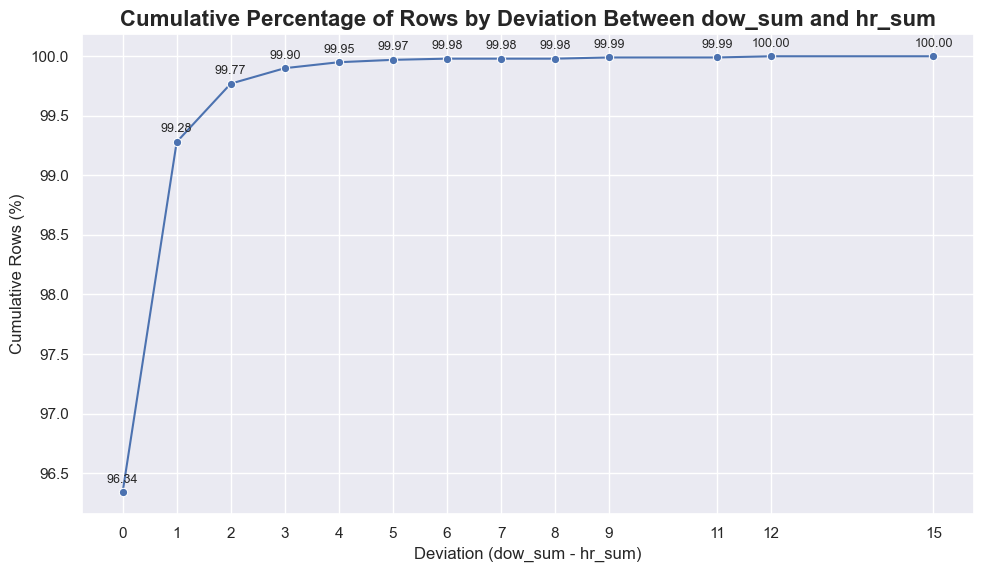

In [246]:
# Set seaborn style and color palette to match previous visualizations
sns.set_theme()

# Data for Deviation and Cumulative Rows Percentage
deviations = results_df.index  # Deviation (dow_sum - hr_sum)
cumulative_rows = results_df['Cumulative Rows (%)']  # Cumulative Rows (%)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=deviations, y=cumulative_rows, marker='o', color='b')

# Titles and labels
plt.title("Cumulative Percentage of Rows by Deviation Between dow_sum and hr_sum", fontsize=16, weight='bold')
plt.xlabel("Deviation (dow_sum - hr_sum)", fontsize=12)
plt.ylabel("Cumulative Rows (%)", fontsize=12)

# Improve x-axis ticks to show all deviation values
plt.xticks(ticks=deviations)

# Add value labels on top of each point for clarity
for x, y in zip(deviations, cumulative_rows):
    plt.text(x, y + 0.08, f"{y:.2f}", ha='center', fontsize=9)

# Grid for better readability
plt.grid(True)

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()

Proposed approach to handle these inconsistencies:

Small Inconsistencies (1-2 Orders):
- Carefully investigate patterns or potential causes, as these inconsistencies make up the majority of the discrepancies
- If no clear pattern is found, we will consider creating an aggregate feature (e.g., total_orders) that captures the sum of orders from either DOW or HR columns, to ensure consistency

Large Inconsistencies (3+ Orders):
- Investigate these cases in more detail to identify any potential issues
- If no clear pattern is found, we will remove these rows to maintain data integrity without heavily impacting the analysis, as they represent a small portion of the dataset

Lets analyze the small inconsistencies

In [247]:
# Rows where the sums are inconsistent
df_small_inconsistencies = df_inconsistencies[(sums_diff == 1) | (sums_diff == 2)]

# Get summary statistics of the inconsistent rows
df_small_inconsistencies.describe().T

count       mean        std   min      25%     50%  \
customer_age              1082.0  27.550832   6.795799  18.0     23.0    26.0   
vendor_count              1082.0   4.841959   3.831798   1.0      2.0     4.0   
product_count             1082.0   9.050832   8.815521   1.0      3.0     6.0   
is_chain                  1082.0   4.160813   4.877028   0.0      1.0     3.0   
first_order               1082.0  21.192237  20.284608   0.0      5.0    15.0   
last_order                1082.0  69.334566   20.69958   0.0     60.0    77.0   
CUI_American              1082.0   9.212957  16.338077   0.0      0.0     0.0   
CUI_Asian                 1082.0  25.599316  42.303767   0.0      0.0   6.175   
CUI_Beverages             1082.0   3.746414  11.355755   0.0      0.0     0.0   
CUI_Cafe                  1082.0   0.874917   8.588138   0.0      0.0     0.0   
CUI_Chicken Dishes        1082.0   1.208438   5.388364   0.0      0.0     0.0   
CUI_Chinese               1082.0   2.878031  15.855365   0.0      0.0     0.0   
CUI_Desserts              1082.0   2.104094   8.329954   0.0      0.0     0.0   
CUI_Healthy               1082.0   0.930388   5.551173   0.0      0.0     0.0   
CUI_Indian                1082.0   1.621497   7.405256   0.0      0.0     0.0   
CUI_Italian               1082.0   1.970092    7.69192   0.0      0.0     0.0   
CUI_Japanese              1082.0   2.917172   8.723222   0.0      0.0     0.0   
CUI_Noodle Dishes         1082.0   1.446183   6.597475   0.0      0.0     0.0   
CUI_OTHER                 1082.0   2.193133   7.502775   0.0      0.0     0.0   
CUI_Street Food / Snacks  1082.0   8.620277  26.686445   0.0      0.0     0.0   
CUI_Thai                  1082.0   0.667782   4.199407   0.0      0.0     0.0   
DOW_0                     1082.0   0.943623   1.344314   0.0      0.0     1.0   
DOW_1                     1082.0   0.865989   1.283053   0.0      0.0     0.0   
DOW_2                     1082.0   0.891867   1.268835   0.0      0.0     1.0   
DOW_3                     1082.0   0.944547   1.345384   0.0      0.0     1.0   
DOW_4                     1082.0   0.960259   1.264798   0.0      0.0     1.0   
DOW_5                     1082.0   1.004621   1.269793   0.0      0.0     1.0   
DOW_6                     1082.0   1.113678   1.452618   0.0      0.0     1.0   
HR_1                      1082.0   0.323475   0.760242   0.0      0.0     0.0   
HR_2                      1082.0   0.251386   0.797558   0.0      0.0     0.0   
HR_3                      1082.0   0.257856    0.67124   0.0      0.0     0.0   
HR_4                      1082.0   0.207024   0.576784   0.0      0.0     0.0   
HR_5                      1082.0   0.158041   0.482799   0.0      0.0     0.0   
HR_6                      1082.0   0.131238    0.49546   0.0      0.0     0.0   
HR_7                      1082.0   0.136784   0.488305   0.0      0.0     0.0   
HR_8                      1082.0   0.186691   0.673462   0.0      0.0     0.0   
HR_9                      1082.0   0.292976   0.836343   0.0      0.0     0.0   
HR_10                     1082.0   0.371534   0.873414   0.0      0.0     0.0   
HR_11                     1082.0   0.385397   0.965783   0.0      0.0     0.0   
HR_12                     1082.0   0.323475   0.804005   0.0      0.0     0.0   
HR_13                     1082.0   0.273567    0.69956   0.0      0.0     0.0   
HR_14                     1082.0   0.246765   0.640243   0.0      0.0     0.0   
HR_15                     1082.0   0.189464   0.578812   0.0      0.0     0.0   
HR_16                     1082.0   0.218115   0.639817   0.0      0.0     0.0   
HR_17                     1082.0   0.224584    0.66804   0.0      0.0     0.0   
HR_18                     1082.0   0.257856   0.780817   0.0      0.0     0.0   
HR_19                     1082.0   0.243068   0.713989   0.0      0.0     0.0   
HR_20                     1082.0   0.224584   0.654046   0.0      0.0     0.0   
HR_21                     1082.0   0.175601   0.590266   0

In [248]:
# Get statistics of the small inconsistent rows (for categorical variables)
df_small_inconsistencies.describe(include="object")

customer_region last_promo payment_method
count             1082       1082           1082
unique               8          4              3
top               8670    NOPROMO           CARD
freq               565        636            769

In [249]:
df_small_inconsistencies.head().T

customer_id              ae38da6386 a21a839c77 9237d23413 8c6ffd7357  \
customer_region                8670       4140       8670       4660   
customer_age                     21         19         22         25   
vendor_count                      2          1          3          3   
product_count                     3          4          4          4   
is_chain                          1          4          2          1   
first_order                       0          0          0          0   
last_order                        7         21         27         28   
last_promo                 DELIVERY    NOPROMO    NOPROMO    NOPROMO   
payment_method                 DIGI       CARD       CARD       CARD   
CUI_American                    0.0        0.0       5.77      27.54   
CUI_Asian                      23.7        0.0      17.76        0.0   
CUI_Beverages                   0.0        0.0        5.9        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                   12.08        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                      0.0        0.0        0.0        0.0   
CUI_Italian                     0.0        0.0        0.0        6.1   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0      22.09        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             0          0          0          0   
DOW_1                             0          0          1          0   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          0   
DOW_5                             0          0          1          0   
DOW_6                             2          4          2          3   
HR_1                              0          1          1          1   
HR_2                              0          0          0          0   
HR_3                              0          0          1          0   
HR_4                              0          0          0          0   
HR_5                              0          0          0          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          0          0   
HR_10                             0          0          0          0   
HR_11                             1          0          1          0   
HR_12                             0          0          0          0   
HR_13                             0          0          0          0   
HR_14                             0          0          0          0   
HR_15                             0          0          0          1   
HR_16                             0          0          0          0   
HR_17                             0          0          0          0   
HR_18                             0          0          0          0   
HR_19                             0          1          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          1          0          0   
HR_23                             0          0          0          0   
total_cui_spending            35.78     

**Conclusion:** Small Inconsistencies (1-2 Orders): No clear pattern was found, so we will consider creating an aggregate feature (e.g., total_orders) that captures the sum of orders from either DOW or HR columns, to ensure consistency

Lets analyze the large inconsistencies

In [250]:
# Rows where the sums are inconsistent
df_large_inconsistencies = df_inconsistencies[sums_diff > 2]

# Get summary statistics of the inconsistent rows
df_large_inconsistencies.describe().T

count        mean         std   min     25%     50%  \
customer_age              71.0   28.323944    8.304516  18.0    23.0    26.0   
vendor_count              71.0    8.704225    6.463954   1.0     4.0     7.0   
product_count             71.0   21.422535   16.982901   3.0    10.0    16.0   
is_chain                  71.0   10.352113   12.499256   0.0     3.5     7.0   
first_order               71.0   13.394366   15.411942   0.0     2.0     7.0   
last_order                71.0   79.774648   12.819848  17.0    78.0    85.0   
CUI_American              71.0   12.309296   19.677266   0.0     0.0    2.76   
CUI_Asian                 71.0   69.410282   85.238303   0.0     0.0   42.79   
CUI_Beverages             71.0   11.100423   25.747199   0.0     0.0     0.0   
CUI_Cafe                  71.0    0.734085    5.885195   0.0     0.0     0.0   
CUI_Chicken Dishes        71.0    3.129718   13.224926   0.0     0.0     0.0   
CUI_Chinese               71.0    4.136479    9.061432   0.0     0.0     0.0   
CUI_Desserts              71.0    3.117887   11.755189   0.0     0.0     0.0   
CUI_Healthy               71.0     3.47662   10.389688   0.0     0.0     0.0   
CUI_Indian                71.0    2.076761    8.153713   0.0     0.0     0.0   
CUI_Italian               71.0    1.034789    4.300799   0.0     0.0     0.0   
CUI_Japanese              71.0   12.350704   28.564318   0.0     0.0     0.0   
CUI_Noodle Dishes         71.0    3.151127    7.821359   0.0     0.0     0.0   
CUI_OTHER                 71.0    5.323803   13.264705   0.0     0.0     0.0   
CUI_Street Food / Snacks  71.0   20.214507   49.359146   0.0     0.0     0.0   
CUI_Thai                  71.0    0.951127    4.057674   0.0     0.0     0.0   
DOW_0                     71.0     2.28169    2.217998   0.0     1.0     2.0   
DOW_1                     71.0    2.507042    2.709102   0.0     1.0     2.0   
DOW_2                     71.0    2.478873    2.377629   0.0     1.0     2.0   
DOW_3                     71.0     2.43662    2.352703   0.0     1.0     2.0   
DOW_4                     71.0         2.0    1.874643   0.0     1.0     2.0   
DOW_5                     71.0    2.112676     2.47588   0.0     0.5     1.0   
DOW_6                     71.0    2.267606    3.047049   0.0     0.5     1.0   
HR_1                      71.0    1.056338    1.351056   0.0     0.0     1.0   
HR_2                      71.0     0.43662    0.906049   0.0     0.0     0.0   
HR_3                      71.0    0.338028    0.716014   0.0     0.0     0.0   
HR_4                      71.0    0.732394    1.756276   0.0     0.0     0.0   
HR_5                      71.0    0.295775    0.641301   0.0     0.0     0.0   
HR_6                      71.0    0.239437    0.620249   0.0     0.0     0.0   
HR_7                      71.0    0.183099    0.515748   0.0     0.0     0.0   
HR_8                      71.0    0.394366    0.819039   0.0     0.0     0.0   
HR_9                      71.0    0.521127     1.05369   0.0     0.0     0.0   
HR_10                     71.0    0.802817    1.591223   0.0     0.0     0.0   
HR_11                     71.0    1.366197    4.431186   0.0     0.0     0.0   
HR_12                     71.0    0.661972    1.557871   0.0     0.0     0.0   
HR_13                     71.0    0.450704    1.052734   0.0     0.0     0.0   
HR_14                     71.0    0.295775    0.618624   0.0     0.0     0.0   
HR_15                     71.0    0.169014    0.446763   0.0     0.0     0.0   
HR_16                     71.0    0.169014    0.506696   0.0     0.0     0.0   
HR_17                     71.0    0.380282    1.427948   0.0     0.0     0.0   
HR_18                     71.0    0.408451    1.449901   0.0     0.0     0.0   
HR_19                     71.0    0.422535    1.359222   0.0     0.0     0.0   
HR_20                     71.0    0.521127    1.984649   0.0     0.0     0.0   
HR_21                     71.0    0.295775    1.175881   0.0     0.0     0.0   
HR_22                    

In [251]:
# Get statistics of the small inconsistent rows (for categorical variables)
df_large_inconsistencies.describe(include="object")

customer_region last_promo payment_method
count               71         71             71
unique               6          4              3
top               8670    NOPROMO           CARD
freq                43         48             52

In [252]:
df_large_inconsistencies.head().T

customer_id              eb4664b1ac 2fb255fc89 0077c28499 4e3c4b0af3  \
customer_region                2490       8670       8670       8670   
customer_age                     39         29         29         23   
vendor_count                      5          7         30         10   
product_count                    31         30         64         26   
is_chain                         25         18         17         14   
first_order                       0          0          0          0   
last_order                       69         79         81         87   
last_promo                  NOPROMO    NOPROMO    NOPROMO   DELIVERY   
payment_method                 CARD       CARD       CARD       CARD   
CUI_American                    0.0      43.19      30.24       5.93   
CUI_Asian                       0.0      238.1     186.51       5.74   
CUI_Beverages                 53.24        0.0      54.65       1.66   
CUI_Cafe                       2.56        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                    1.01        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0      36.65        0.0   
CUI_Indian                      0.0        0.0        0.0        0.0   
CUI_Italian                     0.0        0.0        0.0        0.0   
CUI_Japanese                    0.0      49.91     182.49      49.06   
CUI_Noodle Dishes             12.37        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0      130.5     155.75   
CUI_Thai                      18.75        0.0        0.0        0.0   
DOW_0                             0          3          4          2   
DOW_1                             1          2         10          6   
DOW_2                             1          1          5          4   
DOW_3                             3          2          7          3   
DOW_4                             3          2          9          3   
DOW_5                            10          1         10          2   
DOW_6                             7          7          1          1   
HR_1                              4          2          3          1   
HR_2                              0          0          1          0   
HR_3                              0          1          3          0   
HR_4                              0          0         10          3   
HR_5                              0          1          2          2   
HR_6                              0          0          3          1   
HR_7                              0          1          2          0   
HR_8                              0          0          4          0   
HR_9                              1          0          5          0   
HR_10                             2          5          4          0   
HR_11                             5          3          1          2   
HR_12                             1          0          1          4   
HR_13                             1          0          0          1   
HR_14                             2          0          0          0   
HR_15                             0          0          0          1   
HR_16                             0          0          0          0   
HR_17                             1          0          0          0   
HR_18                             1          0          0          0   
HR_19                             1          0          0          0   
HR_20                             1          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             2          0          2          2   
total_cui_spending            87.93     

**Conclusion:** Large Inconsistencies (3+ Orders): No clear pattern was found, so let's remove these rows

In [253]:
# Remove ows with inconsistencies greater than 2
df_inconsistencies = df_inconsistencies[~(sums_diff > 2)]

> ### 4.5.7. Total orders inconsistencies <a class="anchor" id="sub_section_4_5_7"></a>
Check for entries with total_order = 0

In [254]:
total_orders_zero = df_inconsistencies[df_inconsistencies['total_orders'] == 0]

# Calculate the percentage of inconsistent rows
perc_inconsistent_rows = len(total_orders_zero) / len(df_inconsistencies) * 100

# Display results
print(f"Number of inconsistent rows: {len(total_orders_zero)} ({round(perc_inconsistent_rows, 2)}%)")

Number of inconsistent rows: 136 (0.43%)


In [255]:
df_inconsistencies = df_inconsistencies.drop(total_orders_zero.index)

> ### 4.5.5. Is_chain variable <a class="anchor" id="sub_section_4_5_5"></a>

In [256]:
df_inconsistencies["is_chain"].describe()

count    31254.000000
mean         2.813080
std          3.912736
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         83.000000
Name: is_chain, dtype: float64

* is_chain is described, in the metadata, as a boolean variable that indicates whether the customer’s order was from a chain restaurant.
     * This can't be true as one row describes one customer 
     * --> Hypothesis: Tracks the number of orders a customer placed from a chain restaurant

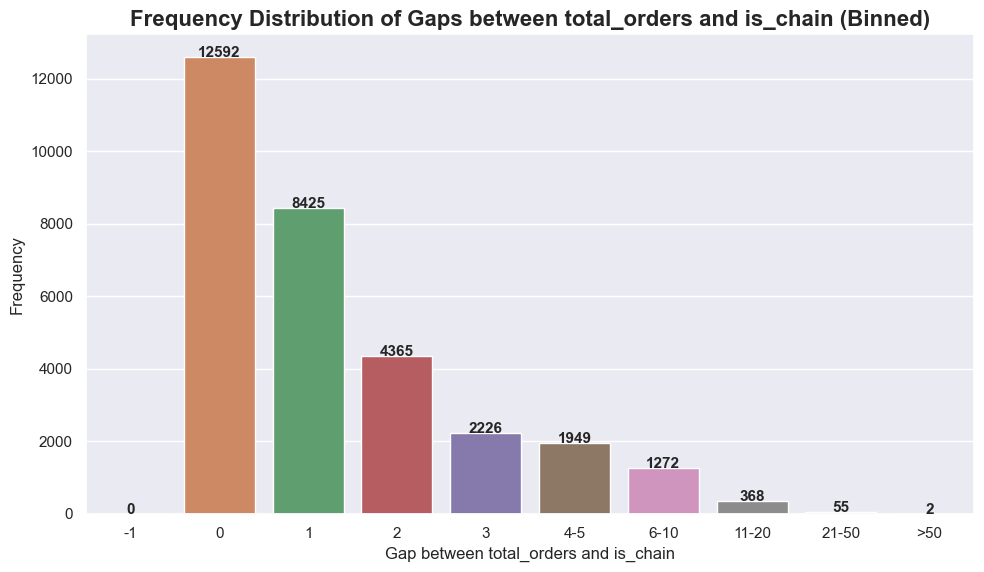

In [257]:
# Set seaborn style and color palette
sns.set_theme()

# create a new variable/series that tracks the the gap between total orders and is_chain
gap = df_inconsistencies['total_orders'] - df_inconsistencies['is_chain']

# Define bin edges and labels to cover a wider range of gaps more intuitively
bin_edges = [-float('inf'), -1, 0, 1, 2, 3, 5, 10, 20, 50, float('inf')]
bin_labels = ["-1", "0", "1", "2", "3", "4-5", "6-10", "11-20", "21-50", ">50"]

# Bin the data using pd.cut with the new edges and labels
gap_binned = pd.cut(gap, bins=bin_edges, labels=bin_labels)

# Create a DataFrame with the binned values and count occurrences
gap_val_binned = pd.DataFrame(gap_binned.value_counts().sort_index(), columns=['count'])
gap_val_binned.index.name = 'gap'

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=gap_val_binned.index, y=gap_val_binned['count'])

# Add value labels on top of each bar with a larger font size and a bit more space above each bar
for idx, value in enumerate(gap_val_binned['count']):
    plt.text(x=idx, y=value + 2, s=f"{value}", ha='center', fontsize=11, fontweight='bold')

# Set labels and title
plt.xlabel('Gap between total_orders and is_chain', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Gaps between total_orders and is_chain (Binned)', 
          fontsize=16, weight='bold')

# Layout and display
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Conclusion:** Based on our previous analysis, the variable "is_chain" appears to represent the number of orders a customer has placed from chain restaurants, considering the observed range and distribution of the gaps. To enhance our understanding of customer behavior, we will create a **new feature called chain_orders_prop**, which will capture the frequency of a customer’s orders from chain restaurants as a proportion of their total orders.

In [258]:
# Rename the column 'is_chain' to 'chain_orders'
df_inconsistencies.rename(columns={'is_chain': 'chain_orders'}, inplace=True)

In [259]:
# Redefine auxiliary variables, because "is_chain" was renamed to "chain_orders"

# Define metric and non-metric features
metric_features = df_inconsistencies.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_inconsistencies.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW and HR (and CUI) columns from metric features
metric_features_excluding_dow_and_hr = [feat for feat in metric_features if feat not in dow_columns + hr_columns]
metric_features_excluding_cui_dow_and_hr = [feat for feat in metric_features if feat not in cui_columns + dow_columns + hr_columns]

Analyze cases where "chain_orders" is greater than "total_orders"

In [260]:
# Identify rows where chain_orders is greater than total_orders
inconsistencies = df_inconsistencies[df_inconsistencies['chain_orders'] > df_inconsistencies['total_orders']]

# Calculate the percentage of inconsistent rows
percentage_inconsistencies = len(inconsistencies) / len(df_inconsistencies) * 100

# Display the percentage of inconsistent rows
print(f"Rows where 'chain_orders' exceeds 'total_orders': {len(inconsistencies)} ({percentage_inconsistencies:.2f}%)")

# Display the inconsistent rows summary
inconsistencies[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

Rows where 'chain_orders' exceeds 'total_orders': 0 (0.00%)


count  mean   std   min   25%   50%   75%   max
customer_age         0.0  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>
vendor_count         0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
product_count        0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
chain_orders         0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
first_order          0.0  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>
last_order           0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
total_cui_spending   0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
total_orders         0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN

**Conclusion:** We found 74 entries (0.24%) where chain_orders exceed total_orders. These records are customers who have not placed any orders in the last three months. Therefore, we can set their chain_orders to match total_orders, which is 0.

In [261]:
# Handle these observations, by setting "chain_orders" to "total_orders"
df_inconsistencies.loc[df_inconsistencies['chain_orders'] > df_inconsistencies['total_orders'], 'chain_orders'] = df_inconsistencies['total_orders']

> ### 4.5.6. Total Orders and Vendor Count consistency <a class="anchor" id="sub_section_4_5_6"></a>

Total Orders Consistency: The total number of orders placed (the sum of the DOW/HR columns) should not exceed the total number of products ordered (product_count).<br>

Vendor Count Consistency: The vendor_count should not exceed the number of unique products ordered, since each product should come from a vendor. This ensures that the recorded count of unique vendors matches the reality of product purchases.

In [262]:
# Calculate total orders based on DOW columns
total_orders = df_inconsistencies[dow_columns].sum(axis=1)

# Check if total orders are less than product count
inconsistent_orders = total_orders > df_inconsistencies['product_count']

# Check if vendor count exceeds product count
inconsistent_vendors = df_inconsistencies['vendor_count'] > df_inconsistencies['product_count']

# Combine both conditions to find all inconsistencies
inconsistencies_mask = inconsistent_orders | inconsistent_vendors

# Count the number of inconsistent rows
num_inconsistent_rows = inconsistencies_mask.sum()

# Calculate the percentage of inconsistent rows
perc_inconsistent_rows = num_inconsistent_rows / len(df_inconsistencies) * 100

# Display results
print(f"Number of inconsistent rows: {num_inconsistent_rows} ({perc_inconsistent_rows.round(2)}%)")

Number of inconsistent rows: 18 (0.06%)


Check if the rows with inconsistencies in orders and vendors are the same

In [263]:
# Check if the indices of both inconsistency sets are the same
inconsistent_rows_same = inconsistent_orders.index.equals(inconsistent_vendors.index)

# Step 2: Output the result
if inconsistent_rows_same:
    print("The rows with inconsistencies in orders and vendors are the same.")
else:
    print("There are differences in the rows with inconsistencies between orders and vendors.")

The rows with inconsistencies in orders and vendors are the same.


In [264]:
df_inconsistencies[inconsistencies_mask].head().T

customer_id              aed85972bb b2ebe2e6e0 6f723d9894 9d74f2ac81  \
customer_region                4660       4660       4660       4660   
customer_age                     27         43         36         27   
vendor_count                      1          1          1          1   
product_count                     0          0          0          0   
chain_orders                      0          0          0          0   
first_order                       6          6         13         19   
last_order                        6          6         13         19   
last_promo                 DISCOUNT    NOPROMO   DELIVERY   DELIVERY   
payment_method                 CARD       CARD       CASH       CARD   
CUI_American                    0.0        0.0        0.0        0.0   
CUI_Asian                       0.0        0.0        0.0        0.0   
CUI_Beverages                   0.0        0.0        0.0        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                     0.0        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                      0.0        0.0        0.0      19.03   
CUI_Italian                    2.56       6.74       7.77        0.0   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             0          0          0          0   
DOW_1                             0          0          0          0   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          1   
DOW_5                             1          1          1          0   
DOW_6                             0          0          0          0   
HR_1                              0          0          0          0   
HR_2                              0          0          0          0   
HR_3                              0          0          0          0   
HR_4                              0          0          0          0   
HR_5                              0          0          0          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          0          0   
HR_10                             0          0          0          0   
HR_11                             0          0          0          0   
HR_12                             0          0          0          0   
HR_13                             0          0          0          0   
HR_14                             0          1          1          0   
HR_15                             0          0          0          0   
HR_16                             0          0          0          0   
HR_17                             0          0          0          1   
HR_18                             1          0          0          0   
HR_19                             0          0          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             0          0          0          0   
total_cui_spending             2.56     

In [265]:
# Remove rows with inconsistencies in total orders or vendor count
df_inconsistencies = df_inconsistencies[~inconsistencies_mask]

> ### 4.5.8. Total rows with inconsistencies <a class="anchor" id="sub_section_4_5_8"></a>
Final Step: Calculate the Percentage of Rows Removed Due to Inconsistencies

In [266]:
# Calculate the number of rows removed
rows_removed_inconsistencies = len(df_adjust_dtypes) - len(df_inconsistencies)
rows_removed_missing_and_inconsistencies = len(df_no_duplicates) - len(df_inconsistencies)

# Calculate the percentage of rows removed
percentage_removed_inconsistencies = rows_removed_inconsistencies / len(df_adjust_dtypes) * 100
percentage_removed_missing_and_inconsistencies = rows_removed_missing_and_inconsistencies / len(df_no_duplicates) * 100

# Output the result
print(f"Rows removed due to inconsistencies: {rows_removed_inconsistencies} ({round(percentage_removed_inconsistencies, 2)}%)")
print(f"Rows removed due to missing values and inconsistencies: {rows_removed_missing_and_inconsistencies} ({round(percentage_removed_missing_and_inconsistencies, 2)}%)")

Rows removed due to inconsistencies: 590 (1.85%)
Rows removed due to missing values and inconsistencies: 592 (1.86%)


**Conclusion:** We removed 454 rows (1.43%) due to inconsistencies (and an additional 2 rows due to missing values). This slight reduction in data maintains the overall integrity of the dataset, enhancing its reliability for analysis.

> ## 4.6. Visualizations <a class="anchor" id="visualizations"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

Default colormaps from matplotlib: https://matplotlib.org/stable/users/explain/colors/colormaps.html

Matplotlib tutorials: https://matplotlib.org/stable/tutorials/index.html

Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

Seaborn tutorials: https://seaborn.pydata.org/tutorial.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

In [267]:
df_visualizations = df_inconsistencies.copy()

In [268]:
df_visualizations.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'chain_orders', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_cui_spending', 'total_orders'],
      dtype='object')

> ## 4.7. Correlation Matrix <a class="anchor" id="correlation_matrix"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

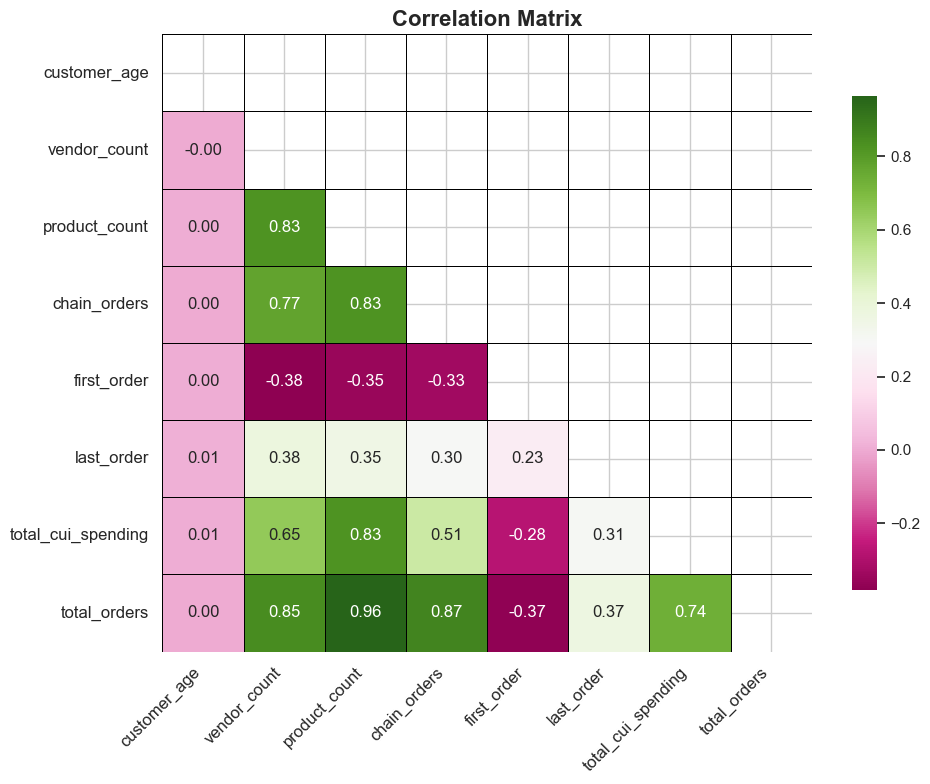

In [269]:
plot_correlation_heatmap(
    dataframe=df_visualizations,
    features=metric_features_excluding_cui_dow_and_hr,
    title='Correlation Matrix',
    cmap='PiYG'
)

> ## 4.8. Outliers <a class="anchor" id="outliers1"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [270]:
df_outliers = df_visualizations.copy()

In [271]:
from pylab import rcParams
rcParams["figure.figsize"] = 25, 15

In [272]:
# import matplotlib.pyplot as plt

# # Plot the histograms for each column
# axes = df_outliers[cui_columns].hist( figsize=(15, 10))

# # Loop through each subplot
# for ax in axes.flatten():
#     for patch in ax.patches:
#         # Get the height of each bar (the count)
#         height = patch.get_height()
#         # Place text above each bar
#         ax.text(patch.get_x() + patch.get_width() / 2, height + 1,  # Offset text slightly above the bar
#                 f"{int(height)}", ha="center", va="bottom")

# plt.tight_layout()
# plt.show()

In [273]:
# def plot_boxplots(features, df, title, cols=5, figsize=(18, 12)):
#     """
#     Plots boxplots for the given features and calculates outlier counts.

#     Parameters:
#     features (list): List of feature names to plot.
#     df (DataFrame): DataFrame containing the features.
#     title (str): Title for the plot grid.
#     cols (int): Number of columns in the grid layout (default: 5).
#     figsize (tuple): Size of the figure (default: (18, 12)).
#     """
#     # Calculate rows needed for the grid
#     rows = (len(features) // cols) + (len(features) % cols > 0)
#     fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
#     axes = axes.flatten()

#     # Generate box plots for each feature
#     for i, feature in enumerate(features):
#         sns.boxplot(x=df[feature], ax=axes[i])

#         # Calculate the total number of outliers
#         q1 = df[feature].quantile(0.25)
#         q3 = df[feature].quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - 1.5 * iqr
#         upper_bound = q3 + 1.5 * iqr
#         outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
#         outlier_count = len(outliers)
        
#         # Set the title with outlier count
#         axes[i].set_title(f"{feature.replace('_', ' ').title()}\nTotal Outliers: {outlier_count}", pad=15)
#         axes[i].set_xlabel(feature.replace('_', ' ').title())

#     # Hide any unused subplots
#     for j in range(i + 1, len(axes)):
#         axes[j].axis("off")

#     # Set a main title for the grid
#     plt.suptitle(title, fontsize=16, weight='bold', y=1.02)
#     plt.tight_layout(rect=[0, 0, 1, 0.95])
#     plt.show()

In [274]:
# plot_boxplots(
#     features=cui_columns, 
#     df=df_outliers, 
#     title="Boxplots for Cuisine Features"
# )

Since almost every graph shows an outlier, let’s determine if this customer has high spending across all categories or if they differ significantly in specific Cui features

In [275]:
# df_temp = df_outliers[df_outliers["CUI_Asian"]>600]
# df_temp[["total_orders"] + cui_columns]

In [276]:
# df_temp = df_outliers[df_outliers["CUI_American"]>200]
# df_temp[["total_orders"] + cui_columns]

In [277]:
# df_temp = df_outliers[df_outliers["CUI_Chinese"]>500]
# df_temp[["total_orders"] + cui_columns]

In [278]:
# df_temp = df_outliers[df_outliers["CUI_Japanese"]>500]
# df_temp[["total_orders"] + cui_columns]

As we can see its different customers across the cuisines.

In [279]:
# plot_boxplots(
#     features=dow_columns, 
#     df=df_outliers, 
#     title="Boxplots for Day-of-Week Features"
# )

In [280]:
# plot_boxplots(
#     features=hr_columns, 
#     df=df_outliers, 
#     title="Boxplots for Hourly Features"
# )

In [281]:
# df_temp = df_outliers[(df_outliers["HR_20"]>30)]
# df_temp[["total_orders"] + hr_columns]

In [282]:
# # Dictionary to store the count of outliers for each feature
# outlier_counts = {}

# # Generate box plots and count outliers
# for feature in metric_features_excluding_cui_dow_and_hr:
#     plt.figure(figsize=(8, 6))
    
#     sns.set_color_codes("pastel")

#     # Create box plot
#     ax = sns.boxplot(x=df_outliers[feature])
    
#     # Calculate the total number of outliers
#     q1 = df_outliers[feature].quantile(0.25)
#     q3 = df_outliers[feature].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     outliers = df_outliers[(df_outliers[feature] < lower_bound) | (df_outliers[feature] > upper_bound)]
#     outlier_count = len(outliers)
    
#     # Store outlier count
#     outlier_counts[feature] = outlier_count
    
#     # Set title with outlier count displayed below it
#     plt.title(f"Box Plot of {feature.replace('_', ' ').title()}\nTotal Outliers: {outlier_count}", pad=20)
#     plt.xlabel(feature.replace('_', ' ').title())
    
#     # Apply x-axis steps of 10 only if feature is not 'product_count' or 'total_cui_spending'
#     if feature not in ['product_count', 'total_cui_spending']:
#         max_value = df_outliers[feature].max()
#         plt.xticks(range(0, int(max_value) + 10, 10))
    
#     plt.show()

# # Bar chart comparing the number of outliers for each feature
# plt.figure(figsize=(10, 6))
# ax = plt.bar(outlier_counts.keys(), outlier_counts.values())
# plt.title("Comparison of Outlier Counts Across Features")
# plt.xlabel("Features")
# plt.ylabel("Number of Outliers")
# plt.xticks(rotation=45, ha='right')

# # Add total count labels above each bar
# for i, count in enumerate(outlier_counts.values()):
#     plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

# plt.tight_layout()
# plt.show()

None of these features show any error-based outliers.

In [283]:
# df_temp = df_outliers[(df_outliers["total_cui_spending"]>1000)]
# df_temp[["total_orders","total_cui_spending", "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
#                 "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
#                 "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
#                 "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

In [284]:
# # Define the size of the subplot grid (8x8)
# fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(24, 24))
# fig.suptitle("Scatter Plots between Metric Features", fontsize=16, weight='bold')

# # Generate scatter plots for each combination of features in the grid
# for i in range(8):
#     for j in range(8):
#         if i != j:
#             # Get the feature names for the x and y axis
#             feature_x = metric_features_excluding_cui_dow_and_hr[i]
#             feature_y = metric_features_excluding_cui_dow_and_hr[j]

#             # Create scatter plot
#             sns.scatterplot(x=df_outliers[feature_x], y=df_outliers[feature_y], ax=axes[i, j])
#             axes[i, j].set_xlabel(feature_x.replace('_', ' ').title())
#             axes[i, j].set_ylabel(feature_y.replace('_', ' ').title())
#         else:
#             # Hide diagonal subplots as they would be a scatter plot of the same feature
#             axes[i, j].axis("off")

# # Adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

<a id = "feature_engineering"></a>

## 5. Feature Engineering <a class="anchor" id="feature_engineering"></a>
[Back to ToC](#toc)<br>

In [285]:
df_new_features = df_visualizations.copy()
df_new_features.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'chain_orders', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_cui_spending', 'total_orders'],
      dtype='object')

> ## 5.1. Generation <a class="anchor" id="generation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a categorical feature that groups customers by generation

In [286]:
# Define bins and labels for the generation categories
bins = [17, 25, 41, 57, 76, 81]  # Bins must be set as one more than the number of categories
labels = ["Gen_Z", "Millennials", "Gen_X", "Baby_Boomers", "Silent_Generation"]

# Step 1: Create a new column for generation based on customer_age
df_new_features["generation"] = pd.cut(df_new_features["customer_age"], bins=bins, labels=labels)

In [287]:
round(df_new_features['generation'].value_counts(normalize=True) * 100, 2)

Millennials          49.72
Gen_Z                45.47
Gen_X                 4.42
Baby_Boomers          0.35
Silent_Generation     0.04
Name: generation, dtype: float64

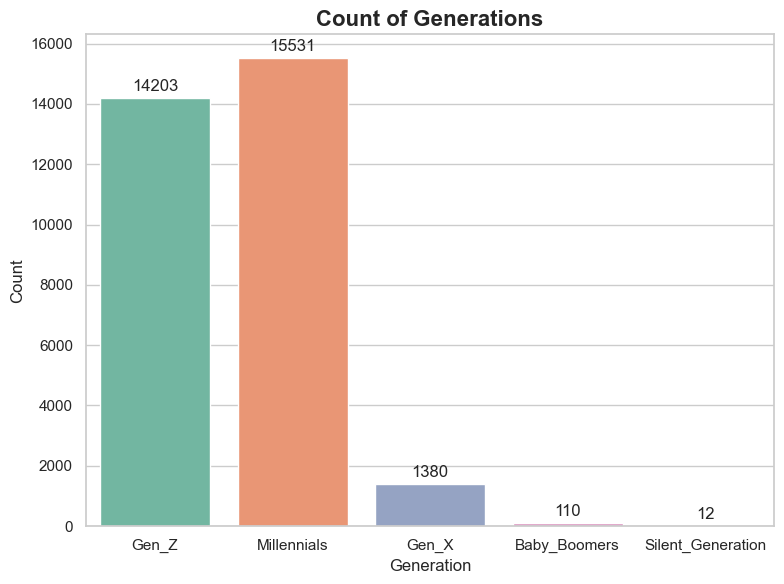

In [288]:
# Count plot for 'generation'
plot_distribution(
    data=df_new_features, 
    x="generation", 
    plot_type="count", 
    title="Count of Generations", 
    xlabel="Generation", 
    ylabel="Count", 
    show_counts=True, 
    order=labels,
    color_palette=color_palette
)

> ## 5.2. Total Cuisine Spending <a class="anchor" id="total_cuisine_spending"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Estimate the customer lifetime value based on the total spending across all cuisines.

In [289]:
# Sum these columns row-wise and create a new column "CUI_all"
df_new_features["total_cui_spending"] = df_new_features[cui_columns].sum(axis=1)

In [290]:
df_new_features["total_cui_spending"].describe().round(2)

count    31236.00
mean        38.26
std         45.84
min          0.37
25%         13.03
50%         24.18
75%         45.02
max       1418.33
Name: total_cui_spending, dtype: float64

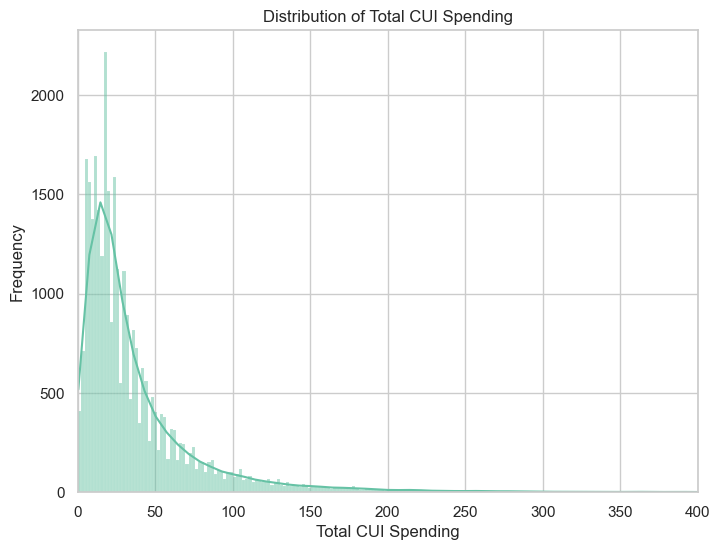

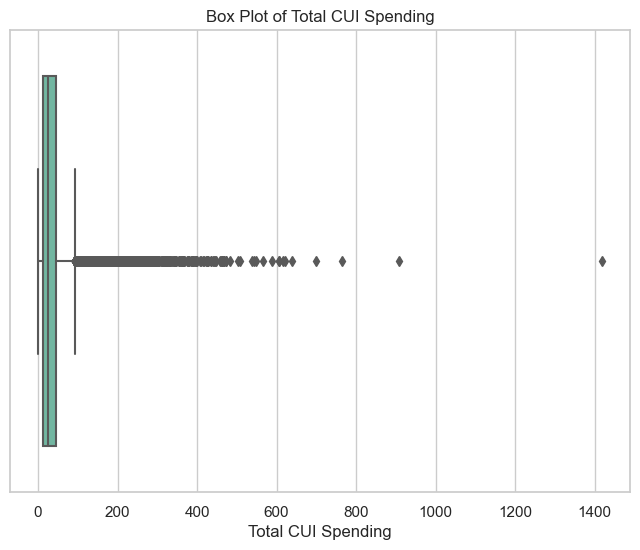

In [291]:
# Histogram for 'Total_cui_spending'
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['total_cui_spending'], kde=True)
plt.xlim(left = 0, right= 400)
plt.title("Distribution of Total CUI Spending")
plt.xlabel("Total CUI Spending")
plt.ylabel("Frequency")
plt.show()

# Horizontal box plot for 'Total_cui_spending'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['total_cui_spending'])
plt.title("Box Plot of Total CUI Spending")
plt.xlabel("Total CUI Spending")
plt.show()

> ## 5.3. Healthiness Index <a class="anchor" id="healthiness_index"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

In [292]:
df_new_features["health_index"] = df_new_features["CUI_Healthy"] / df_new_features["total_cui_spending"]

In [293]:
df_new_features["health_index"].describe().round(2)

count    31236.00
mean         0.03
std          0.12
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: health_index, dtype: float64

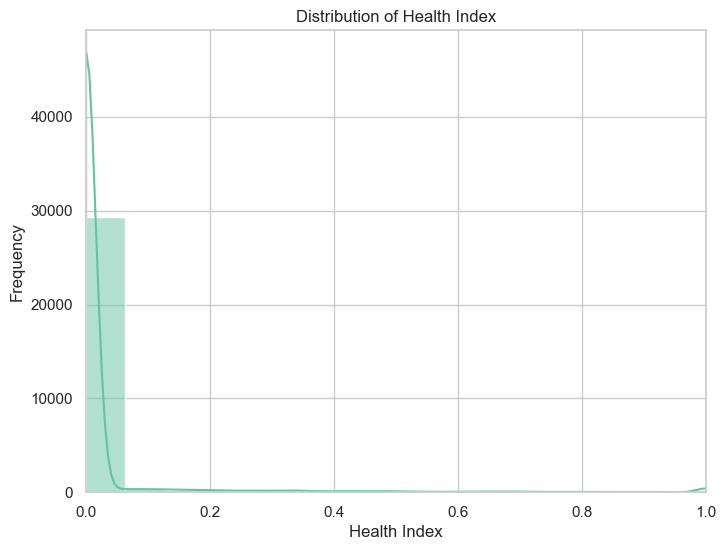

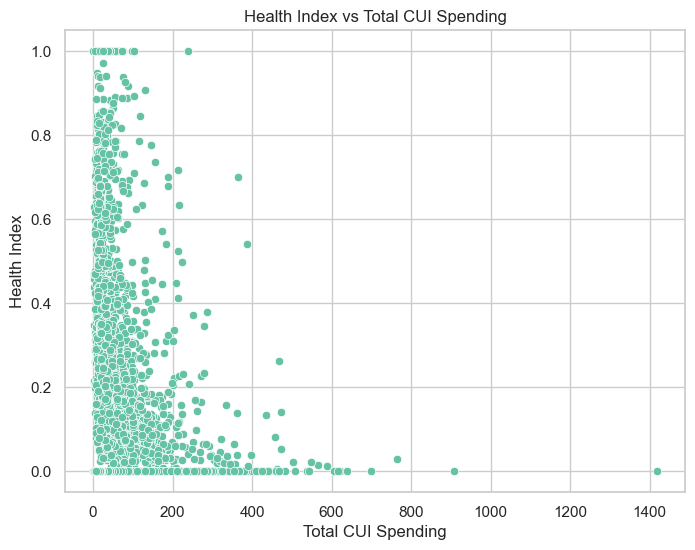

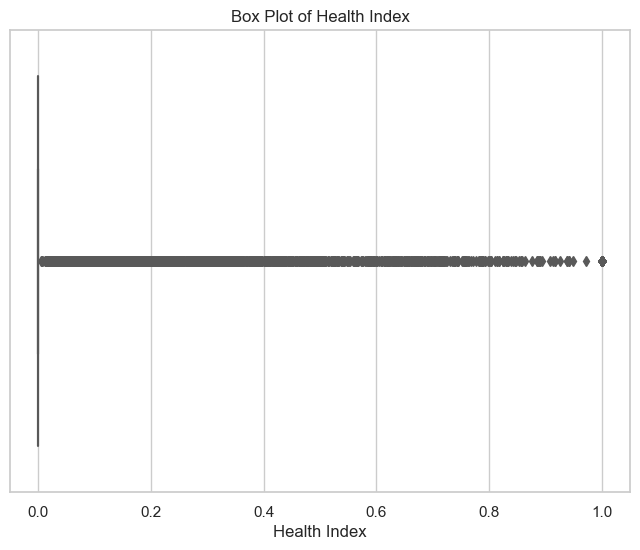

In [294]:
# Histogram for 'health_index'
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['health_index'], kde=True)
plt.title("Distribution of Health Index")
plt.xlabel("Health Index")
plt.xlim(0,1)
plt.ylabel("Frequency")
plt.show()

# Scatter plot for 'health_index' vs 'total_cui_spending'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_cui_spending', y='health_index', data=df_new_features)
plt.title("Health Index vs Total CUI Spending")
plt.xlabel("Total CUI Spending")
plt.ylabel("Health Index")
plt.show()

# Box plot for 'health_index'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['health_index'])
plt.title("Box Plot of Health Index")
plt.xlabel("Health Index")
plt.show()

> ## 5.4. Total Orders <a class="anchor" id="weekend_and_weekday_orders"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a feature to indicate the total number of orders placed.

In [295]:
df_new_features["total_orders"].describe().round(2)

count    31236.00
mean         4.36
std          5.01
min          1.00
25%          2.00
50%          3.00
75%          5.00
max         94.00
Name: total_orders, dtype: float64

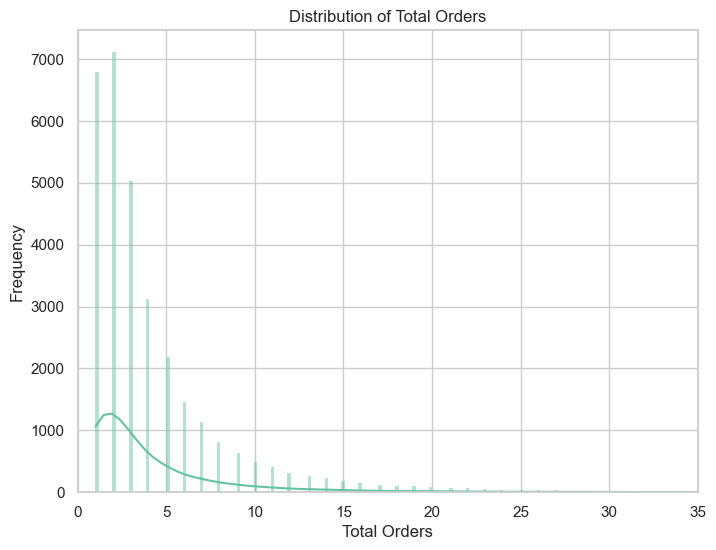

In [296]:
# Histogram for 'health_index'
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['total_orders'], kde=True)
plt.title("Distribution of Total Orders")
plt.xlabel("Total Orders")
plt.xlim(0, 35)
plt.ylabel("Frequency")
plt.show()

> ## 5.4. Weekend and Weekday Orders <a class="anchor" id="weekend_and_weekday_orders"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a feature to indicate the number of orders placed during the weekend (Saturday and Sunday) versus weekdays.

In [297]:
# Create a column for weekend orders (DOW_0 and DOW_6)
df_new_features["weekend_orders"] = df_new_features["DOW_0"] + df_new_features["DOW_6"]

# Create a column for weekday orders (DOW_1 to DOW_5)
df_new_features["weekday_orders"] = df_new_features.loc[:, "DOW_1":"DOW_5"].sum(axis=1)

In [298]:
df_new_features[["weekend_orders", "weekday_orders"]].describe().round(2)

weekend_orders  weekday_orders
count        31236.00        31236.00
mean             1.26            3.11
std              1.75            3.72
min              0.00            0.00
25%              0.00            1.00
50%              1.00            2.00
75%              2.00            4.00
max             35.00           67.00

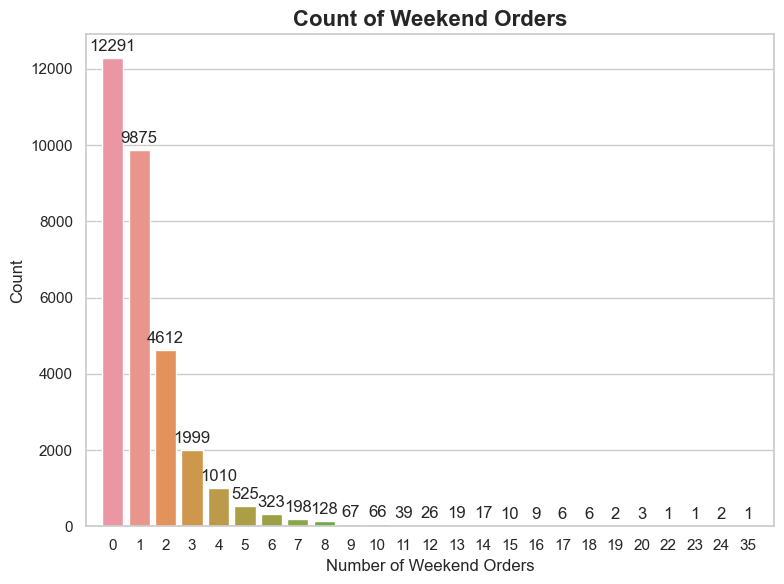

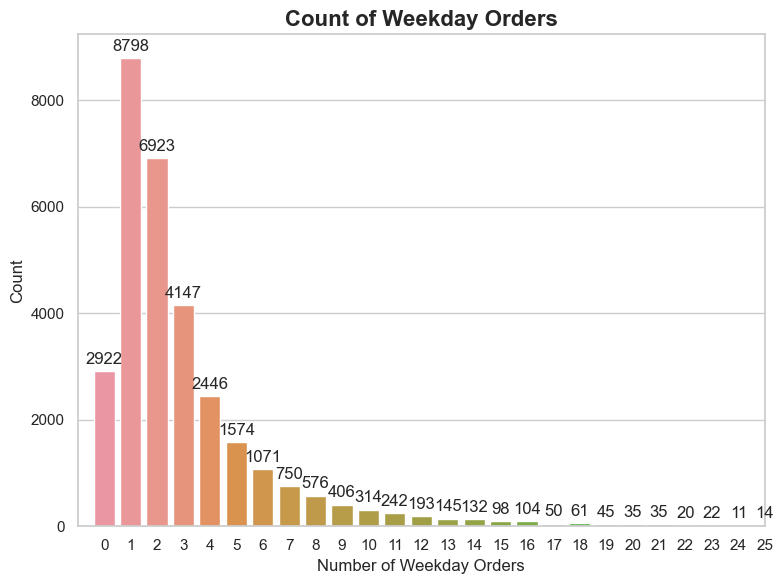

In [299]:
# Count plot for 'weekend_orders'
plot_distribution(
    data=df_new_features, 
    x="weekend_orders", 
    plot_type="count", 
    title="Count of Weekend Orders", 
    xlabel="Number of Weekend Orders", 
    ylabel="Count", 
    show_counts=True, 
    xlim=(-1, 25)
)


# Count plot for 'weekday_orders'
plot_distribution(
    data=df_new_features, 
    x="weekday_orders", 
    plot_type="count", 
    title="Count of Weekday Orders", 
    xlabel="Number of Weekday Orders", 
    ylabel="Count", 
    show_counts=True, 
    xlim=(-1, 25)
)


> ## 5.5. Hourly Orders Aggregation by Time of Day <a class="anchor" id="hourly_orders_aggregation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

In this section, we analyze the distribution of customer orders across different time periods throughout the day. The hourly order data, ranging from midnight (HR_0) to 11 PM (HR_23), is aggregated into four distinct periods: Dawn (12 AM - 5 AM), Morning (6 AM - 11 AM), Afternoon (12 PM - 5 PM), and Evening (6 PM - 11 PM)

In [300]:
# Define the hour ranges for each period
dawn_hours = df_new_features.loc[:, "HR_1":"HR_5"].sum(axis=1)  # HR_1 to HR_5
morning_hours = df_new_features.loc[:, "HR_6":"HR_11"].sum(axis=1)  # HR_6 to HR_11
afternoon_hours = df_new_features.loc[:, "HR_12":"HR_17"].sum(axis=1)  # HR_12 to HR_17
evening_hours = df_new_features.loc[:, "HR_18":"HR_23"].sum(axis=1)  # HR_18 to HR_23

# Create new columns for each period
df_new_features["orders_dawn"] = dawn_hours
df_new_features["orders_morning"] = morning_hours
df_new_features["orders_afternoon"] = afternoon_hours
df_new_features["orders_evening"] = evening_hours

In [301]:
df_new_features.loc[:, "orders_dawn":"orders_evening"].describe().round(2)

orders_dawn  orders_morning  orders_afternoon  orders_evening
count     31236.00        31236.00          31236.00        31236.00
mean          0.42            1.22              1.80            0.89
std           1.14            2.22              2.73            1.91
min           0.00            0.00              0.00            0.00
25%           0.00            0.00              0.00            0.00
50%           0.00            1.00              1.00            0.00
75%           0.00            2.00              2.00            1.00
max          25.00           50.00             52.00           52.00

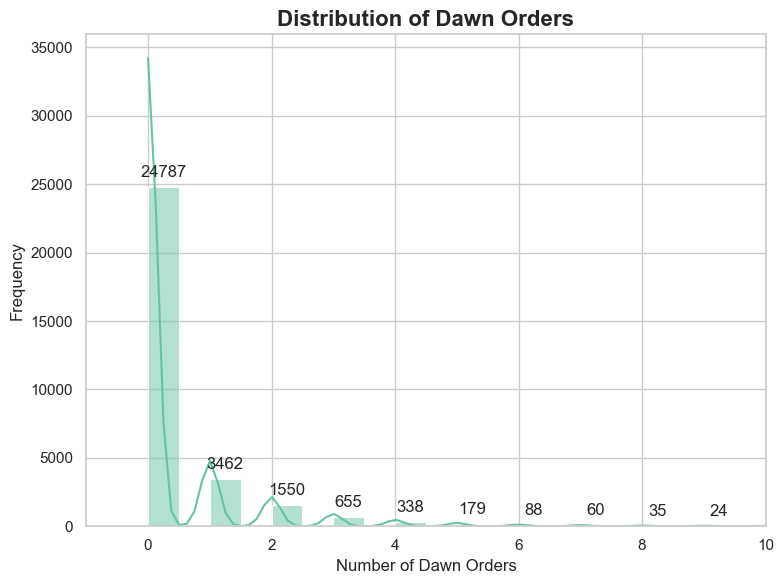

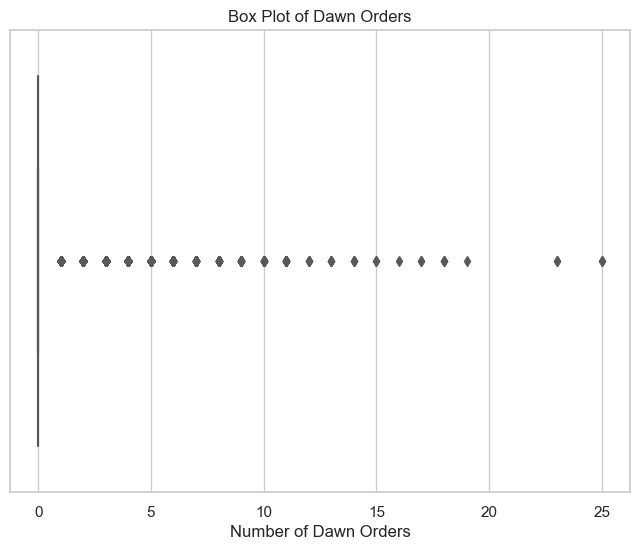

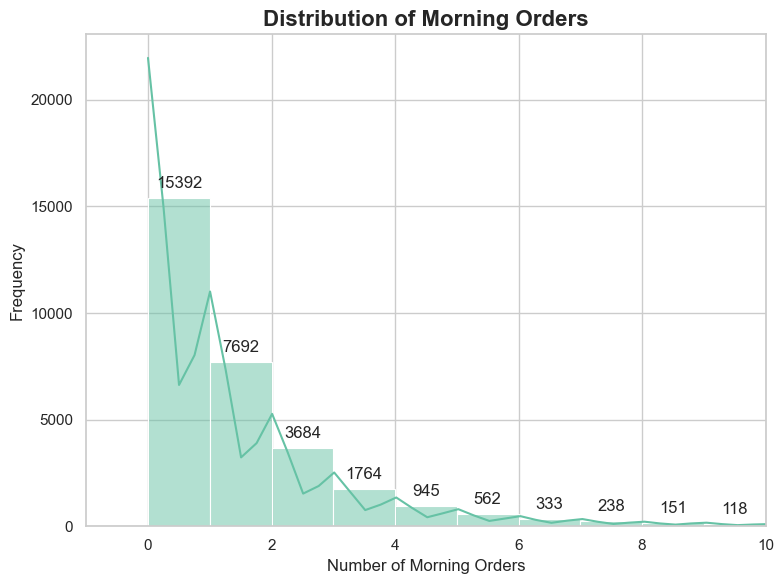

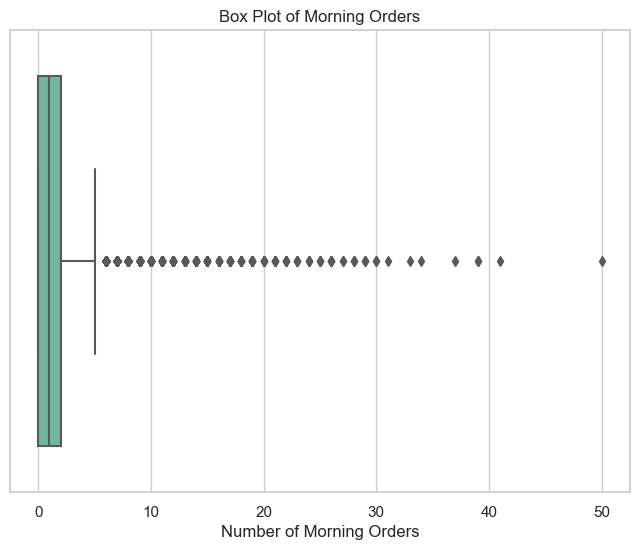

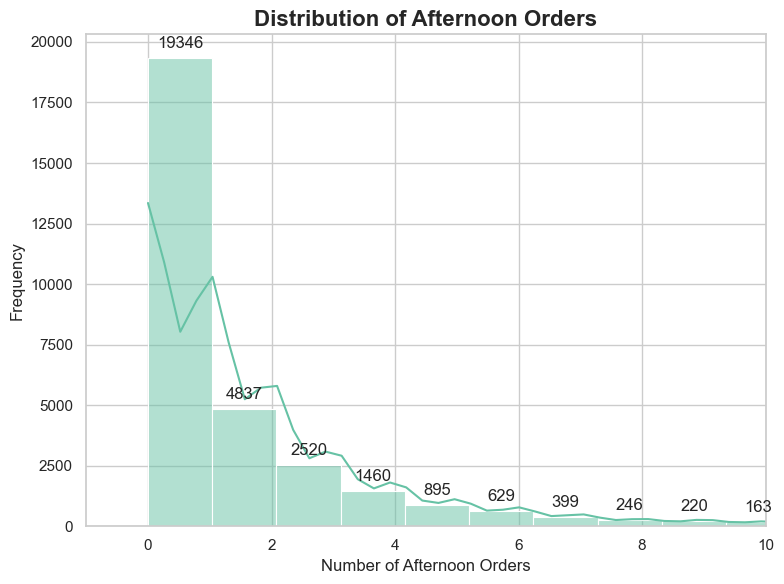

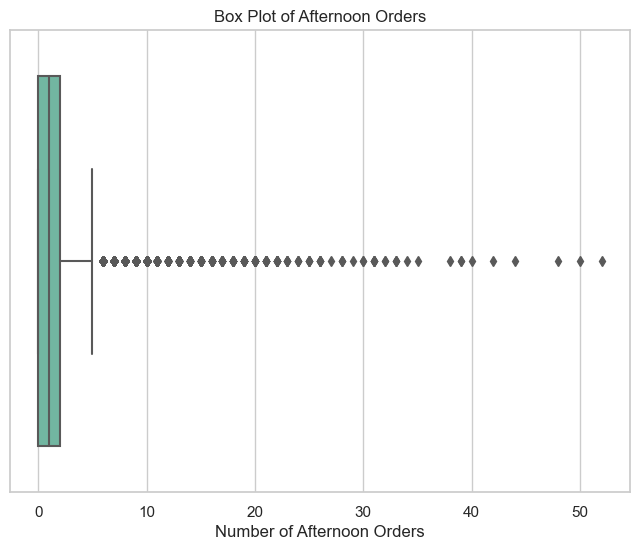

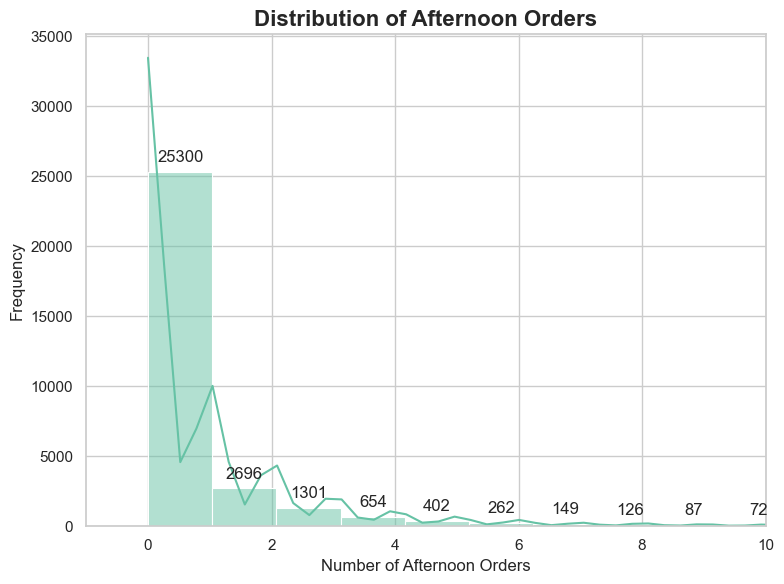

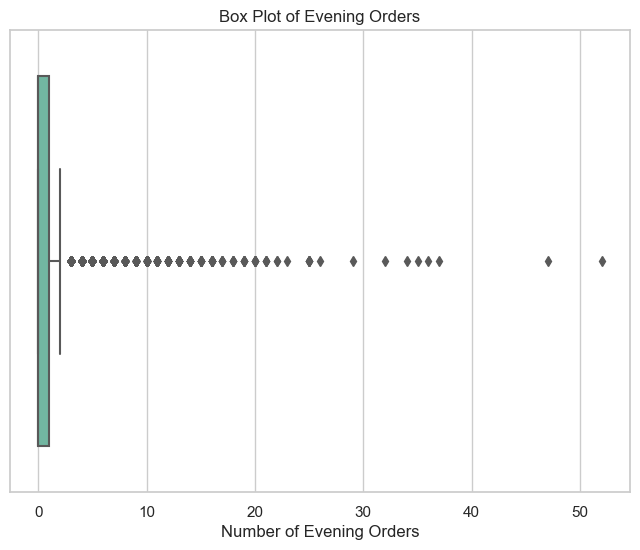

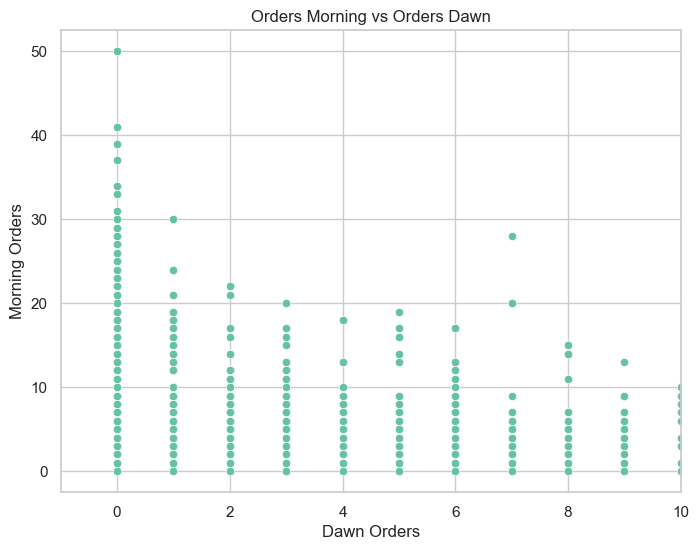

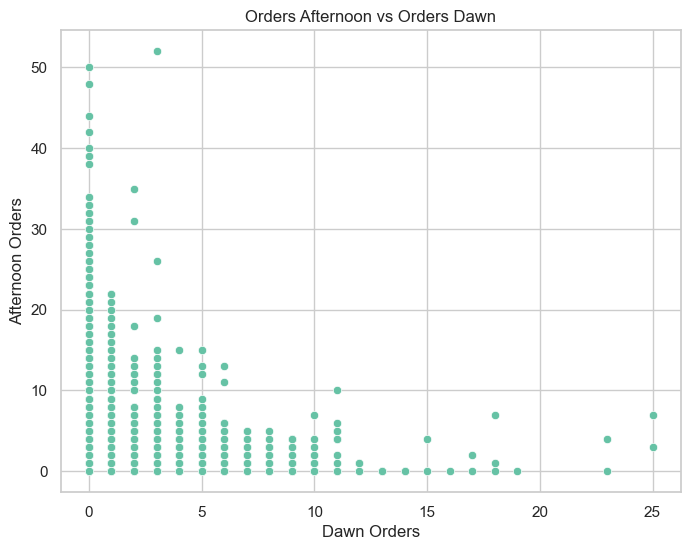

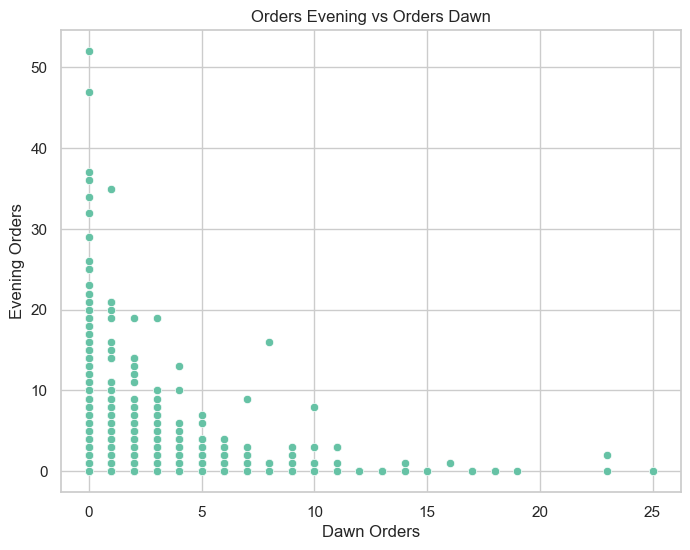

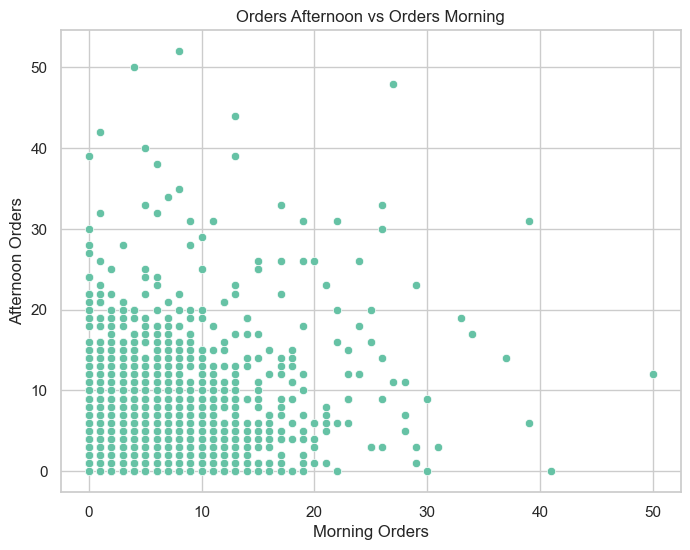

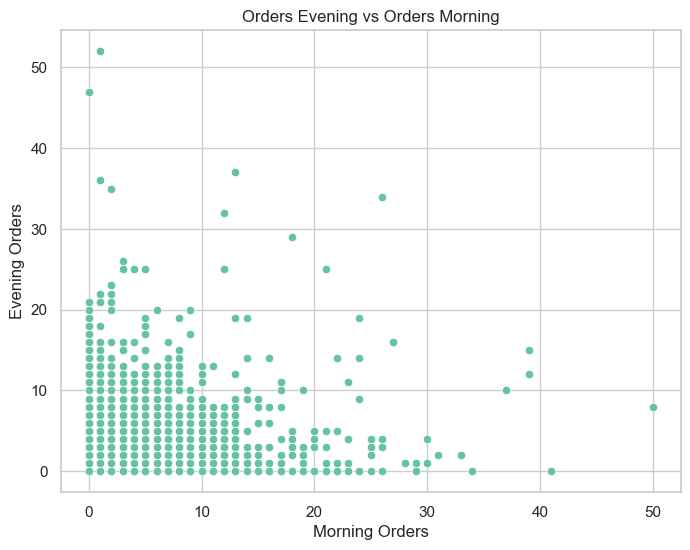

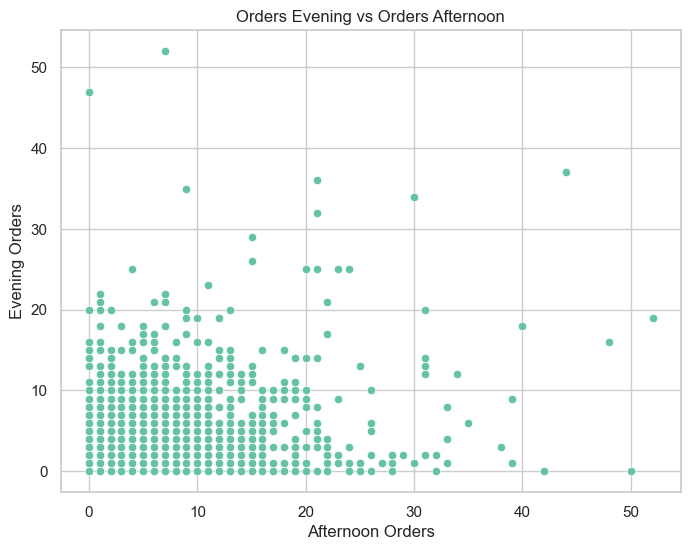

In [302]:
# Histogram for 'orders_dawn' with total counts displayed above each bar
plot_distribution(
    data=df_new_features, 
    x="orders_dawn", 
    plot_type="hist", 
    title="Distribution of Dawn Orders", 
    xlabel="Number of Dawn Orders", 
    ylabel="Frequency", 
    kde=True, 
    bins=50, 
    xlim=(-1, 10), 
    show_counts=True
)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['orders_dawn'])
plt.title("Box Plot of Dawn Orders")
plt.xlabel("Number of Dawn Orders")
plt.show()

# Histogram and Box Plot for 'orders_morning'
# Histogram for 'orders_morning'
plot_distribution(
    data=df_new_features, 
    x="orders_morning", 
    plot_type="hist", 
    title="Distribution of Morning Orders", 
    xlabel="Number of Morning Orders", 
    ylabel="Frequency", 
    kde=True, 
    bins=50, 
    xlim=(-1, 10), 
    show_counts=True
)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['orders_morning'])
plt.title("Box Plot of Morning Orders")
plt.xlabel("Number of Morning Orders")
plt.show()

# Histogram and Box Plot for 'orders_afternoon'
plot_distribution(
    data=df_new_features, 
    x="orders_afternoon", 
    plot_type="hist", 
    title="Distribution of Afternoon Orders", 
    xlabel="Number of Afternoon Orders", 
    ylabel="Frequency", 
    kde=True, 
    bins=50, 
    xlim=(-1, 10), 
    show_counts=True
)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['orders_afternoon'])
plt.title("Box Plot of Afternoon Orders")
plt.xlabel("Number of Afternoon Orders")
plt.show()

# Histogram and Box Plot for 'orders_evening'
plot_distribution(
    data=df_new_features, 
    x="orders_evening", 
    plot_type="hist", 
    title="Distribution of Afternoon Orders", 
    xlabel="Number of Afternoon Orders", 
    ylabel="Frequency", 
    kde=True, 
    bins=50, 
    xlim=(-1, 10), 
    show_counts=True
)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['orders_evening'])
plt.title("Box Plot of Evening Orders")
plt.xlabel("Number of Evening Orders")
plt.show()

# Scatter Plots Comparing Different Order Times
plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_dawn', y='orders_morning', data=df_new_features)
plt.title("Orders Morning vs Orders Dawn")
plt.xlabel("Dawn Orders")
plt.xlim(left = -1, right= 10)
plt.ylabel("Morning Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_dawn', y='orders_afternoon', data=df_new_features)
plt.title("Orders Afternoon vs Orders Dawn")
plt.xlabel("Dawn Orders")
plt.ylabel("Afternoon Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_dawn', y='orders_evening', data=df_new_features)
plt.title("Orders Evening vs Orders Dawn")
plt.xlabel("Dawn Orders")
plt.ylabel("Evening Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_morning', y='orders_afternoon', data=df_new_features)
plt.title("Orders Afternoon vs Orders Morning")
plt.xlabel("Morning Orders")
plt.ylabel("Afternoon Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_morning', y='orders_evening', data=df_new_features)
plt.title("Orders Evening vs Orders Morning")
plt.xlabel("Morning Orders")
plt.ylabel("Evening Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_afternoon', y='orders_evening', data=df_new_features)
plt.title("Orders Evening vs Orders Afternoon")
plt.xlabel("Afternoon Orders")
plt.ylabel("Evening Orders")
plt.show()


> ## 5.6. Order Recency <a class="anchor" id="Order_Recency"></a>

Recency of the customer’s last order, normalized by the full time span covered in the dataset.

While last_order gives direct information, order_recency will simplify interpreting recency at a glance.

In [303]:
# calculate the recency of the last order: 1 being the most recent and 0 being the least recent
df_new_features["order_recency"] = df_new_features["last_order"] / df_new_features['last_order'].max()

In [304]:
df_new_features["order_recency"].describe().round(2)

count    31236.00
mean         0.71
std          0.26
min          0.00
25%          0.54
50%          0.78
75%          0.92
max          1.00
Name: order_recency, dtype: float64

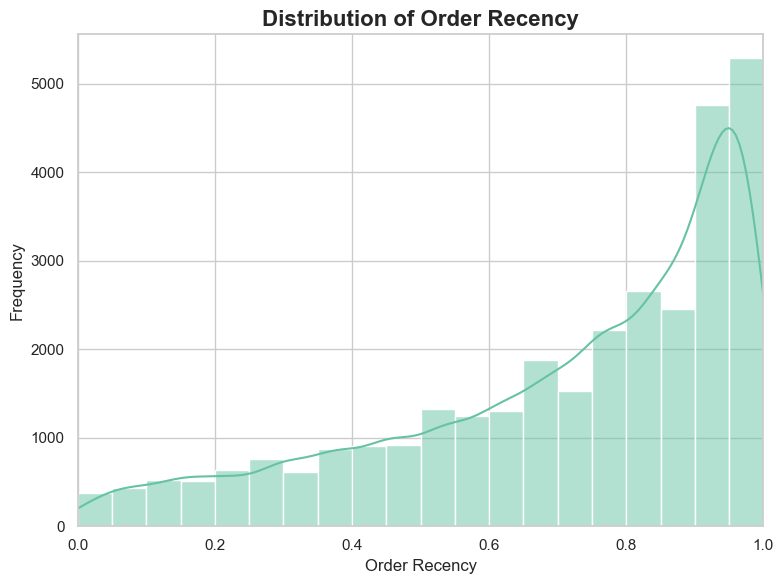

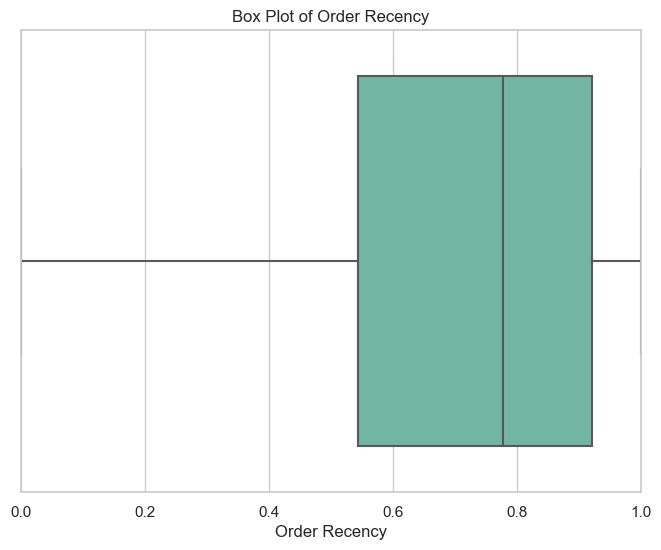

In [305]:
# Histogram for 'order_recency'
plot_distribution(
    data=df_new_features, 
    x="order_recency", 
    plot_type="hist", 
    title="Distribution of Order Recency", 
    xlabel="Order Recency", 
    ylabel="Frequency", 
    kde=True, 
    bins=20,
    xlim=(0, 1), 
    show_counts=False
)

# Box plot for 'order_recency'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['order_recency'])
plt.title("Box Plot of Order Recency")
plt.xlabel("Order Recency")
plt.xlim(0, 1)  # Set x-axis range from 0 to 1
plt.show()

> ## 5.7. Average Daily Orders <a class="anchor" id="Average_Daily_Orders"></a>

How frequently does the customer place an order? This could help distinguish regular customers from occasional ones.

In [306]:
# Calculate average daily orders based on the total dataset period (from first day to most recent order in the dataset)
df_new_features["avg_daily_orders"] = df_new_features["total_orders"] / df_new_features['last_order'].max()

In [307]:
df_new_features["avg_daily_orders"].describe().round(2)

count    31236.00
mean         0.05
std          0.06
min          0.01
25%          0.02
50%          0.03
75%          0.06
max          1.04
Name: avg_daily_orders, dtype: float64

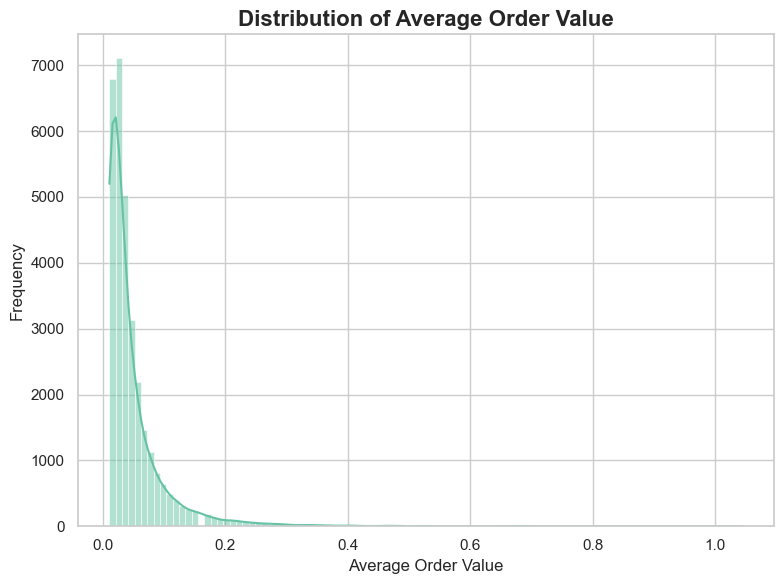

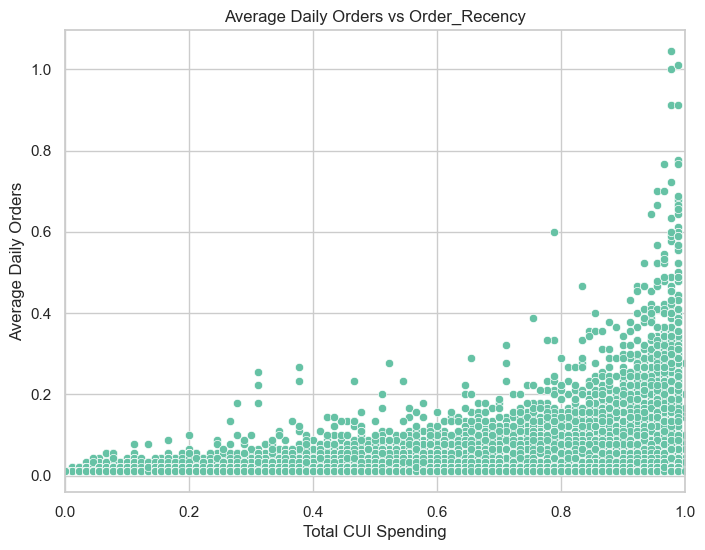

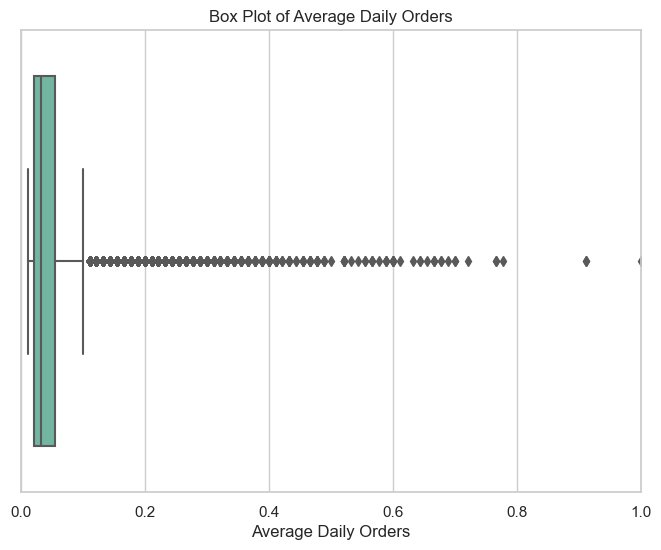

In [308]:
# Histogram for 'avg_order_value'
plot_distribution(
    data=df_new_features, 
    x="avg_daily_orders", 
    plot_type="hist", 
    title="Distribution of Average Order Value", 
    xlabel="Average Order Value", 
    ylabel="Frequency", 
    kde=True, 
    bins=100,
    show_counts=False
)

# Scatter plot for 'avg_daily_orders' vs 'total_cui_spending'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='order_recency', y='avg_daily_orders', data=df_new_features)
plt.title("Average Daily Orders vs Order_Recency")
plt.xlabel("Total CUI Spending")
plt.ylabel("Average Daily Orders")
plt.xlim(0, 1)  # Set x-axis range from 0 to 1
plt.show()

# Box plot for 'avg_daily_orders'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['avg_daily_orders'])
plt.title("Box Plot of Average Daily Orders")
plt.xlabel("Average Daily Orders")
plt.xlim(0, 1)  # Set x-axis range from 0 to 1
plt.show()

> ## 5.8. Average Order Value <a class="anchor" id="Average_Order_Value"></a>
This feature could help in identifying high-value customers who spend more per order.

In [309]:
df_new_features["avg_order_value"] = df_new_features["total_cui_spending"] / df_new_features["total_orders"]

In [310]:
df_new_features["avg_order_value"].describe().round(2)

count    31236.00
mean        10.31
std          7.86
min          0.37
25%          5.07
50%          8.22
75%         12.93
max        104.32
Name: avg_order_value, dtype: float64

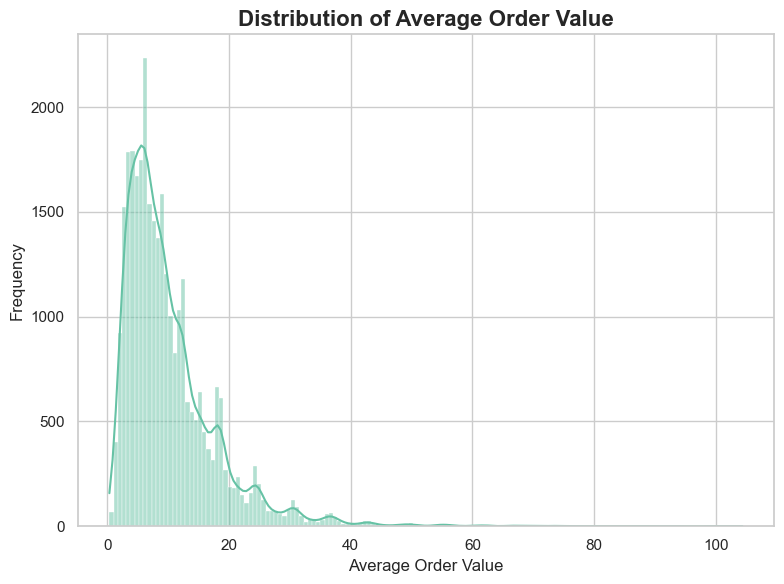

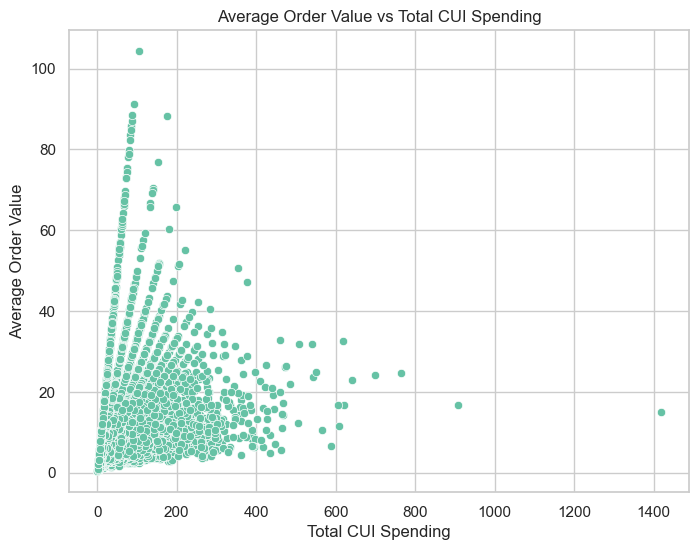

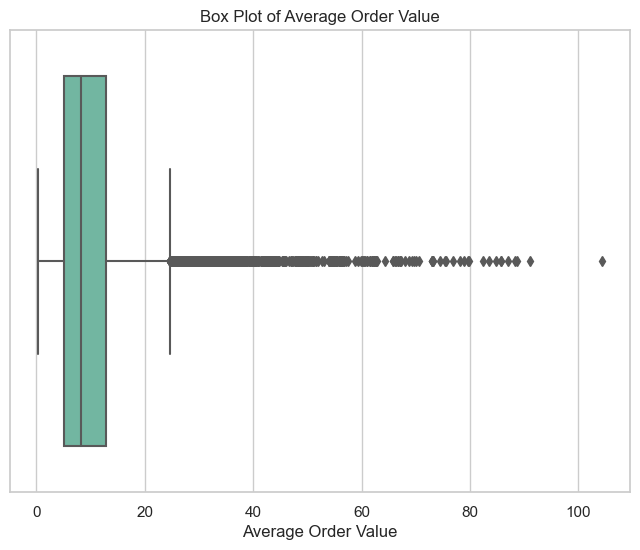

In [311]:
# Histogram for 'avg_order_value'
plot_distribution(
    data=df_new_features, 
    x="avg_order_value", 
    plot_type="hist", 
    title="Distribution of Average Order Value", 
    xlabel="Average Order Value", 
    ylabel="Frequency", 
    kde=True,
    bins=150, 
    show_counts=False
)
# Scatter plot for 'avg_order_value' vs 'total_cui_spending'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_cui_spending', y='avg_order_value', data=df_new_features)
plt.title("Average Order Value vs Total CUI Spending")
plt.xlabel("Total CUI Spending")
plt.ylabel("Average Order Value")
plt.show()

# Box plot for 'avg_order_value'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['avg_order_value'])
plt.title("Box Plot of Average Order Value")
plt.xlabel("Average Order Value")
plt.show()

> ## 5.9. Promotion Used Indicator <a class="anchor" id="last_promotion_indicator"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a binary feature indicating whether the customer used a promotion. This can be helpful for analysis on promotional effectiveness.

In [312]:
round(df_new_features['last_promo'].value_counts(normalize=True) * 100, 2)

NOPROMO     52.58
DELIVERY    19.65
DISCOUNT    14.10
FREEBIE     13.67
Name: last_promo, dtype: float64

In [313]:
# Indicates if a promotion was used based on the last_promo value
df_new_features['promo_used'] = (df_new_features['last_promo'] != 'NOPROMO').astype(int)

In [314]:
round(df_new_features['promo_used'].value_counts(normalize=True) * 100, 2)

0    52.58
1    47.42
Name: promo_used, dtype: float64

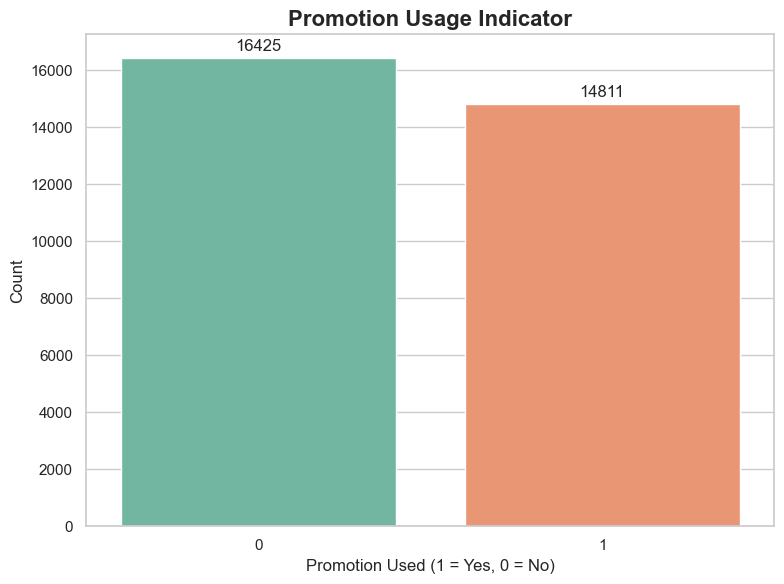

In [315]:
plot_distribution(
    data=df_new_features,
    x="promo_used",
    plot_type="count",
    title="Promotion Usage Indicator",
    xlabel="Promotion Used (1 = Yes, 0 = No)",
    ylabel="Count",
    show_counts=True,  # Display counts inside bars
)



> ## 5.10 Chain Orders Proportion <a class="anchor" id="Chain_Percentage_Chain_Customer"></a>

Tracks how much percentage of orders are Chain Restaurants

In [316]:
# Calculate the proportion of orders that are from chain vendors (handling potential division by zero)
df_new_features['chain_orders_prop'] = df_new_features['chain_orders'] / df_new_features['total_orders'].replace(0, np.nan)

In [317]:
df_new_features["chain_orders_prop"].describe().round(2)

count    31236.00
mean         0.63
std          0.39
min          0.00
25%          0.33
50%          0.72
75%          1.00
max          1.00
Name: chain_orders_prop, dtype: float64

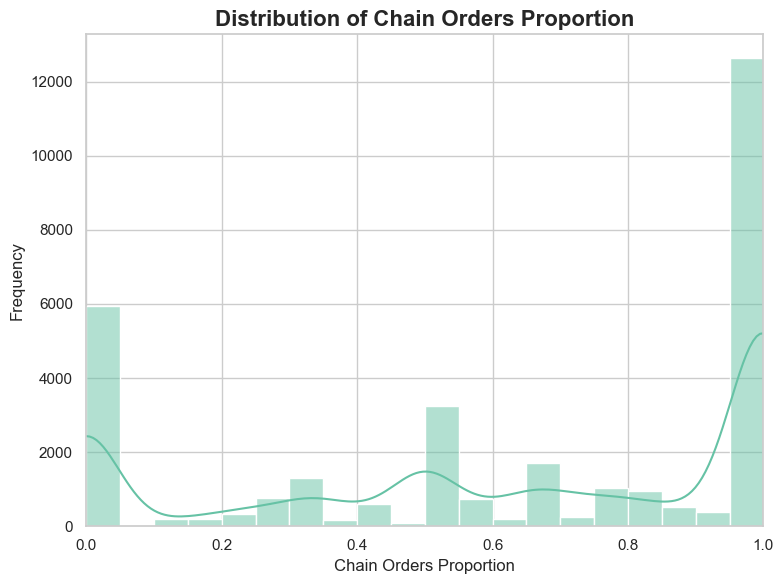

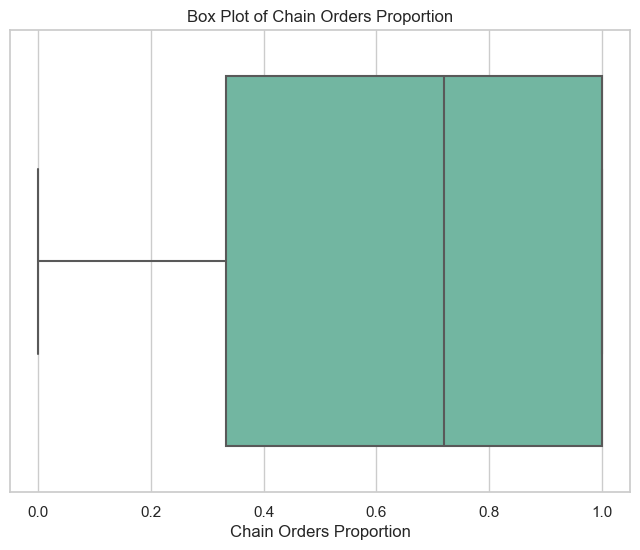

In [318]:
# Histogram for 'chain_orders_prop'
plot_distribution(
    data=df_new_features, 
    x="chain_orders_prop", 
    plot_type="hist", 
    title="Distribution of Chain Orders Proportion", 
    xlabel="Chain Orders Proportion", 
    ylabel="Frequency", 
    kde=True, 
    bins=20,
    xlim=(0, 1), 
    show_counts=False
)

# Box plot for 'chain_orders_prop'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['chain_orders_prop'])
plt.title("Box Plot of Chain Orders Proportion")
plt.xlabel("Chain Orders Proportion")
plt.show()

> ## 5.11. Cities <a class="anchor" id="cities"></a>

Grouping of customer_regions into cities based on the findings and assumptions that the customer_region represents postal codes. And therefore customer_regions with the same prefix number belong to the same city.

In [319]:
# Extract the prefix from the 'customer_region' column
df_new_features['city'] = df_new_features['customer_region'].str[:1]

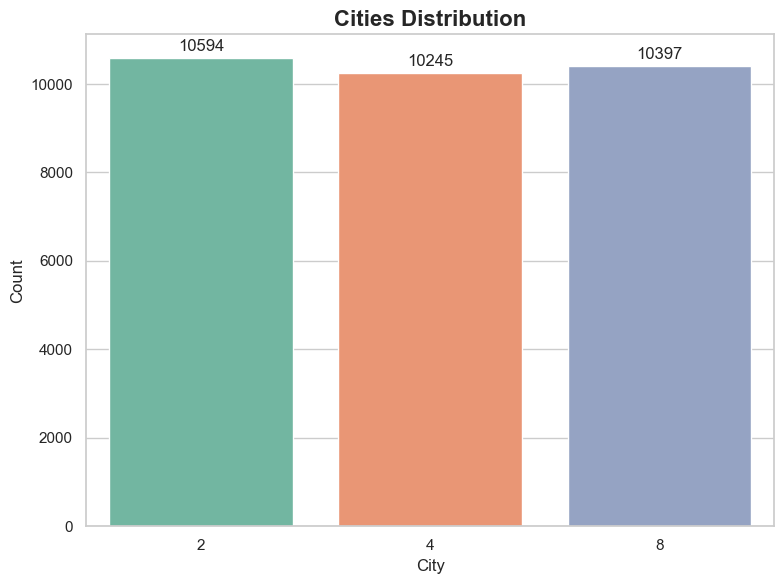

In [320]:
plot_distribution(
    data=df_new_features,
    x="city",
    plot_type="count",
    title="Cities Distribution",
    xlabel="City",
    ylabel="Count",
    show_counts=True,  # Display counts inside bars
)

> ## 5.12. Cuisine Origin Spend <a class="anchor" id="cuisine_origin_spend"></a>
This feature groups spending into three broad categories based on the origin of the cuisine: Asian, Western, and Other. Indian cuisine is included under "Asian," while cuisines like Italian and American are grouped under "Western."

In [321]:
# Cuisine Origin Spending
df_new_features["cui_asian_spending"] = (
    df_new_features["CUI_Asian"] + 
    df_new_features["CUI_Chinese"] + 
    df_new_features["CUI_Japanese"] + 
    df_new_features["CUI_Thai"] + 
    df_new_features["CUI_Indian"] 
)

df_new_features["cui_western_spending"] = (
    df_new_features["CUI_Italian"] + 
    df_new_features["CUI_American"]
)

df_new_features["cui_other_spending"] = df_new_features["CUI_OTHER"]

> ## 5.13. Meal_Occasion_Spend<a class="anchor" id="meal_occasion_spend"></a>
This feature organizes spending into two categories based on the type of meal or occasion: "Main Dishes" (meals typically consumed as full meals) and "Snacks & Beverages" (items such as drinks, desserts, and small bites).

In [322]:
# Meal Occasion Spending
df_new_features["main_dishes_spending"] = (
    df_new_features["CUI_Asian"] + df_new_features["CUI_Chinese"] + 
    df_new_features["CUI_Japanese"] + df_new_features["CUI_Thai"] + 
    df_new_features["CUI_Italian"] + df_new_features["CUI_Indian"] + 
    df_new_features["CUI_American"] + df_new_features["CUI_OTHER"]
)

df_new_features["snacks_beverages_spending"] = (
    df_new_features["CUI_Beverages"] + df_new_features["CUI_Cafe"] + 
    df_new_features["CUI_Desserts"] + df_new_features["CUI_Street Food / Snacks"])

> # 6. Outliers <a id="outliers"></a>

**Note:**

 - Outlier treatment is performed after feature engineering to reduce complexity and focus on more meaningful features. By aggregating related variables, we streamline the analysis and avoid redundant work. This approach ensures that outlier detection targets the most relevant patterns and trends, improving efficiency and interpretability. Raw features will be only analyzed individually if they provide critical insights not captured by aggregated features
 - Additionally, only metric features will be evaluated for outliers, as non-metric features have already been analyzed and found to be acceptable

In [323]:
df_outliers = df_new_features.copy()

>## 6.1. Defining Relevant Metric Features <a id="defining_features"></a>

In [324]:
# Redefine auxiliary variables, because more features were added

# Define metric and non-metric features
metric_features = df_outliers.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_outliers.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW and HR and CUI columns from metric features
selected_metric_features = [feat for feat in metric_features if feat not in cui_columns + dow_columns + hr_columns]

In [325]:
selected_metric_features

['customer_age',
 'vendor_count',
 'product_count',
 'chain_orders',
 'first_order',
 'last_order',
 'total_cui_spending',
 'total_orders',
 'health_index',
 'weekend_orders',
 'weekday_orders',
 'orders_dawn',
 'orders_morning',
 'orders_afternoon',
 'orders_evening',
 'order_recency',
 'avg_daily_orders',
 'avg_order_value',
 'promo_used',
 'chain_orders_prop',
 'cui_asian_spending',
 'cui_western_spending',
 'cui_other_spending',
 'main_dishes_spending',
 'snacks_beverages_spending']

>## 6.2. Histograms and Boxplots <a id="visualizations"></a>

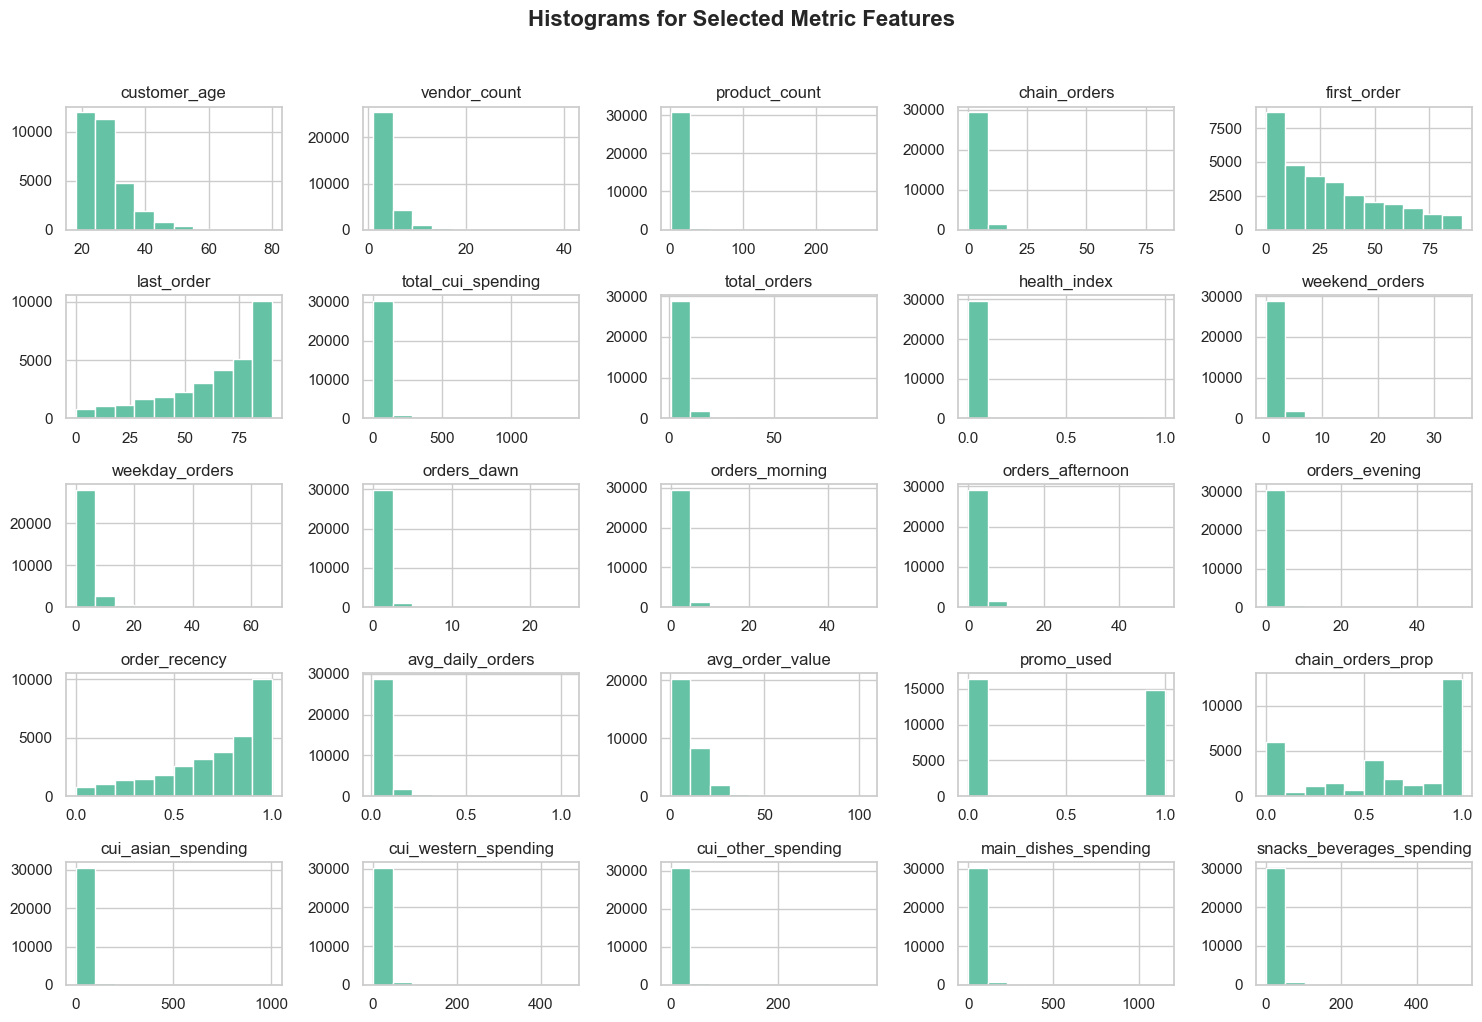

In [326]:
# Create histograms for each selected metric features
df_outliers[selected_metric_features].hist(figsize=(15, 10))

plt.suptitle("Histograms for Selected Metric Features", fontsize=16, weight='bold', y=1.02)

plt.tight_layout()
plt.show()

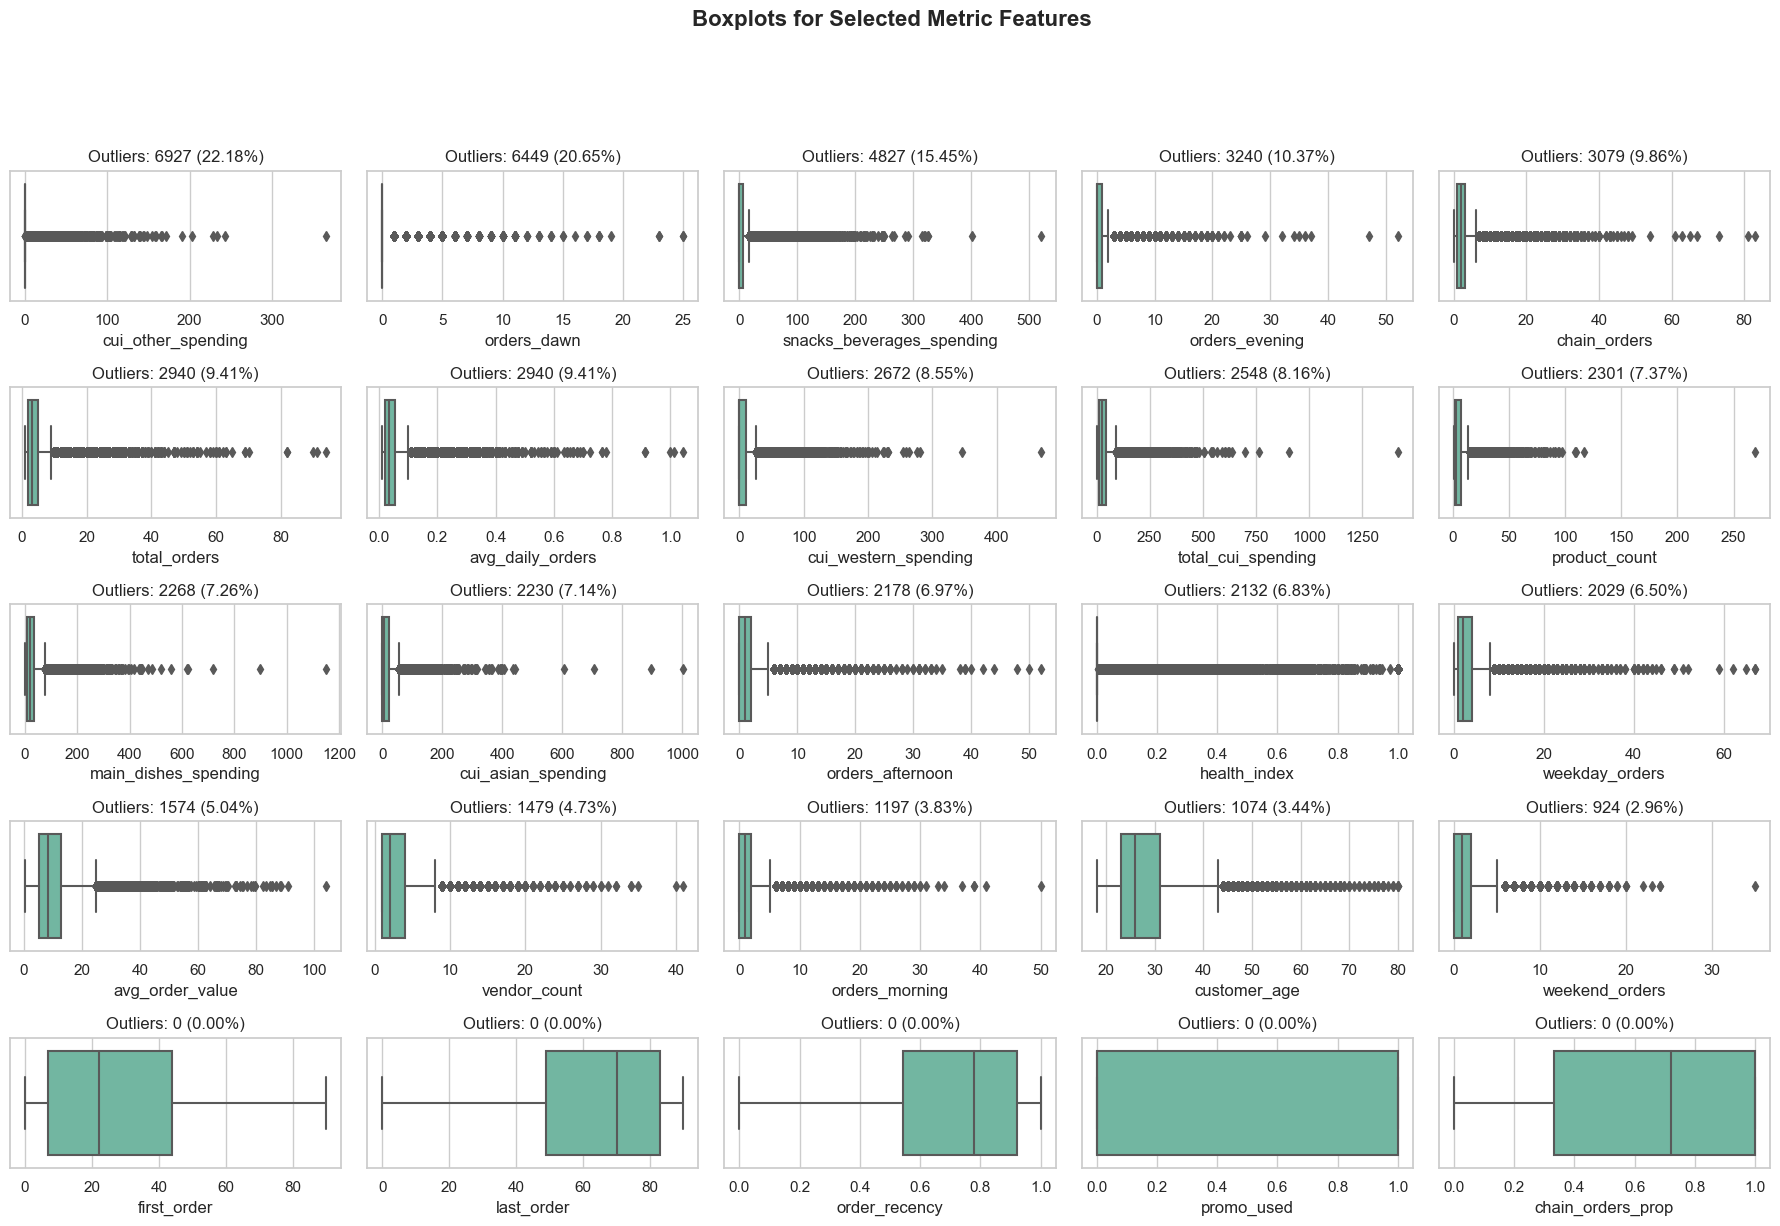

In [327]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=selected_metric_features, 
    df=df_outliers, 
    title="Boxplots for Selected Metric Features",
    sort_by="outliers"
)

>## 6.3 Filtering <a id="filtering"></a>

>### 6.3.1 IQR Method <a id="iqr_method"></a>

In [328]:
def drop_outliers_iqr(df_outliers, metric_features):
    # Calculate Q1, Q3, and IQR for each metric feature
    Q1 = df_outliers[metric_features].quantile(0.25)
    Q3 = df_outliers[metric_features].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    upper_lim = Q3 + 1.5 * IQR
    lower_lim = Q1 - 1.5 * IQR

    # Create a filter for rows within bounds
    filter_mask = (df_outliers[metric_features] >= lower_lim) & (df_outliers[metric_features] <= upper_lim)
    
    # Keep rows where all conditions are True across metric features
    filter_mask = filter_mask.all(axis=1)

    # Filter the original dataframe
    df_filtered = df_outliers[filter_mask]
    
    return df_filtered

In [329]:
# Apply IQR method
outliers_iqr = drop_outliers_iqr(df_outliers, selected_metric_features)

# Calculate the number of rows before and after removing outliers
original_count = len(df_outliers)
filtered_count = len(outliers_iqr)

# Calculate the percentage of rows removed
rows_removed = original_count - filtered_count
percentage_removed = (rows_removed / original_count) * 100

# Output the result
print(f'Outliers removed due to IQR method: {rows_removed} ({percentage_removed:.2f}%)')

Outliers removed due to IQR method: 19663 (62.95%)


**Conclusion:**
- As we can notice, this approach is problematic since it removes too much observations (as we expected based on the boxplots visualization)
- Therefore, we will take two key actions: (1) eliminate outliers that are considered to be data errors and (2) adjust outliers that are deemed to be extreme values, but not errors, by capping them at the upper or lower boundary limits

>### 6.3.2. Manual Method <a id="manual_method"></a>

In [330]:
df_outliers[selected_metric_features].describe().T

count       mean        std       min       25%  \
customer_age               31236.0  27.597932   7.027626      18.0      23.0   
vendor_count               31236.0   3.106288   2.746997       1.0       1.0   
product_count              31236.0    5.66417   6.886682       1.0       2.0   
chain_orders               31236.0   2.814701   3.913281       0.0       1.0   
first_order                31236.0   28.31198  24.087284       0.0       7.0   
last_order                 31236.0  63.738923  23.171953       0.0      49.0   
total_cui_spending         31236.0  38.262395  45.841673      0.37     13.03   
total_orders               31236.0   4.364931   5.013391       1.0       2.0   
health_index               31236.0   0.025054    0.12281       0.0       0.0   
weekend_orders             31236.0    1.25906   1.754791       0.0       0.0   
weekday_orders             31236.0   3.105871   3.721938       0.0       1.0   
orders_dawn                31236.0   0.415098   1.143909       0.0       0.0   
orders_morning             31236.0   1.220835   2.216421       0.0       0.0   
orders_afternoon           31236.0   1.799238   2.725685       0.0       0.0   
orders_evening             31236.0   0.890127   1.905826       0.0       0.0   
order_recency              31236.0    0.70821   0.257466       0.0  0.544444   
avg_daily_orders           31236.0   0.048499   0.055704  0.011111  0.022222   
avg_order_value            31236.0  10.305859   7.858711      0.37  5.067292   
promo_used                 31236.0   0.474164    0.49934       0.0       0.0   
chain_orders_prop          31236.0   0.627443   0.386894       0.0  0.333333   
cui_asian_spending         31236.0  16.795316  29.020482       0.0       0.0   
cui_western_spending       31236.0   8.145986  16.965211       0.0       0.0   
cui_other_spending         31236.0   3.012866   9.811331       0.0       0.0   
main_dishes_spending       31236.0  27.954168  36.958574       0.0    6.9075   
snacks_beverages_spending  31236.0   7.873731  20.183784       0.0       0.0   

                                50%        75%       max  
customer_age                   26.0       31.0      80.0  
vendor_count                    2.0        4.0      41.0  
product_count                   3.0        7.0     269.0  
chain_orders                    2.0        3.0      83.0  
first_order                    22.0       44.0      90.0  
last_order                     70.0       83.0      90.0  
total_cui_spending            24.18      45.02   1418.33  
total_orders                    3.0        5.0      94.0  
health_index                    0.0        0.0       1.0  
weekend_orders                  1.0        2.0      35.0  
weekday_orders                  2.0        4.0      67.0  
orders_dawn                     0.0        0.0      25.0  
orders_morning                  1.0        2.0      50.0  
orders_afternoon                1.0        2.0      52.0  
orders_evening                  0.0        1.0      52.0  
order_recency              0.777778   0.922222       1.0  
avg_daily_orders           0.033333   0.055556  1.044444  
avg_order_value            8.215778  12.927857    104.32  
promo_used                      0.0        1.0       1.0  
chain_orders_prop              0.72        1.0       1.0  
cui_asian_spending             7.07      21.79   1003.43  
cui_western_spending            0.0      10.38    468.33  
cui_other_spending              0.0        0.0    366.08  
main_dishes_spending           18.0    34.7725   1151.93  
snacks_beverages_spending       0.0       6.34     519.7

In [331]:
# Define conditions for each feature to identify outliers
filters_manual = (
    (df_outliers['avg_daily_orders'] <= 0.80) &
    (df_outliers['avg_order_value'] <= 100) &
    (df_outliers['chain_orders'] <= 80) &
    (df_outliers['cui_asian_spending'] <= 500) &
    (df_outliers['cui_other_spending'] <= 300) &
    (df_outliers['cui_western_spending'] <= 300) & 
    (df_outliers['main_dishes_spending'] <= 800) &
    (df_outliers['orders_afternoon'] <= 45) &
    (df_outliers['orders_dawn'] <= 20) &
    (df_outliers['orders_evening'] <= 40) &
    (df_outliers['orders_morning'] <= 45) &
    (df_outliers['product_count'] <= 150) &
    (df_outliers['snacks_beverages_spending'] <= 350) &
    (df_outliers['total_cui_spending'] <= 1000) &
    (df_outliers['total_orders'] <= 80) &
    (df_outliers['vendor_count'] <= 38) &
    (df_outliers['weekend_orders'] <= 58) &
    (df_outliers['weekend_orders'] <= 30)
)

# Calculate the number of rows before filtering
original_count = len(df_outliers)

# Identify the outliers (to save in a CSV file)
removed_outliers = df_outliers[~filters_manual]

# Filter the data based on the conditions
df_outliers = df_outliers[filters_manual]

# Calculate the number and percentage of rows removed
rows_removed = len(removed_outliers)
perc_removed = rows_removed / original_count * 100

# Save the removed outliers to a CSV file
removed_outliers.to_csv('manual_outliers.csv', index=False)

# Print the result
print(f"Outliers removed due to manual method: {rows_removed} ({round(perc_removed, 2)}%)")

Outliers removed due to manual method: 20 (0.06%)


In [332]:
# Define features without outliers (based on boxplots visualization)
# customer_age are not outliers (feature was already treated before)
# health_index are not outliers (all values range between 0 and 1)

no_outliers_features = ["customer_age", "health_index", "first_order", "last_order", "order_recency", "promo_used", "chain_orders_prop"]
# Features with outliers
outliers_features = list(set(selected_metric_features) - set(no_outliers_features))

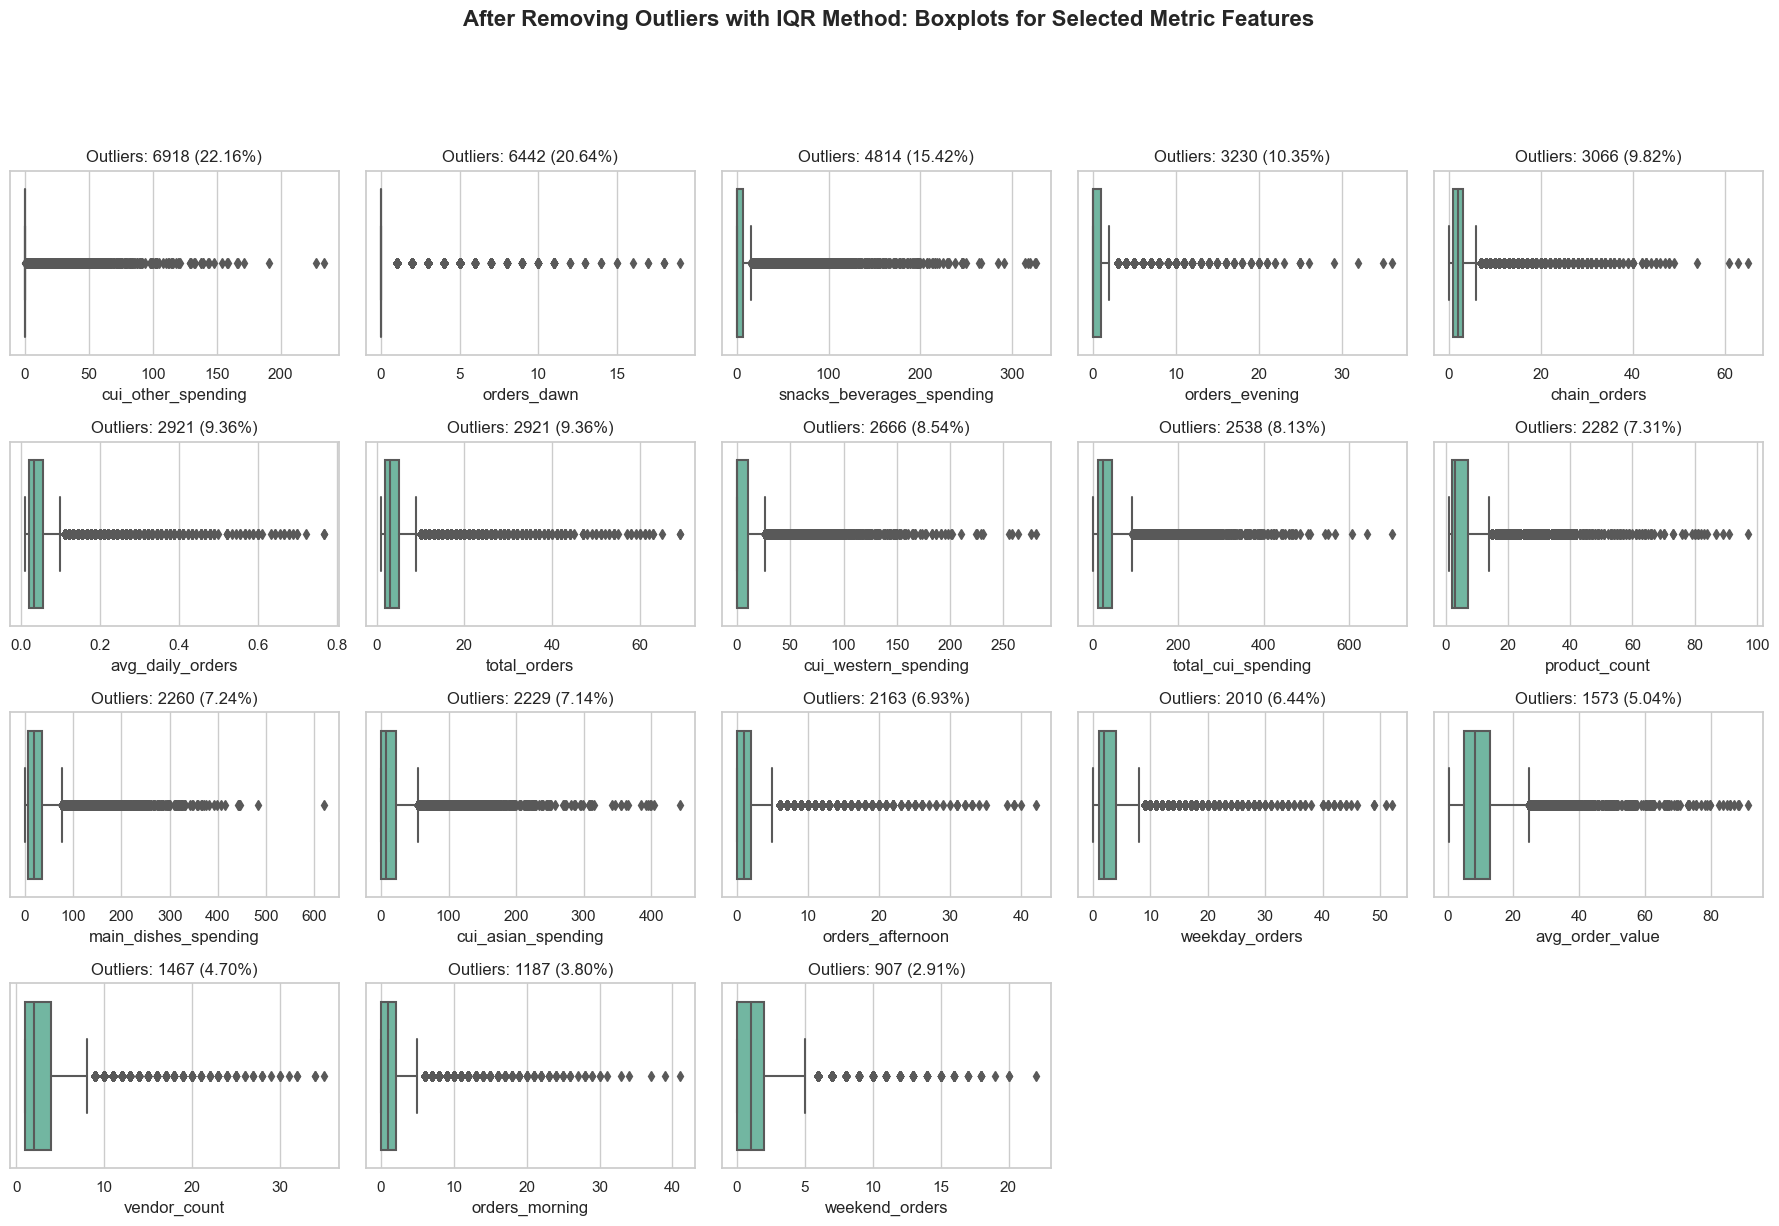

In [333]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=outliers_features, 
    df=df_outliers,
    title="After Removing Outliers with IQR Method: Boxplots for Selected Metric Features",
    sort_by="outliers"
)

>### 6.3.3 Winsorizing <a id="winsorizing"></a>

Winsorizing the data involves replacing the outliers with the nearest non-outlier values. This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized.

In [334]:
def winsorization(df, features):
    # Initialize a list to store the number of affected rows for each feature
    count_affected_rows = []
    # Set to track all unique affected rows
    affected_rows_set = set()

    # Get the total number of rows
    total_rows = len(df)

    # Loop through each feature
    for col in features:
        if col == "cui_other_spending":
            # Manual winsorization for "cui_other_spending"
            lower_bound = 0
            upper_bound = 200

        elif col == 'orders_dawn':
            # Manual winsorization for "orders_dawn"
            lower_bound = 0
            upper_bound = 15
        else:
            # Calculate IQR bounds
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

        # Identify rows that are outliers
        affected_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        affected_row_count = len(affected_rows)

        # Add the indices of affected rows to the set to track unique affected rows
        affected_rows_set.update(affected_rows.index)
        
        # Calculate percentage of affected rows for the feature
        affected_percentage = (affected_row_count / total_rows) * 100

        # Store the count and percentage for each feature
        count_affected_rows.append((col, affected_row_count, affected_percentage))

        # Apply winsorization
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Sort features by the percentage of affected rows in descending order
    count_affected_rows = sorted(count_affected_rows, key=lambda x: x[2], reverse=True)

    # Calculate total number of unique affected rows
    unique_affected_rows = len(affected_rows_set)
    total_affected_percentage = (unique_affected_rows / total_rows) * 100

    # Print results
    print("Affected Rows per Feature:\n")
    for col, count, percentage in count_affected_rows:
        print(f"{col}: {count} ({percentage:.2f}%)")

    print(f"\nTotal Affected Rows: {unique_affected_rows} ({total_affected_percentage:.2f}%)")

    return df

In [335]:
df_outliers = winsorization(df_outliers, outliers_features)

Affected Rows per Feature:

snacks_beverages_spending: 4814 (15.42%)
orders_evening: 3230 (10.35%)
chain_orders: 3066 (9.82%)
avg_daily_orders: 2921 (9.36%)
total_orders: 2921 (9.36%)
cui_western_spending: 2666 (8.54%)
total_cui_spending: 2538 (8.13%)
product_count: 2282 (7.31%)
main_dishes_spending: 2260 (7.24%)
cui_asian_spending: 2229 (7.14%)
orders_afternoon: 2163 (6.93%)
weekday_orders: 2010 (6.44%)
avg_order_value: 1573 (5.04%)
vendor_count: 1467 (4.70%)
orders_morning: 1187 (3.80%)
weekend_orders: 907 (2.91%)
orders_dawn: 7 (0.02%)
cui_other_spending: 2 (0.01%)

Total Affected Rows: 11959 (38.31%)


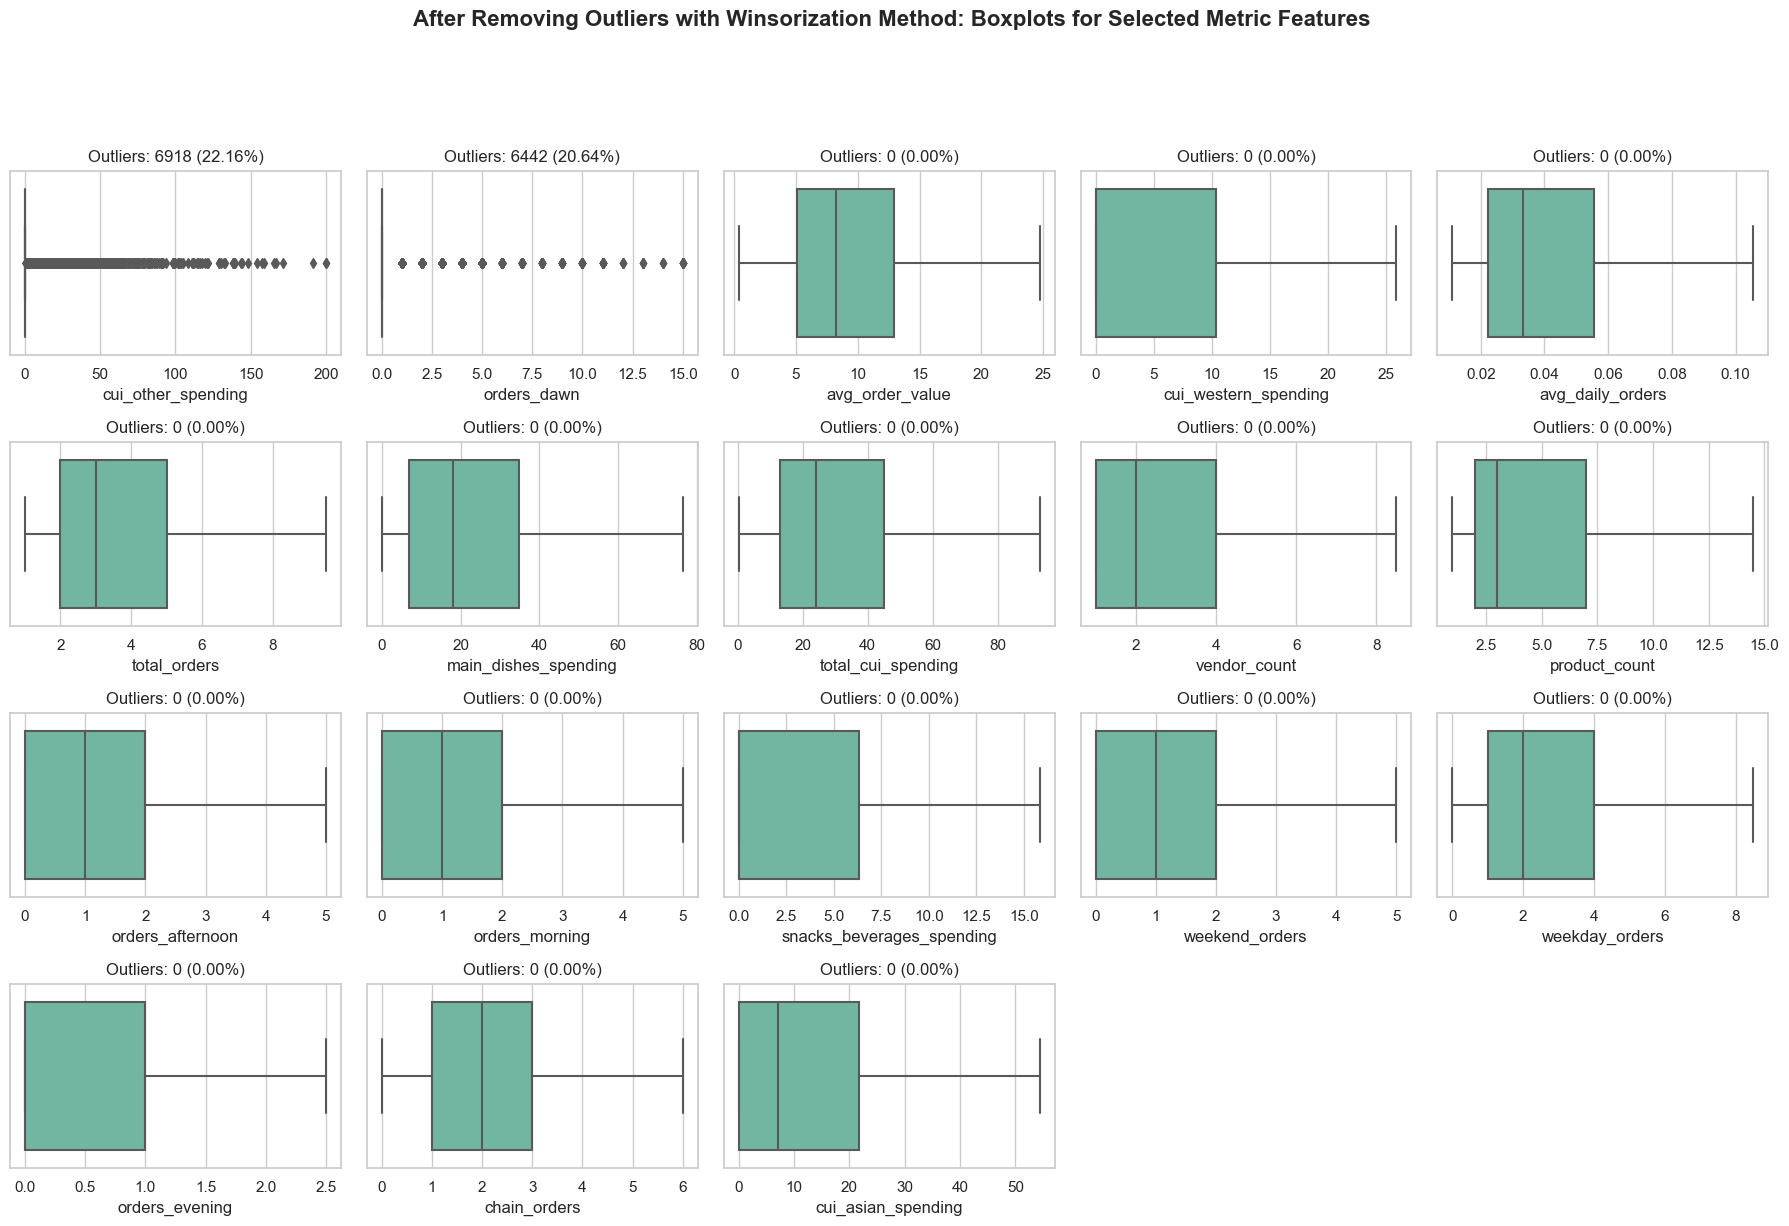

In [336]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=outliers_features, 
    df=df_outliers,
    title="After Removing Outliers with Winsorization Method: Boxplots for Selected Metric Features",
    sort_by="outliers"
)

>## 6.4. DBSCAN <a id="dbscan_outliers"></a>

In [337]:
df_outliers = df_new_features.copy()

>### 6.4.1. Identify eps value (elbow method) <a id="eps"></a>

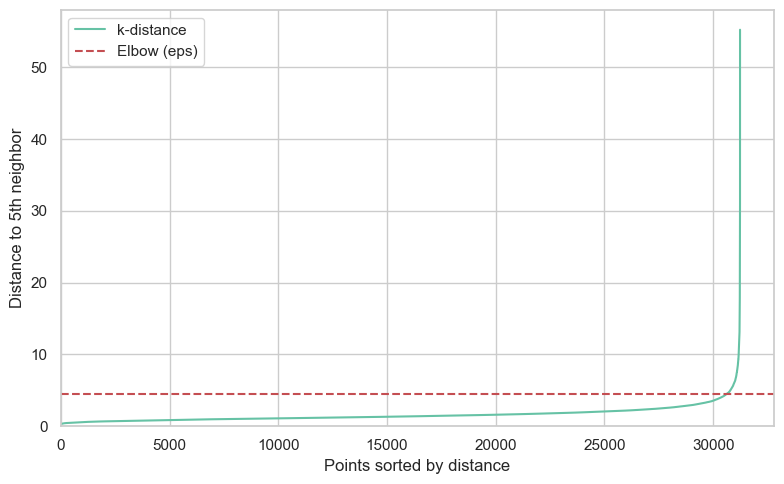

In [338]:
# Select numeric features for DBSCAN
X = df_outliers[selected_metric_features]

# Standardize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ser number of neighbors
k = 5

# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances
distances = np.sort(distances[:, k-1])

# Plot distances
plt.figure(figsize=(8, 5))
plt.plot(distances, label='k-distance')
plt.axhline(y=4.5, color='r', linestyle='--', label='Elbow (eps)')

# Set axis limits to start from 0
plt.xlim(0)
plt.ylim(0)

# Annotate the elbow point
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th neighbor')
plt.legend()
plt.tight_layout()
plt.show()

>### 6.4.2. Choose min_samples value <a id="min_samples"></a>

**Note:** The following cell is commented out, because it is not needed for execution (by the teacher). It is just auxiliary code

In [339]:
# # Set the parameters for DBSCAN
# min_samples_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# eps = 4.5 # Based on elbow point

# # List to store the percentage of outliers for each min_samples value
# outliers_percentage = []

# # Loop through different min_samples values and run DBSCAN
# for min_samples in min_samples_values:
#     # Perform DBSCAN clustering
#     db = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = db.fit_predict(X_scaled)
    
#     # Count the number of outliers
#     count_outliers = np.sum(labels == -1)
    
#     # Calculate the percentage of outliers
#     percentage_outliers = (count_outliers / len(X_scaled)) * 100
#     outliers_percentage.append(percentage_outliers)

# # Create a line chart
# plt.figure(figsize=(8, 6))
# plt.plot(min_samples_values, outliers_percentage, marker='o', linestyle='-', color='b')

# # Add labels and title
# plt.title('Percentage of Outliers vs. min_samples in DBSCAN', fontsize=14, weight='bold')
# plt.xlabel('min_samples', fontsize=12)
# plt.ylabel('Percentage of Outliers (%)', fontsize=12)

# # Display the grid
# plt.grid(True, linestyle='--', alpha=0.7)

# # Show the plot
# plt.tight_layout()
# plt.show()

**Conclusion:** Choosing min_samples = 3 is more conservative, as it results in only a small percentage (around 1.23%) of data being classified as outliers. This choice minimizes the risk of removing valid data while still identifying some potential outliers

>### 6.4.3. Apply DBSCAN to detect outliers <a id="apply_dbscan_outliers"></a>

In [340]:
# Set the parameters for DBSCAN
min_samples = 3
eps = 4.5

# Apply DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_scaled)

# Identify outlier indices
outlier_indices = np.where(labels == -1)[0]

# Count the number of outliers
count_outliers = len(outlier_indices)

# Calculate the percentage of outliers
perc_outliers = (count_outliers / len(X_scaled)) * 100

# Save the outliers to a CSV file
outliers = df_outliers.iloc[outlier_indices]
outliers.to_csv('dbscan_outliers.csv', index=False)

# Filter the original dataset to exclude the outliers
df_outliers.drop(index=outliers.index, inplace=True)

# Output the results
print(f"Number of outliers detected: {count_outliers} ({perc_outliers:.2f}%)")

Number of outliers detected: 384 (1.23%)


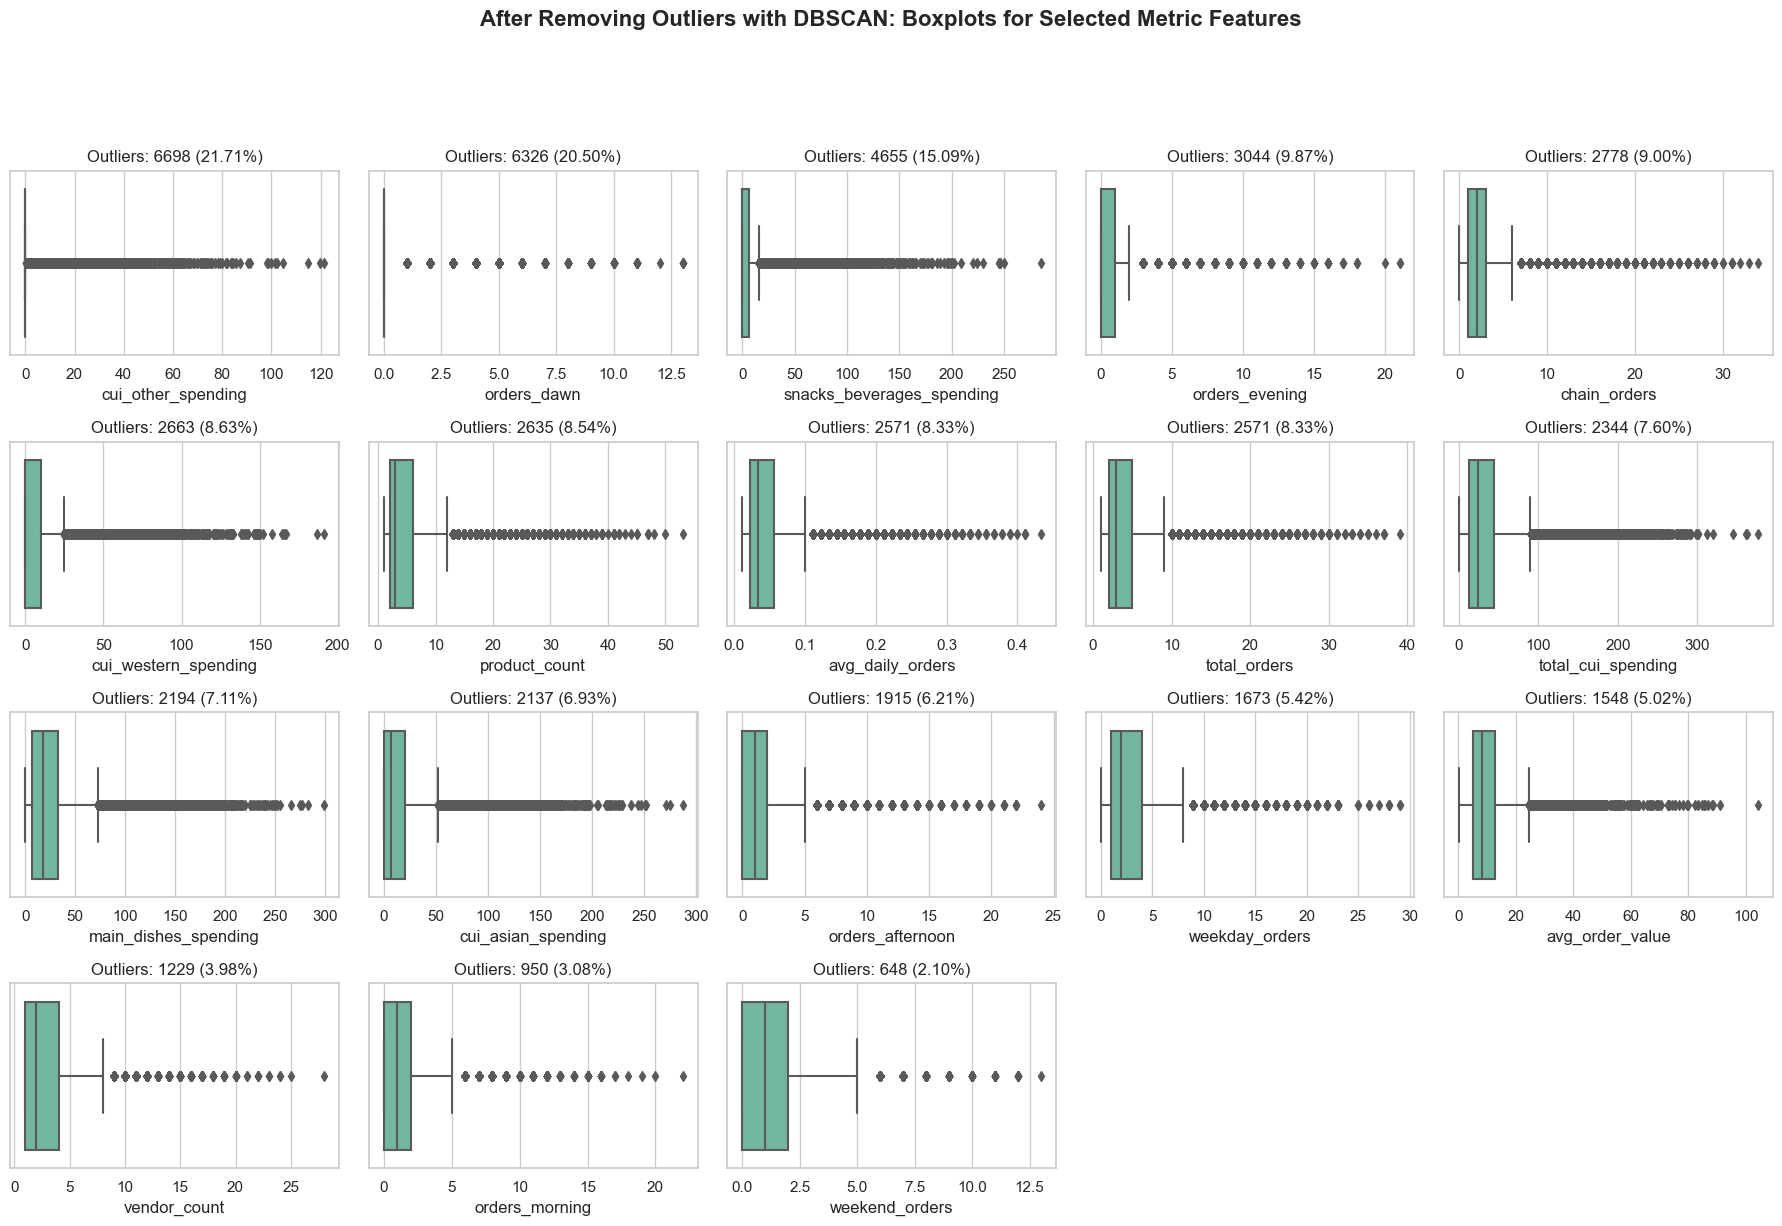

In [341]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=outliers_features, 
    df=df_outliers,
    title="After Removing Outliers with DBSCAN: Boxplots for Selected Metric Features",
    sort_by="outliers"
)

>### 6.4.4. Winsorizing <a id="winsorizing_after_dbscan"></a>

In [342]:
def winsorization(df, features):
    # Initialize a list to store the number of affected rows for each feature
    count_affected_rows = []
    # Set to track all unique affected rows
    affected_rows_set = set()

    # Get the total number of rows
    total_rows = len(df)

    # Loop through each feature
    for col in features:
        if col == "cui_other_spending":
            # Manual winsorization for "cui_other_spending"
            lower_bound = 0
            upper_bound = 200

        elif col == 'orders_dawn':
            # Manual winsorization for "orders_dawn"
            lower_bound = 0
            upper_bound = 15
        else:
            # Calculate IQR bounds
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

        # Identify rows that are outliers
        affected_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        affected_row_count = len(affected_rows)

        # Add the indices of affected rows to the set to track unique affected rows
        affected_rows_set.update(affected_rows.index)
        
        # Calculate percentage of affected rows for the feature
        affected_percentage = (affected_row_count / total_rows) * 100

        # Store the count and percentage for each feature
        count_affected_rows.append((col, affected_row_count, affected_percentage))

        # Apply winsorization
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Sort features by the percentage of affected rows in descending order
    count_affected_rows = sorted(count_affected_rows, key=lambda x: x[2], reverse=True)

    # Calculate total number of unique affected rows
    unique_affected_rows = len(affected_rows_set)
    total_affected_percentage = (unique_affected_rows / total_rows) * 100

    # Print results
    print("Affected Rows per Feature:\n")
    for col, count, percentage in count_affected_rows:
        print(f"{col}: {count} ({percentage:.2f}%)")

    print(f"\nTotal Affected Rows: {unique_affected_rows} ({total_affected_percentage:.2f}%)")

    return df

In [343]:
df_outliers = winsorization(df_outliers, outliers_features)

Affected Rows per Feature:

snacks_beverages_spending: 4655 (15.09%)
orders_evening: 3044 (9.87%)
chain_orders: 2778 (9.00%)
cui_western_spending: 2663 (8.63%)
product_count: 2635 (8.54%)
avg_daily_orders: 2571 (8.33%)
total_orders: 2571 (8.33%)
total_cui_spending: 2344 (7.60%)
main_dishes_spending: 2194 (7.11%)
cui_asian_spending: 2137 (6.93%)
orders_afternoon: 1915 (6.21%)
weekday_orders: 1673 (5.42%)
avg_order_value: 1548 (5.02%)
vendor_count: 1229 (3.98%)
orders_morning: 950 (3.08%)
weekend_orders: 648 (2.10%)
cui_other_spending: 0 (0.00%)
orders_dawn: 0 (0.00%)

Total Affected Rows: 11762 (38.12%)


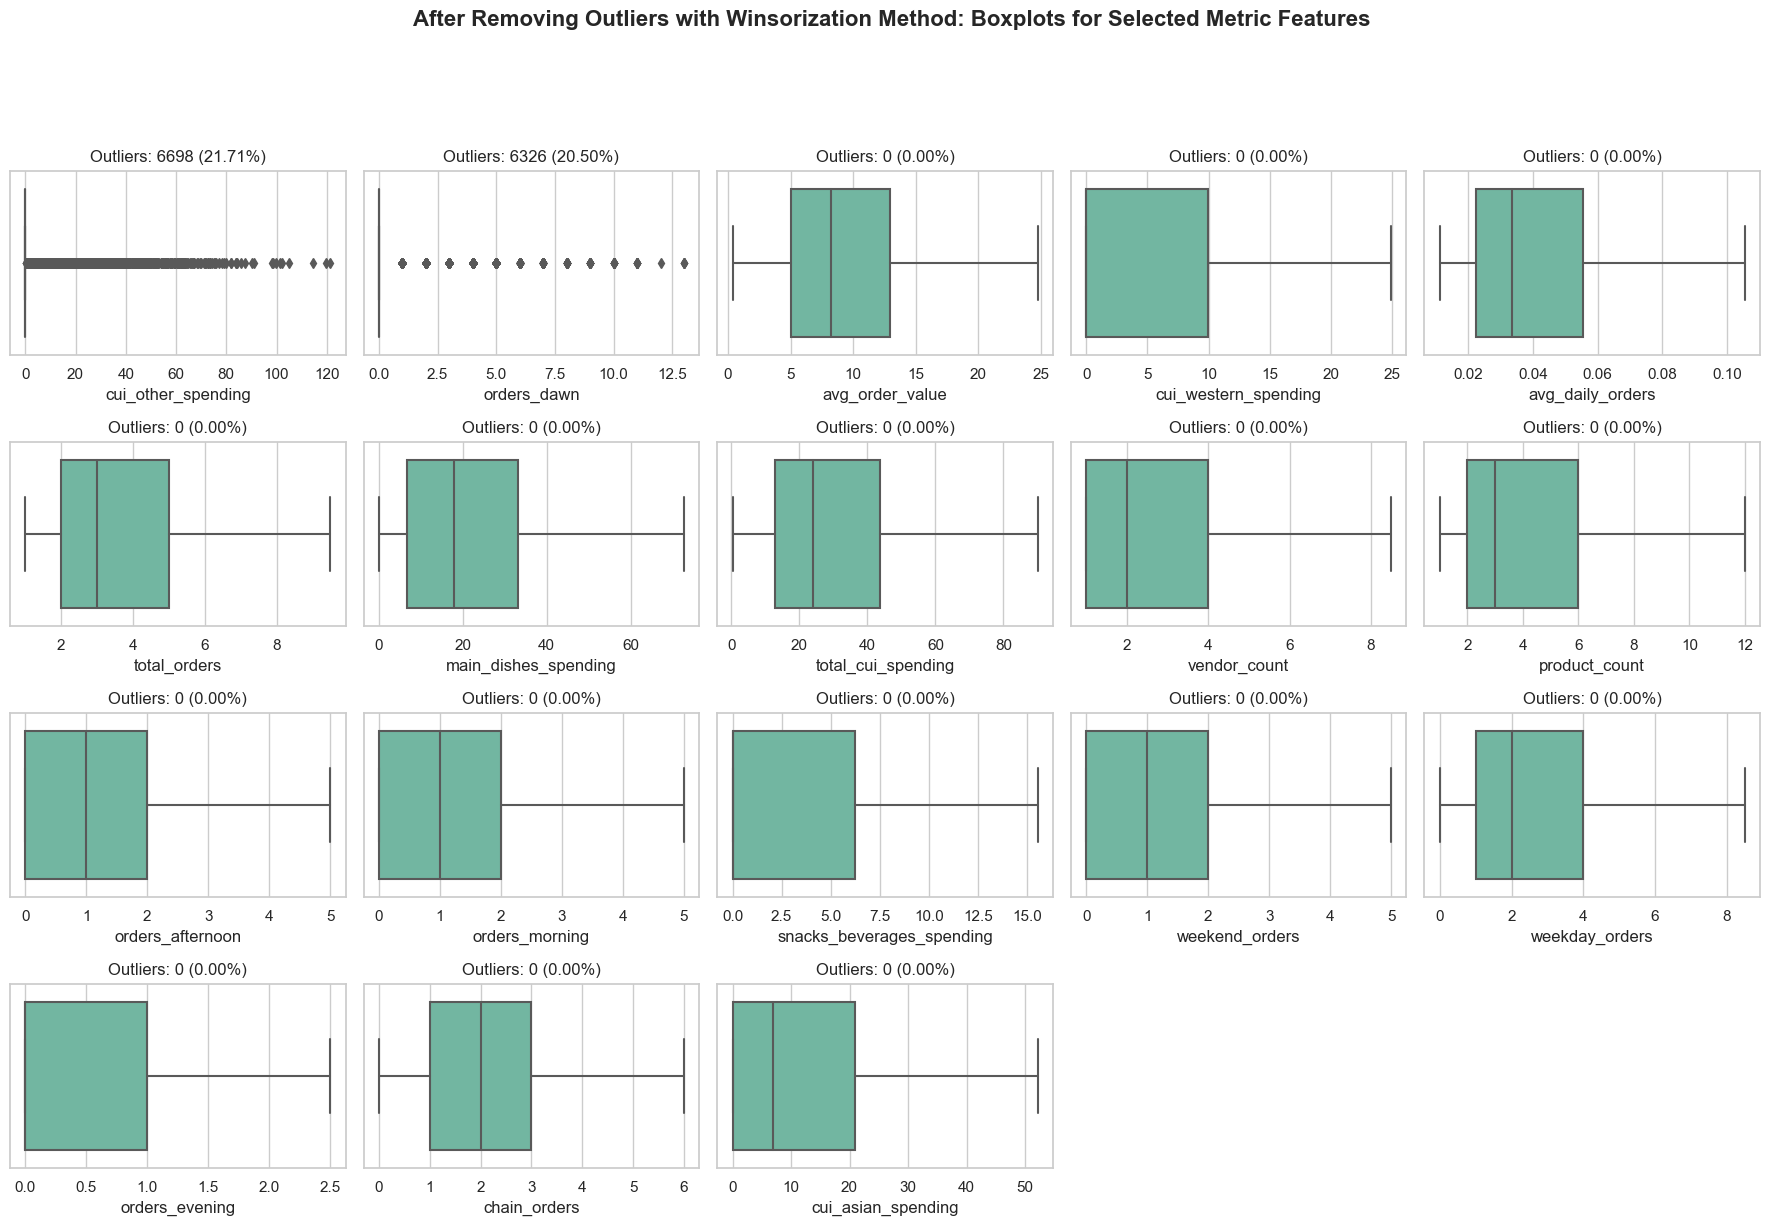

In [344]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=outliers_features, 
    df=df_outliers,
    title="After Removing Outliers with Winsorization Method: Boxplots for Selected Metric Features",
    sort_by="outliers"
)

# 6. Feature Selection <a class="anchor" id="feature_selection"></a>
[Back to ToC](#toc)<br>

Feature selection is a vital step to enhance model performance, reduce complexity, and improve interpretability. Given the diversity of our dataset, which includes categories like demographics, ordering patterns, cuisine preferences, and more, analyzing all features collectively could overlook key relationships or objectives.

To address this, we opted to separate feature selection by category. This approach allows us to:

- **Focus on Category-Specific Insights**: Each category serves distinct goals, such as identifying peak ordering times or refining promotional strategies.
- **Mitigate Redundancy**: Features within the same category often correlate strongly, making it easier to identify the most impactful ones.
- **Simplify Interpretation**: Grouping features by logical categories makes the results more understandable.

This structured method ensures we retain the most relevant features while aligning with the objectives of each category.

In [345]:
#Lets check the dtypes of the columns
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30852 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customer_region            30852 non-null  object  
 1   customer_age               30852 non-null  Int64   
 2   vendor_count               30852 non-null  float64 
 3   product_count              30852 non-null  int64   
 4   chain_orders               30852 non-null  int64   
 5   first_order                30852 non-null  Int64   
 6   last_order                 30852 non-null  int64   
 7   last_promo                 30852 non-null  object  
 8   payment_method             30852 non-null  object  
 9   CUI_American               30852 non-null  float64 
 10  CUI_Asian                  30852 non-null  float64 
 11  CUI_Beverages              30852 non-null  float64 
 12  CUI_Cafe                   30852 non-null  float64 
 13  CUI_Chicken Dishes    

In [346]:
#customer_region is an object type column, we can convert it to int type
df_outliers['customer_region'] = df_outliers['customer_region'].astype(int)

#same with city column
df_outliers['city'] = df_outliers['city'].astype(int)

#Since generation feature is a category, we can use label encoder to convert it to int type
# Define the mapping based on the order of generations
generation_order = {
    "Silent_Generation": 0,
    "Baby_Boomers": 1,
    "Gen_X": 2,
    "Millennials": 3,
    "Gen_Z": 4
}

# Map the generations in the dataframe
df_outliers['generation_encoded'] = df_outliers['generation'].map(generation_order)

#set as integer
df_outliers['generation_encoded'] = df_outliers['generation_encoded'].astype(int)

#set int age also as int
df_outliers['customer_age'] = df_outliers['customer_age'].astype(int)

In [347]:
df_outliers.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'chain_orders', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_cui_spending', 'total_orders', 'generation', 'health_index',
       'weekend_orders', 'weekday_orders', 'orders_dawn', 'orders_morning',
       'orders_afternoon', 'orders_evening', 'order_recency',
       'avg_daily_orders', 'avg_order_value', 'promo_used',
      

In [355]:
dow_columns = [col for col in df_outliers.columns if col.startswith("DOW_")]
hr_columns = [col for col in df_outliers.columns if col.startswith("HR_")]

# Define categories and corresponding features
categories = {
    "Demographics": ["customer_region", "customer_age", "city", "generation_encoded"],
    "Ordering Patterns": dow_columns + hr_columns +
                         ["weekend_orders", "weekday_orders", "orders_dawn", "orders_morning",
                          "orders_afternoon", "orders_evening", "order_recency"],
    "Cuisine Spending": ["total_cui_spending"] + ['cui_asian_spending',
       'cui_western_spending', 'cui_other_spending', 'main_dishes_spending',
       'snacks_beverages_spending', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai'
    ],
    "Purchase Patterns": ["vendor_count", "product_count", "chain_orders",
                          "avg_daily_orders", "avg_order_value",
                          "promo_used", "chain_orders_prop", "first_order", "last_order", "last_promo", "payment_method", "total_orders"]
}

**Demographics** <br>
Demographics data includes features such as customer region, age, and generation. These features help identify customer segments for targeted marketing and regional insights.

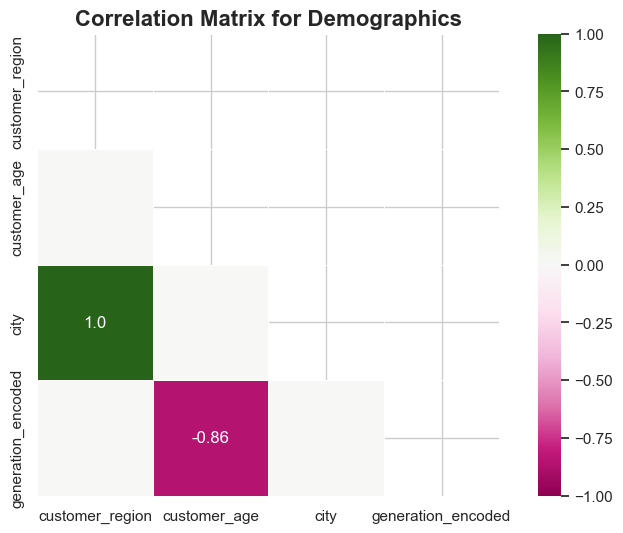

In [349]:
# Filter Demographics features
demographics_features = categories["Demographics"]
demographics_data = df_outliers[demographics_features]

# Compute correlation matrix
demographics_corr = demographics_data.corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    demographics_corr, 
    title="Correlation Matrix for Demographics",
    threshold=0.5, figsize=(10, 6)
)

The correlation plot reveals some relationships between the demographic features. However, these insights alone are insufficient to make a definitive decision about which features to retain. Given this, we will keep these features for now and reevaluate their importance after considering the remaining features. At the end of the process, we will generate a final correlation plot with the reduced set of features, allowing us to determine which variables contribute most effectively to the analysis and remove any redundancies

**Ordering Patterns** <br>
Ordering patterns describe the frequency and timing of orders by day of the week, hour of the day, and time of day. This information helps identify peak ordering times and optimize promotions.

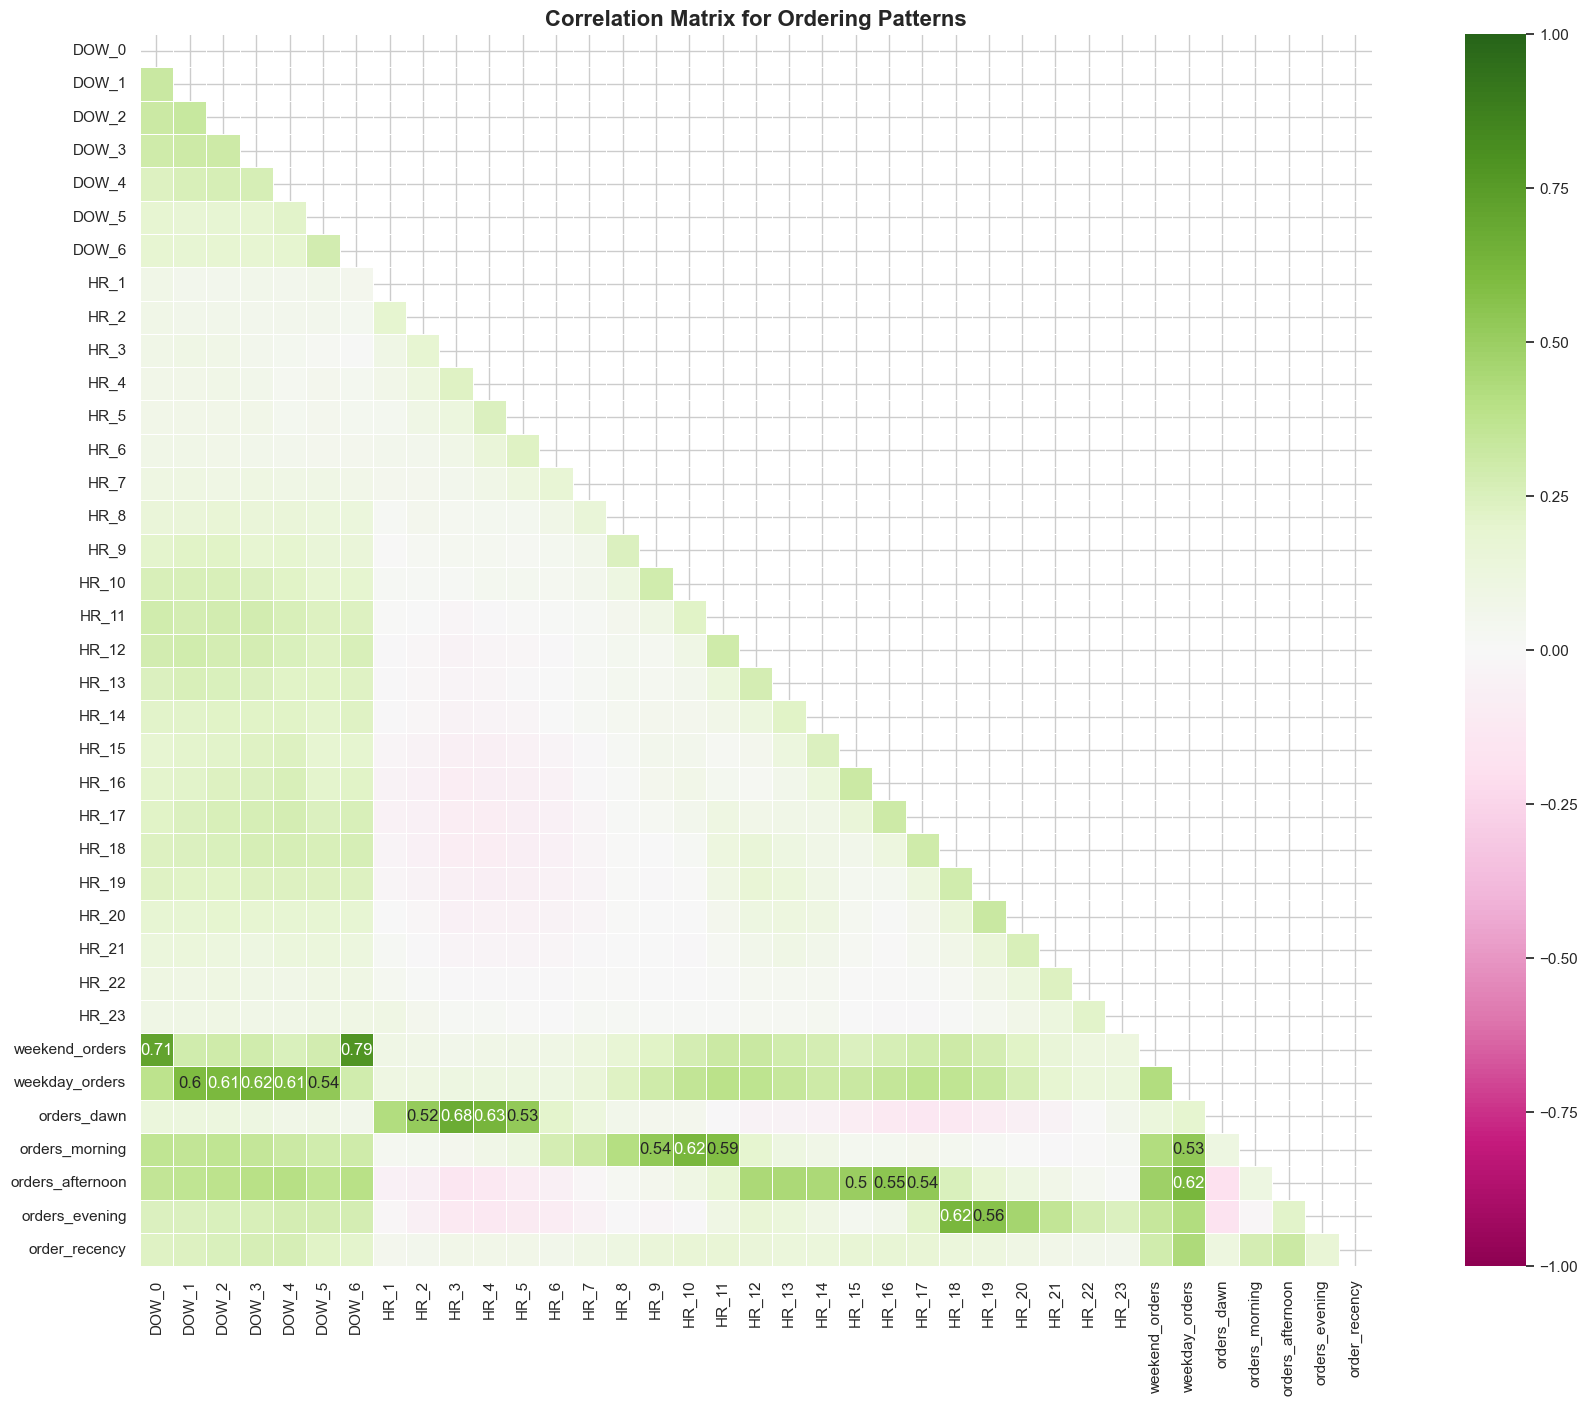

In [350]:
# Filter Ordering Patterns features
ordering_features = categories["Ordering Patterns"]
ordering_data = df_outliers[ordering_features]

# Compute correlation matrix
ordering_corr = ordering_data.corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    ordering_corr, 
    title="Correlation Matrix for Ordering Patterns",
    threshold=0.5
)

This correlation matrix includes `DOW_` (Day of Week) and `HR_` (Hour of Day) features, which provide granular insights into ordering patterns. However, their high dimensionality makes them redundant as the aggregate features (e.g., `weekend_orders`, `weekday_orders`) effectively summarize the same information. To reduce dimensionality and improve interpretability, we will exclude `DOW_` and `HR_` features in subsequent analyses.

In [351]:
# Dropping all columns starting with 'DOW_' and 'HR_' from the DataFrame
df_outliers = df_outliers.drop(
    columns=[col for col in df_new_features.columns if col.startswith("DOW_") or col.startswith("HR_")]
)

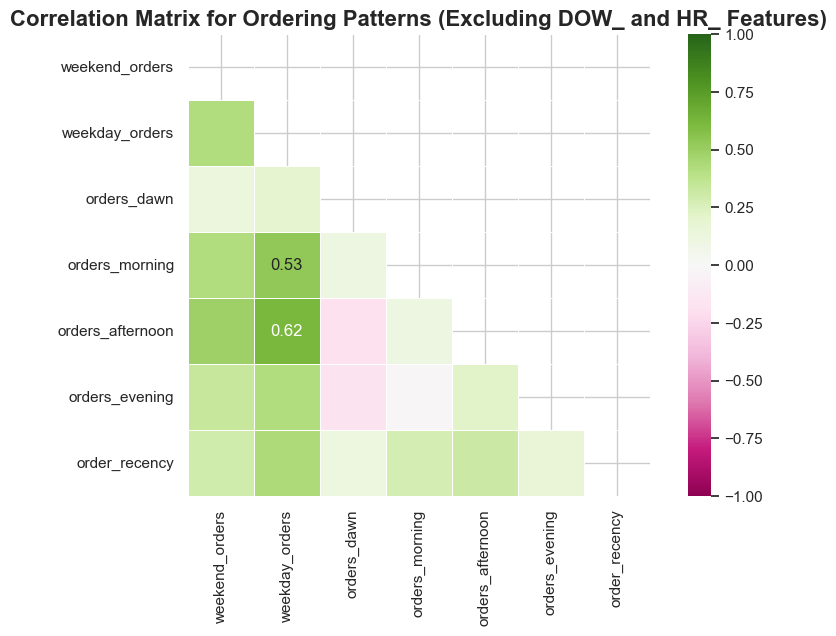

In [352]:
# Exclude DOW_ and HR_ features
ordering_features_reduced = [
    "weekend_orders", "weekday_orders", "orders_dawn", "orders_morning",
    "orders_afternoon", "orders_evening", "order_recency"
]
ordering_data_reduced = df_outliers[ordering_features_reduced]

# Compute correlation matrix without DOW_ and HR_ features
ordering_corr_reduced = ordering_data_reduced.corr(method="pearson").round(3)

# Plot correlation matrix without DOW_ and HR_ features
plot_matrix(
    ordering_corr_reduced, 
    title="Correlation Matrix for Ordering Patterns (Excluding DOW_ and HR_ Features)",
    threshold=0.5, figsize=(10, 6)
)

Given the high correlation between weekend_orders and weekday_orders, we can retain their information by creating a new feature, the ratio of weekend to weekday orders. This ratio will help us understand customer ordering behavior (e.g., preference for weekend vs. weekday orders) while reducing redundancy and dimensionality in the dataset. By keeping this single feature, we maintain interpretability and valuable insights without overloading the model with highly correlated variables.

In [353]:
# Replace 0 in weekday_orders to avoid division by zero
df_outliers['weekday_orders'] = df_outliers['weekday_orders'].replace(0, 1)

# Create the ratio of weekend to weekday orders
df_outliers['weekend_to_weekday_ratio'] = df_outliers['weekend_orders'] / df_outliers['weekday_orders']

# Drop the original weekend_orders and weekday_orders features
df_outliers = df_outliers.drop(columns=['weekend_orders', 'weekday_orders'])

# Verify the changes
df_outliers['weekend_to_weekday_ratio'].value_counts()

0.000000    12282
1.000000     5964
0.500000     2705
2.000000     1685
0.333333     1398
0.250000      840
0.666667      712
0.588235      568
3.000000      417
0.200000      410
0.400000      339
0.166667      305
1.500000      287
0.235294      278
0.352941      254
0.470588      251
0.750000      210
0.117647      195
0.600000      183
0.142857      172
0.285714      157
0.428571      129
0.125000      125
4.000000      113
0.800000      105
1.333333      101
0.375000       99
0.625000       92
0.571429       81
0.714286       80
0.833333       75
1.250000       69
5.000000       62
1.666667       59
2.500000       50
Name: weekend_to_weekday_ratio, dtype: int64

**Cuisine Spending** <br>
Cuisine spending reflects the amount spent on various cuisine types. Analyzing correlations here can reveal spending trends and preferences across different cuisines.

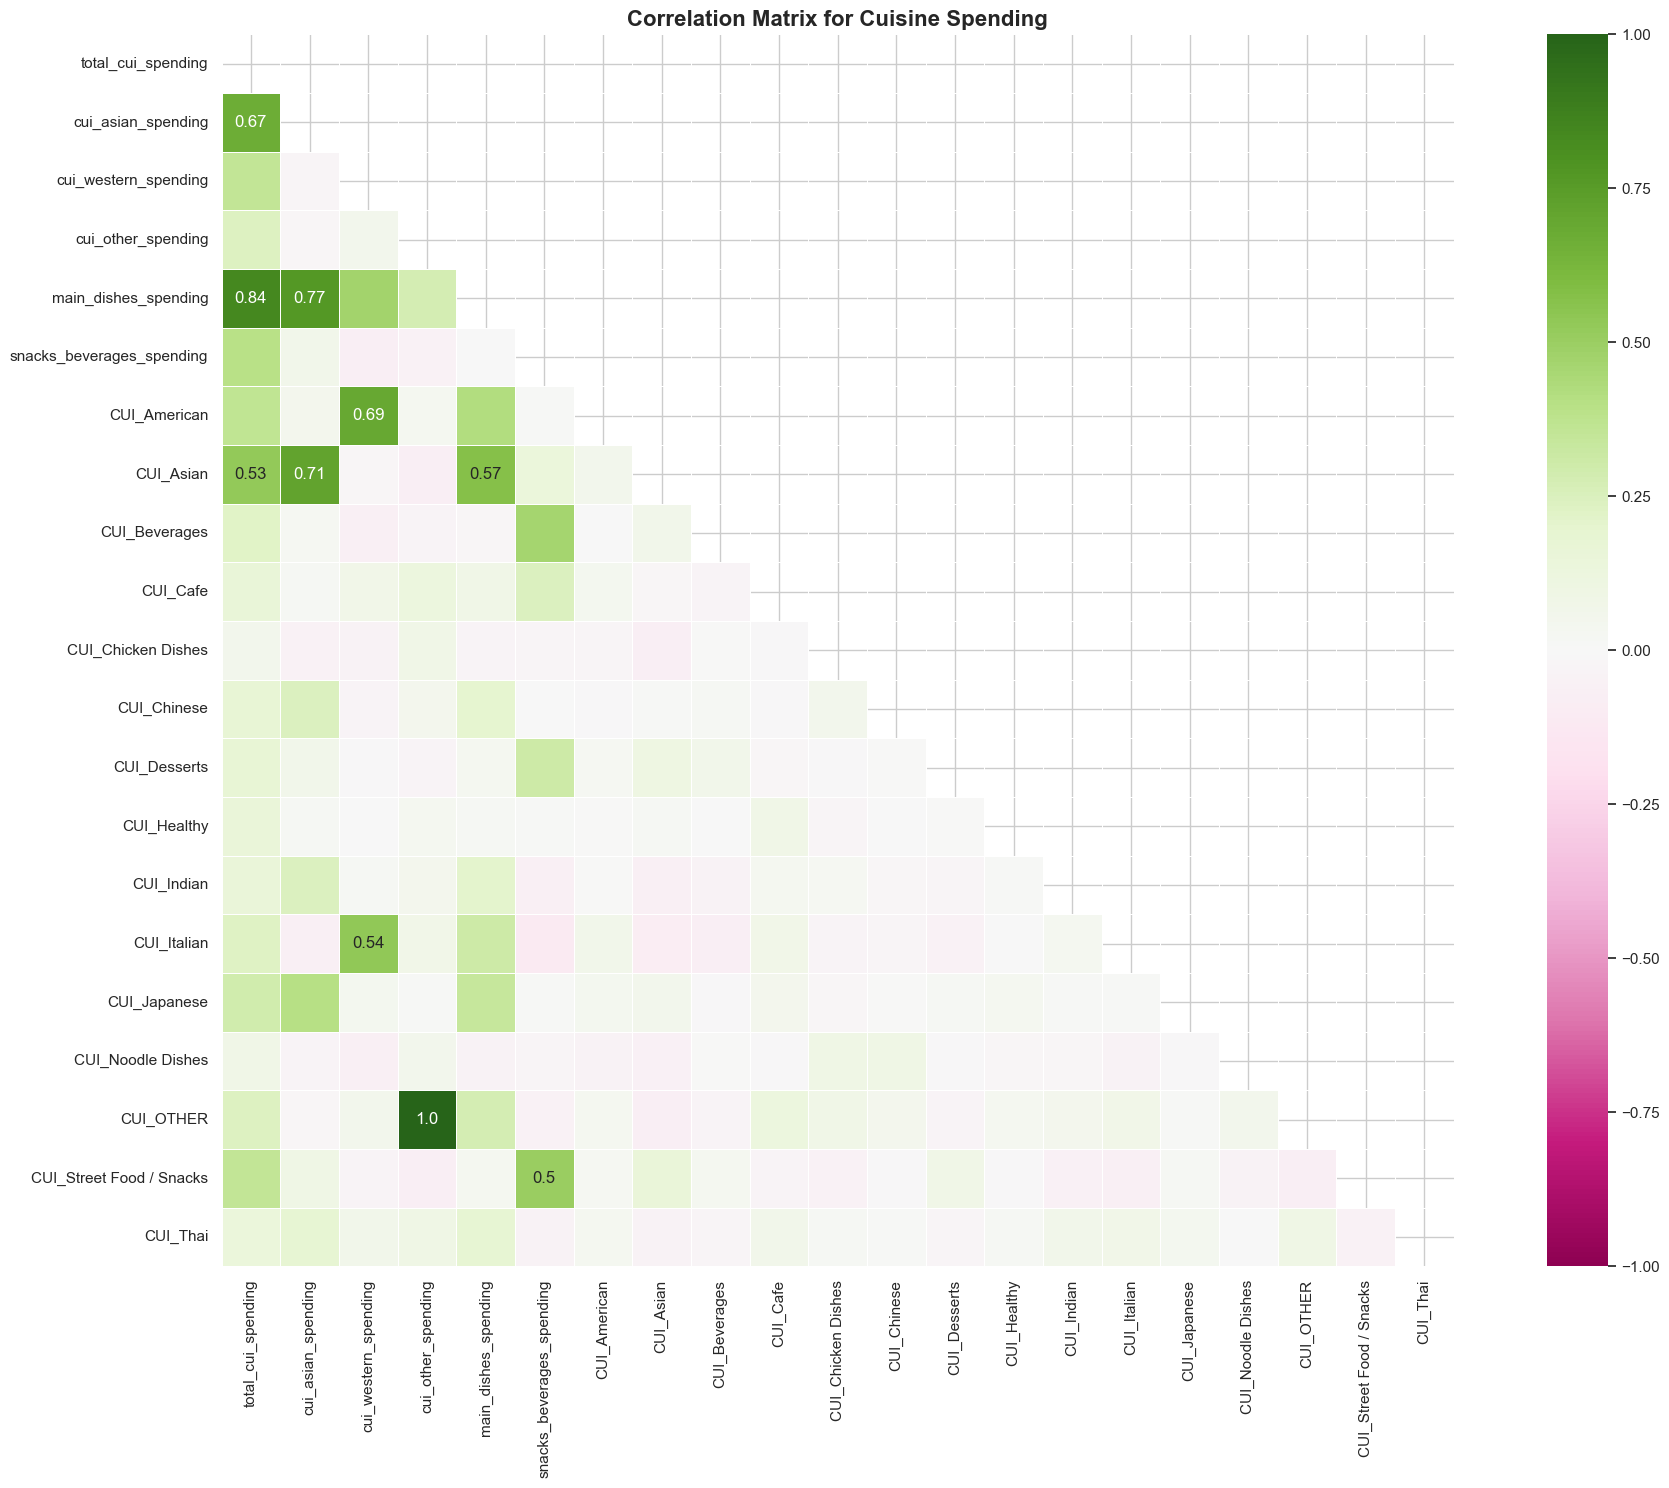

In [356]:
# Filter Cuisine Spending features
cuisine_features = categories["Cuisine Spending"]
cuisine_data = df_outliers[cuisine_features]

# Compute correlation matrix
cuisine_corr = cuisine_data.corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    cuisine_corr, 
    title="Correlation Matrix for Cuisine Spending",
    threshold=0.5
)

After analyzing the correlation matrix, we observe that total_cui_spending has a high correlation with multiple other features, such as Cuisine_Western_Spend, CUI_American, and CUI_Italian. This indicates that total_cui_spending is redundant, as its information is already captured by these individual features.

Additionally, CUI_American and CUI_Italian are also highly correlated with Cuisine_Western_Spend. Since Cuisine_Western_Spend aggregates the spending data for Western cuisines, including American and Italian, it effectively summarizes their information. Therefore, to reduce redundancy and improve dataset clarity, we can remove total_cui_spending, CUI_American, and CUI_Italian while retaining Cuisine_Western_Spend to represent Western cuisine spending.

In [357]:
# Drop the features from the dataframe
df_outliers = df_outliers.drop(columns=["total_cui_spending", "CUI_American", "CUI_Italian", "cui_asian_spending", 'CUI_OTHER'])

**Purchase Patterns** <br>
The Purchase Patterns category captures a detailed view of customer purchasing behavior, including the frequency, value, and characteristics of their orders, as well as the timing of their purchases. This category provides insights into what customers buy, how often, and when.

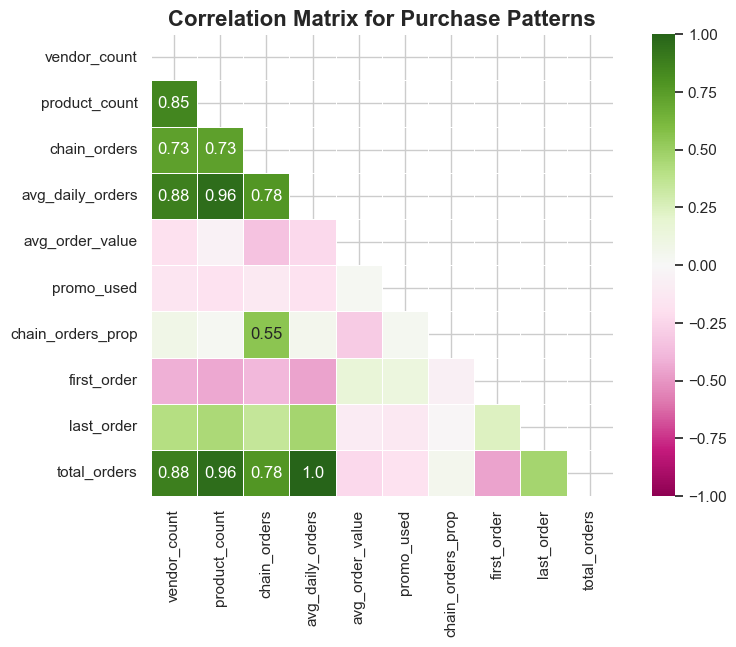

In [358]:
# Filter Purchase Behavior features
purchase_features = categories["Purchase Patterns"]
purchase_data = df_outliers[purchase_features]

# Compute correlation matrix
purchase_corr = purchase_data.corr(method = "pearson").round(3)

# Plot correlation matrix
plot_matrix(
    purchase_corr, 
    title="Correlation Matrix for Purchase Patterns",
    threshold=0.5, figsize=(10, 6)
)

Observations revealed that `vendor_count`, `product_count`, and `total_orders` are highly correlated with `avg_daily_orders`, indicating redundancy. To simplify the dataset and reduce multicollinearity, these features will be dropped. `Avg_daily_orders` effectively captures the variance of these variables, ensuring no significant loss of information while improving dataset efficiency and interpretability.

In [359]:
# Drop the features from the dataframe
df_outliers = df_outliers.drop(columns=["vendor_count", "product_count", "total_orders",'chain_orders'])

Next, we will plot the correlation matrix for the remaining features to evaluate whether any high correlations persist, allowing us to identify and address potential redundancies in the dataset.

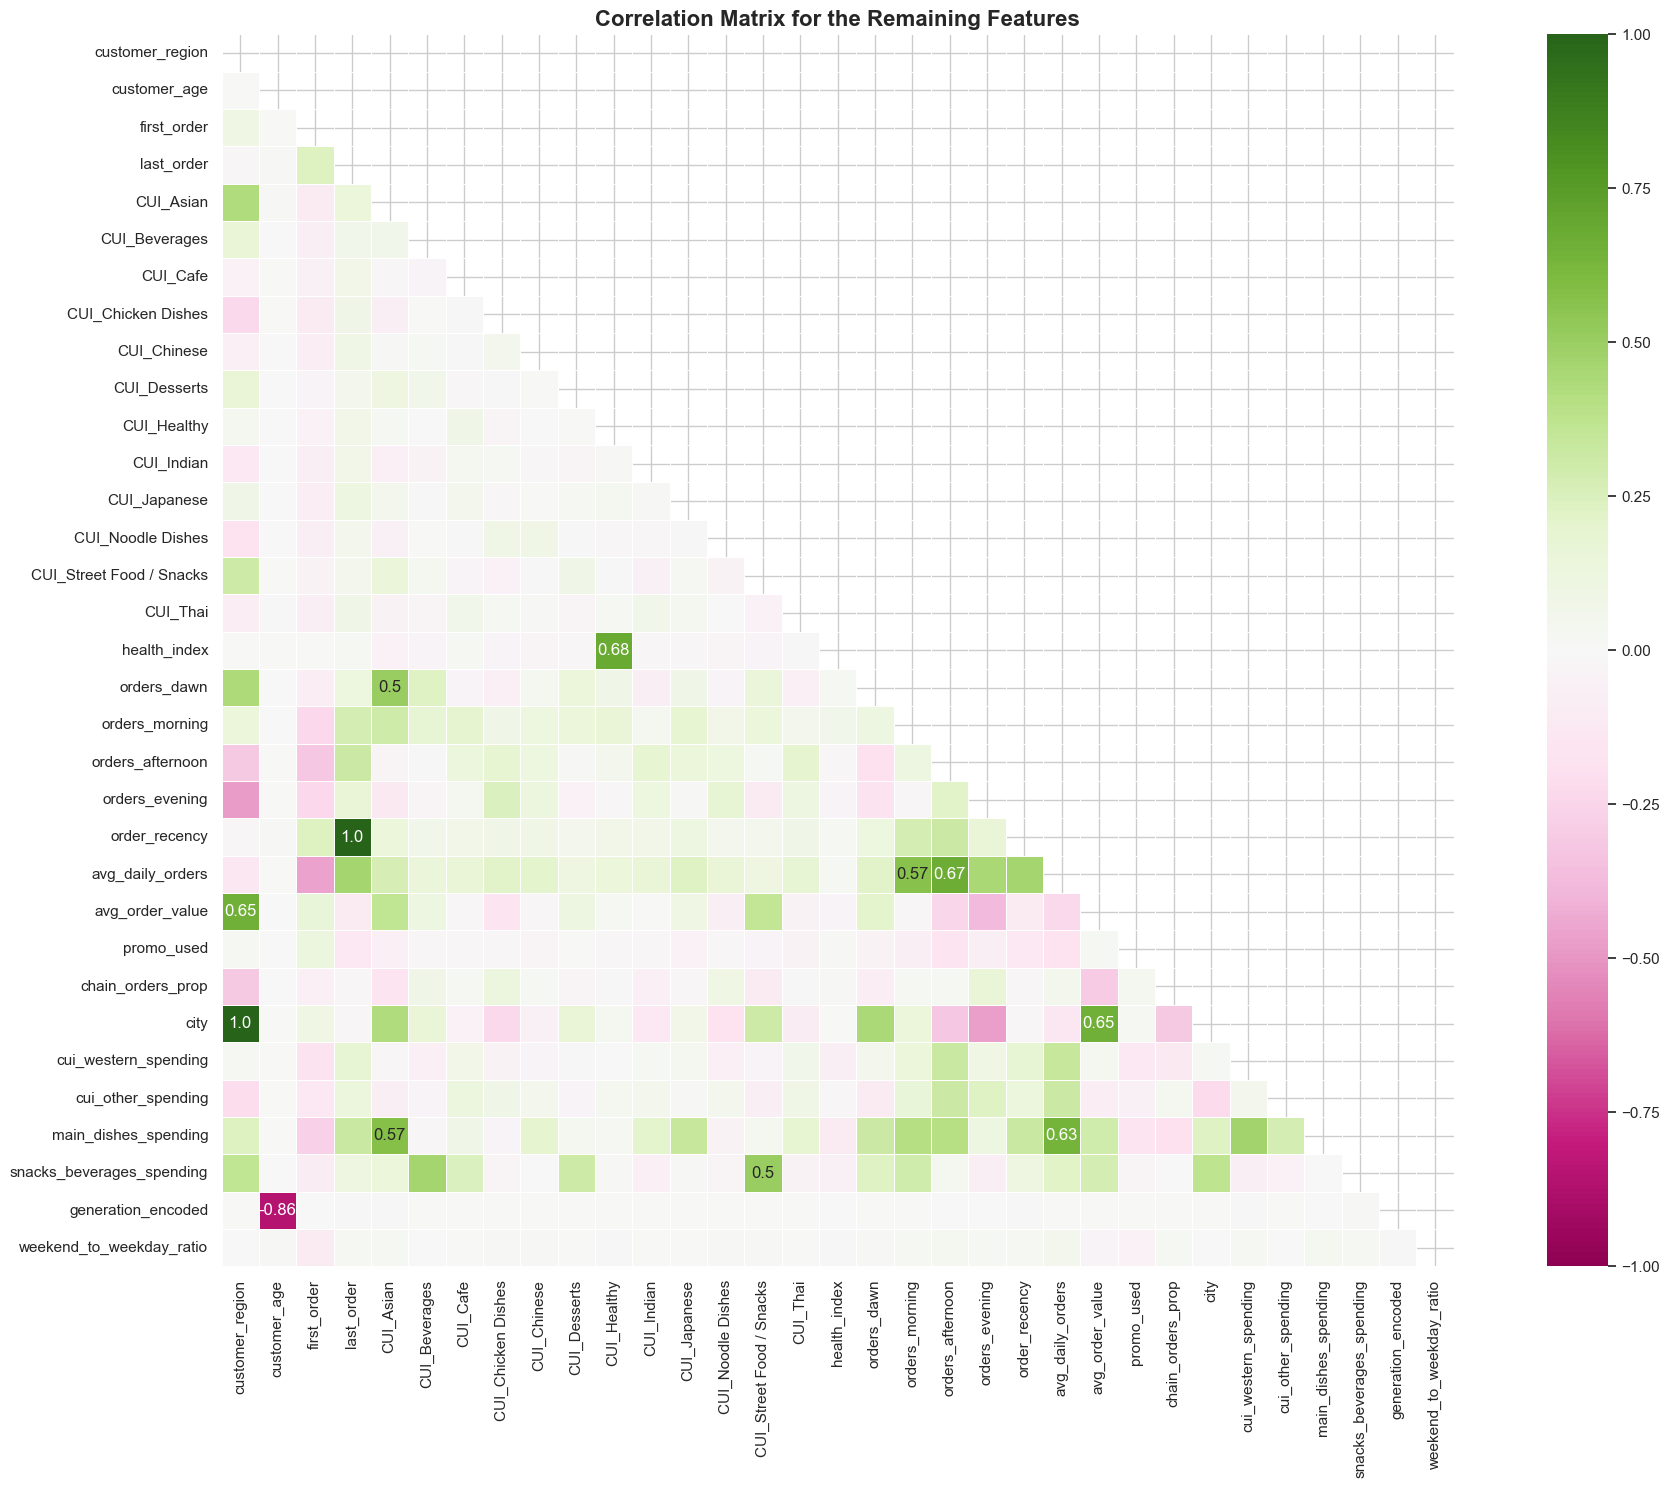

In [360]:
# Compute correlation matrix
df_new_corr = df_outliers.corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    df_new_corr, 
    title="Correlation Matrix for the Remaining Features",
    threshold=0.5
)

### Final Conclusions Based on the Correlation Matrix 

1. **`customer_region` vs. `city`:**
   - These two features exhibit a perfect correlation (`r = 1.0`). To reduce redundancy, **`city`** will be removed while retaining **`customer_region`**, which is more interpretable for analysis.

2. **`generation_encoded` vs. `customer_age`:**
   - The strong negative correlation (`r = -0.86`) between these features indicates that both provide similar information. **`generation_encoded`** will be dropped, as **`customer_age`** is a more direct numerical measure and easier to interpret.

3. **Time-of-Day Features:**
   - Features like **`orders_morning`**, **`orders_afternoon`**, and **`order_recency`** show overlapping conceptual information with other aggregate time-based features but contribute less distinct value. To simplify the dataset, these will be removed.

4. **Cuisine-Specific Spending Features:**
   - Features such as **`CUI_Beverages`**, **`CUI_Cafe`**, **`CUI_Desserts`**, **`CUI_Street Food / Snacks`**, **`CUI_Chicken Dishes`**, and **`CUI_Noodle Dishes`** are highly correlated with broader aggregate features like **`Snacks_Beverages_Spend`** and **`Main_Dishes_Spend`**. These granular features will be dropped as they are redundant.

By removing redundant and low-value features, we streamline the dataset without sacrificing critical information. The retained features strike a balance between interpretability and completeness, ensuring the dataset is compact yet insightful for further analysis. 

Features like **`customer_region`**, **`customer_age`**, and aggregate spending categories capture the key patterns while eliminating noise from overly granular or repetitive variables. This approach reduces dimensionality, improves computational efficiency, and maintains the dataset's relevance for clustering or modeling tasks.

In [362]:
df_outliers.columns

Index(['customer_region', 'customer_age', 'first_order', 'last_order',
       'last_promo', 'payment_method', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'generation', 'health_index',
       'orders_dawn', 'orders_morning', 'orders_afternoon', 'orders_evening',
       'order_recency', 'avg_daily_orders', 'avg_order_value', 'promo_used',
       'chain_orders_prop', 'city', 'cui_western_spending',
       'cui_other_spending', 'main_dishes_spending',
       'snacks_beverages_spending', 'generation_encoded',
       'weekend_to_weekday_ratio'],
      dtype='object')

In [ ]:
# Features to drop based on revised correlation matrix analysis
features_to_drop = [
    "city", "generation_encoded","last_order",
     "CUI_Street Food / Snacks",
    "avg_daily_orders", "CUI_Asian", "CUI_Healthy"
]

# Drop features from the dataset
df_outliers = df_outliers.drop(columns=features_to_drop)

In [367]:
df_outliers.shape

(30852, 29)


# 7. Data Normalization <a class="anchor" id="data-normalization"></a>
[Back to ToC](#toc)<br>


* use standard scaler to normalize our columns 

__Which features do we normalize:__

* Customer Age
* Cuisine columns?
* 

health_index
count  31236.000000
mean       0.025054
std        0.122810
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

health_index
0.000000        29104
1.000000          253
0.343750            2
0.312500            2
0.005990            1
                ...  
0.138549            1
0.138388            1
0.138311            1
0.138218            1
0.216954            1
Name: count, Length: 1879, dtype: int64

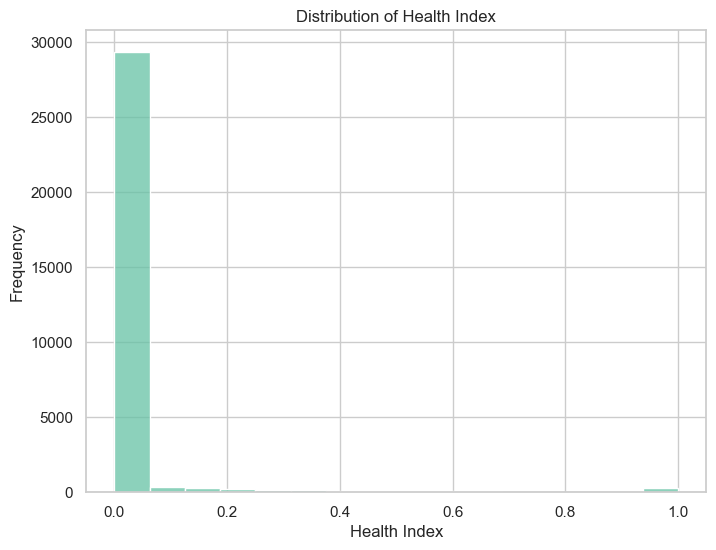

In [ ]:
display(df_outliers[['health_index']].describe())
display(df_outliers[['health_index']].value_counts())

# create me a histogram for the health index
plt.figure(figsize=(8, 6))
sns.histplot(df_outliers['health_index'])
plt.title("Distribution of Health Index")
plt.xlabel("Health Index")
plt.ylabel("Frequency")
plt.show()

__distribution of CUI columns:__
> * open for discussion 

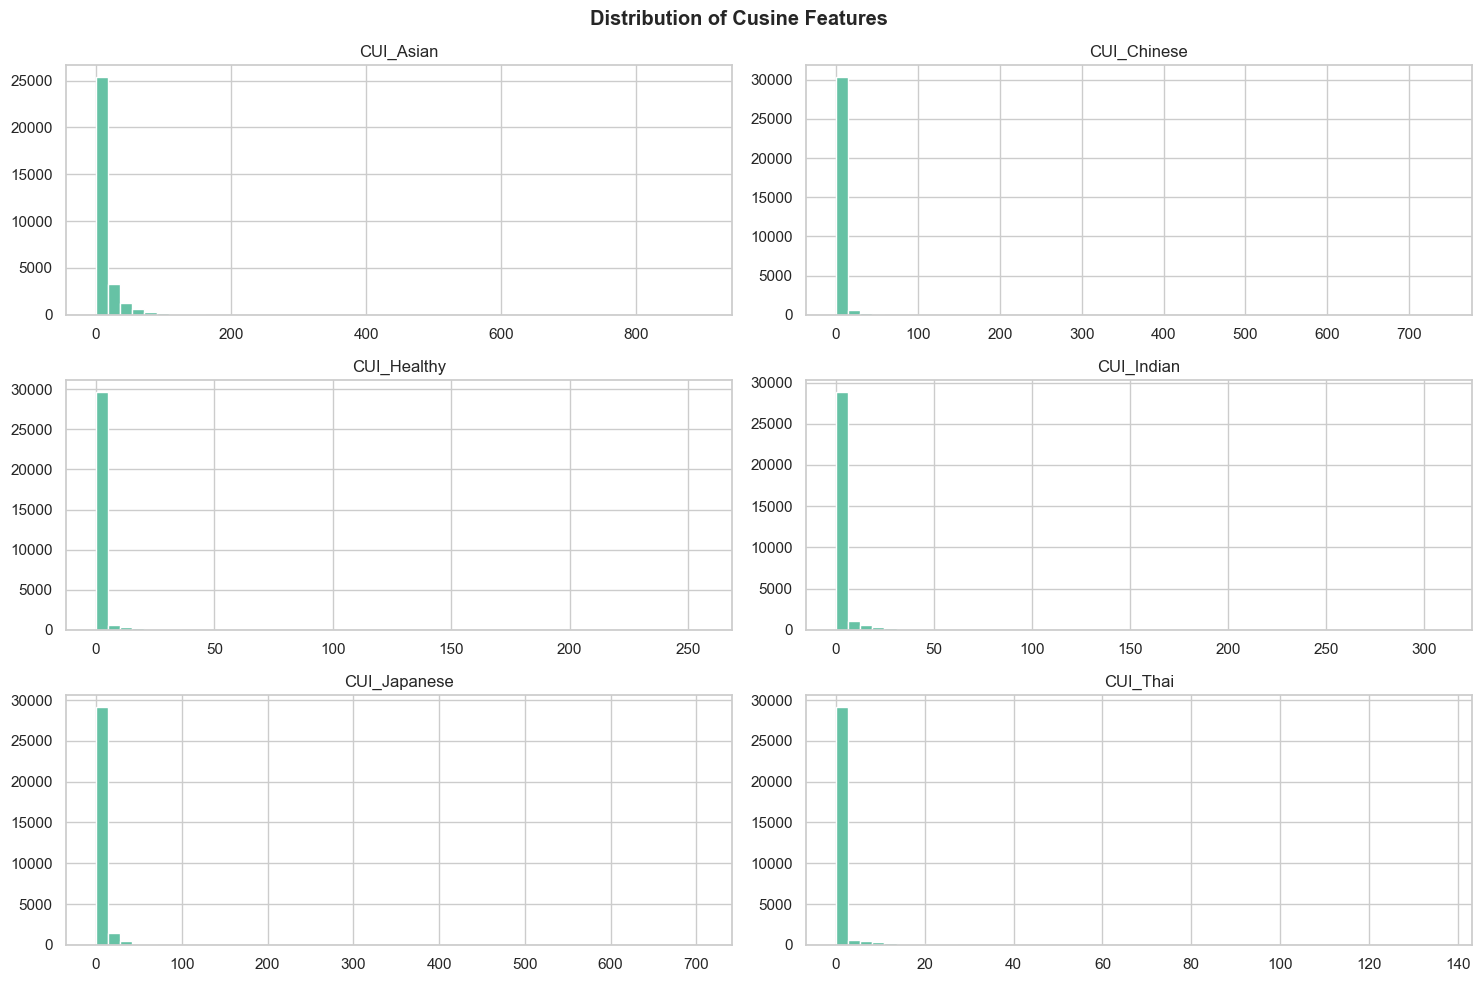

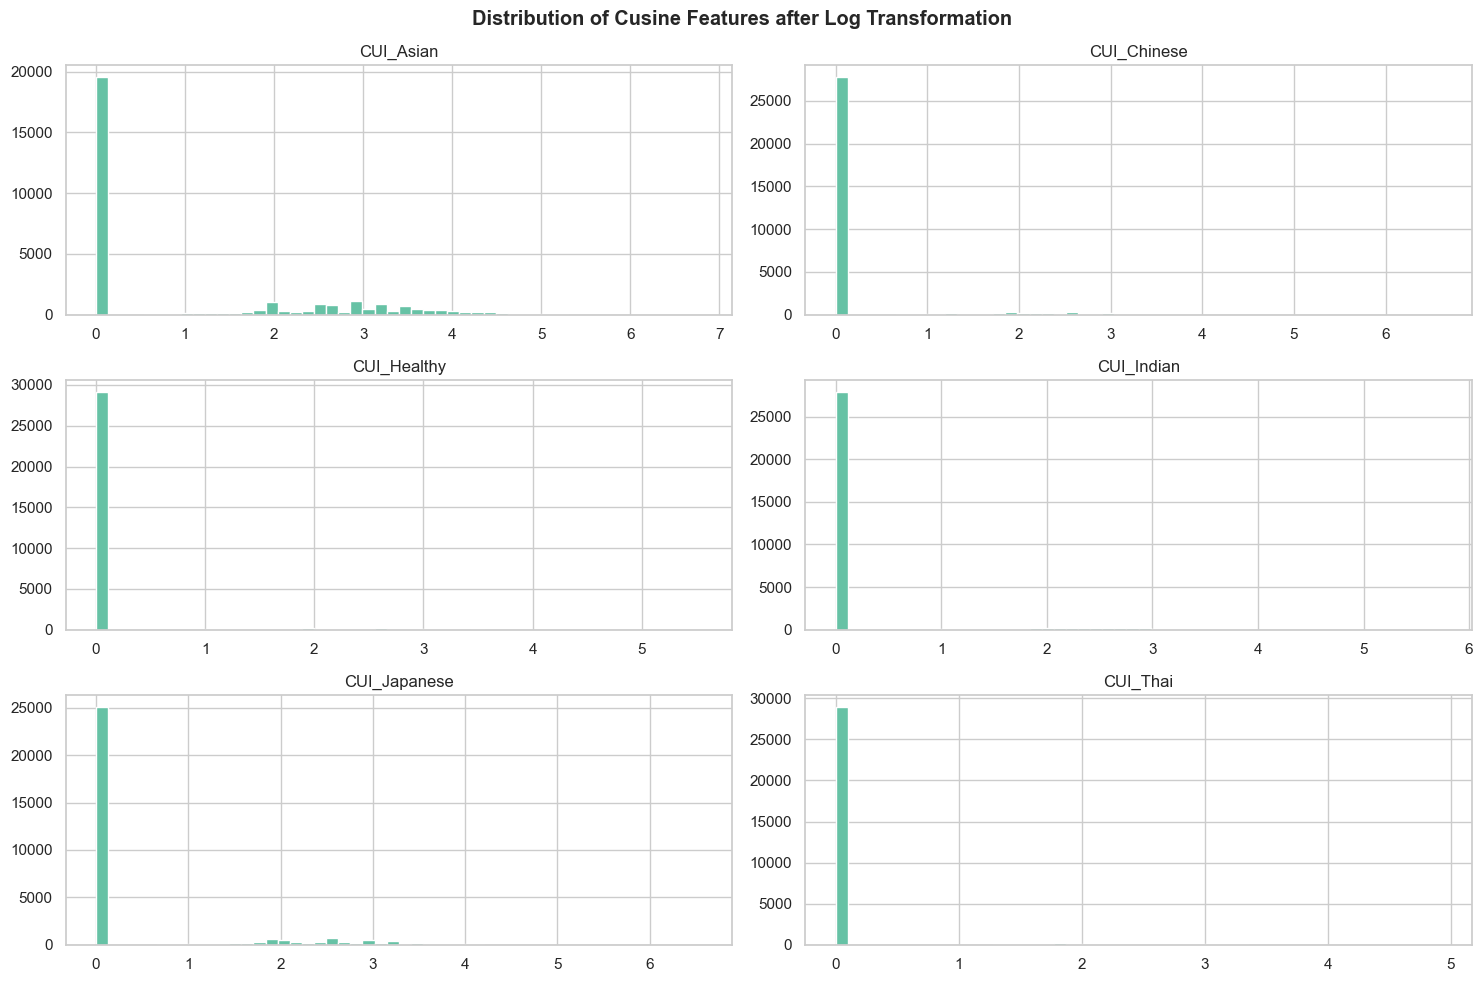

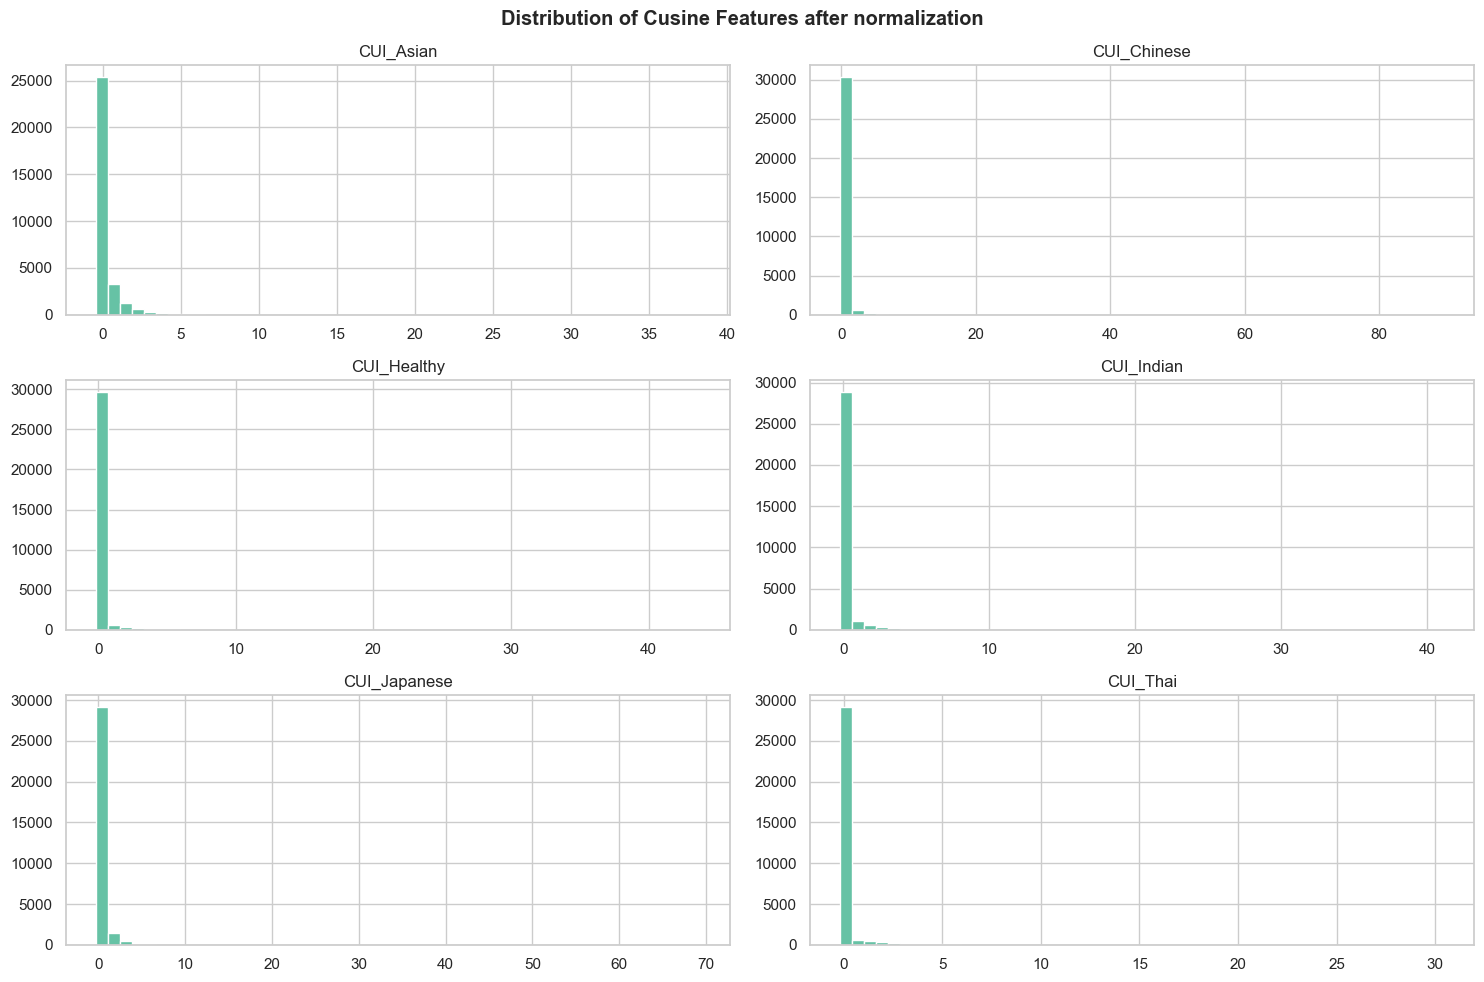

CUI_Asian  CUI_Chinese  CUI_Healthy  CUI_Indian  CUI_Japanese  \
customer_id                                                                  
1b8f824d5e   -0.426437    -0.173901    -0.163201    3.648422     -0.294926   
f6d1b2ba63   -0.426437    -0.173901    -0.163201   -0.218861     -0.294926   
180c632ed8    0.164357    -0.173901    -0.163201    2.172748     -0.294926   
4eb37a6705    1.336025    -0.173901    -0.163201   -0.218861     -0.294926   
6aef2b6726    0.648204    -0.173901    -0.163201   -0.218861     -0.294926   
...                ...          ...          ...         ...           ...   
f4e366c281   -0.426437    -0.173901    -0.163201   -0.218861     -0.294926   
f6b6709018   -0.426437    -0.173901    -0.163201   -0.218861     -0.294926   
f74ad8ce3f   -0.426437    -0.173901    -0.163201   -0.218861     -0.294926   
f7b19c0241    0.092340    -0.173901    -0.163201   -0.218861     -0.294926   
fd40d3b0e0   -0.426437    -0.173901    -0.163201   -0.218861     -0.294926   

             CUI_Thai  
customer_id            
1b8f824d5e  -0.189984  
f6d1b2ba63  -0.189984  
180c632ed8  -0.189984  
4eb37a6705  -0.189984  
6aef2b6726  -0.189984  
...               ...  
f4e366c281  -0.189984  
f6b6709018  -0.189984  
f74ad8ce3f  -0.189984  
f7b19c0241  -0.189984  
fd40d3b0e0  -0.189984  

[31236 rows x 6 columns]

In [ ]:
df_outliers[df_outliers.filter(like="CUI_").columns] 

# plot the distribution of each cusine feature
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
df_new_features[df_new_features.filter(like="CUI_").columns].hist(bins=50, ax = ax)

plt.suptitle("Distribution of Cusine Features ", fontweight='bold')
plt.tight_layout()
plt.show()


df_cui = df_new_features[df_new_features.filter(like="CUI_").columns].copy()

# apply log transformation on df_cui 
df_cui = np.log1p(df_cui)

# plot the distribution of each cusine feature after log transformation
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
df_cui.hist(bins=50, figsize=(15, 10), ax = ax)
plt.suptitle("Distribution of Cusine Features after Log Transformation", fontweight='bold')
plt.tight_layout()

plt.show()

# scale the dataframe 
df_cui_normalized = scaled_dataframe(df_new_features.filter(like="CUI_").columns,df_new_features[df_new_features.filter(like="CUI_").columns])

# plot the distribution of each cusine feature after log transformation and scaling
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
df_cui_normalized.hist(bins=50, figsize=(15, 10), ax = ax )
plt.suptitle("Distribution of Cusine Features after normalization", fontweight='bold')
plt.tight_layout()
plt.show()

df_cui_normalized


In [ ]:
df_new_features.head().T

# customer age
# first_order
# last_order
# CUIsine spending
# 

customer_id              1b8f824d5e   f6d1b2ba63   180c632ed8 4eb37a6705  \
customer_region                2360         4660         4660       4660   
customer_age                     18           38           26         20   
chain_orders                      1            2            1          0   
first_order                       0            0            0          0   
last_order                        1            1            2          2   
last_promo                 DELIVERY     DISCOUNT     DELIVERY    NOPROMO   
payment_method                 DIGI         CASH         DIGI       DIGI   
CUI_Asian                       0.0          0.0         13.7      40.87   
CUI_Chinese                     0.0          0.0          0.0        0.0   
CUI_Healthy                     0.0          0.0          0.0        0.0   
CUI_Indian                    28.88          0.0        17.86        0.0   
CUI_Japanese                    0.0          0.0          0.0        0.0   
CUI_Thai                        0.0          0.0          0.0        0.0   
generation                    Gen_Z  Millennials  Millennials      Gen_Z   
health_index                    0.0          0.0          0.0        0.0   
orders_dawn                       0            0            0          0   
orders_evening                    2            0            0          0   
avg_daily_orders           0.022222     0.022222     0.022222   0.022222   
avg_order_value               14.44          4.6        15.78      27.72   
promo_used                        1            1            1          0   
chain_orders_prop               0.5          1.0          0.5        0.0   
Cuisine_Western_Spend           0.0          9.2          0.0      14.57   
Cuisine_Other_Spend             0.0          0.0          0.0        0.0   
Main_Dishes_Spend             28.88          9.2        31.56      55.44   
Snacks_Beverages_Spend          0.0          0.0          0.0        0.0   
weekend_to_weekday_ratio        2.0          2.0          1.0        1.0   

customer_id                6aef2b6726  
customer_region                  8670  
customer_age                       40  
chain_orders                        0  
first_order                         0  
last_order                          2  
last_promo                    FREEBIE  
payment_method                   DIGI  
CUI_Asian                       24.92  
CUI_Chinese                       0.0  
CUI_Healthy                       0.0  
CUI_Indian                        0.0  
CUI_Japanese                      0.0  
CUI_Thai                          0.0  
generation                Millennials  
health_index                      0.0  
orders_dawn                         2  
orders_evening                      0  
avg_daily_orders             0.022222  
avg_order_value                 12.46  
promo_used                          1  
chain_orders_prop                 0.0  
Cuisine_Western_Spend             0.0  
Cuisine_Other_Spend               0.0  
Main_Dishes_Spend               24.92  
Snacks_Beverages_Spend            0.0  
weekend_to_weekday_ratio          1.0

In [ ]:
# still need to discuss which columns we scale or use as input
col_to_scale = [
       # 'customer_age', # should we include age here? 
       # 'chain_orders', # we are already using chain_orders_prop here 
       'first_order',
       'last_order',
       'CUI_Asian', 'CUI_Chinese', 'CUI_Healthy', 'CUI_Indian', 'CUI_Japanese', 'CUI_Thai',  # cuisine spending is almost all 0 and therefore right skewed
       

       'health_index', # really right skewed
       'orders_dawn', 
       'orders_evening',
       'avg_daily_orders',
       
       'avg_order_value',
       # 'promo_used', # categorical variable so dont include 
       'chain_orders_prop', # already contains values between 0 and 1?
       'Cuisine_Western_Spend',
       'Cuisine_Other_Spend',
       'Main_Dishes_Spend',
       'Snacks_Beverages_Spend',
       'weekend_to_weekday_ratio'] # this is between 0 and 1 should we scale it?



display(df_new_features[col_to_scale].describe())
# scaled dataframe can be found in the main.py file which contains several functions 
df_normalized = scaled_dataframe(col_to_scale, df_new_features)

display(df_normalized.head().T)
display(df_normalized.describe().T)

first_order    last_order     CUI_Asian   CUI_Chinese   CUI_Healthy  \
count      31236.0  31236.000000  31236.000000  31236.000000  31236.000000   
mean      28.31198     63.738923      9.888707      1.432795      0.951606   
std      24.087284     23.171953     23.189522      8.239292      5.830963   
min            0.0      0.000000      0.000000      0.000000      0.000000   
25%            7.0     49.000000      0.000000      0.000000      0.000000   
50%           22.0     70.000000      0.000000      0.000000      0.000000   
75%           44.0     83.000000     11.850000      0.000000      0.000000   
max           90.0     90.000000    896.710000    739.730000    255.810000   

         CUI_Indian  CUI_Japanese      CUI_Thai  health_index   orders_dawn  \
count  31236.000000  31236.000000  31236.000000  31236.000000  31236.000000   
mean       1.634404      2.993627      0.845783      0.025054      0.415098   
std        7.467896     10.150614      4.451949      0.122810      1.143909   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      309.070000    706.140000    136.380000      1.000000     25.000000   

       orders_evening  avg_daily_orders  avg_order_value  chain_orders_prop  \
count    31236.000000      31236.000000     31236.000000       31236.000000   
mean         0.890127          0.048499        10.305859           0.627443   
std          1.905826          0.055704         7.858711           0.386894   
min          0.000000          0.011111         0.370000           0.000000   
25%          0.000000          0.022222         5.067292           0.333333   
50%          0.000000          0.033333         8.215778           0.720000   
75%          1.000000          0.055556        12.927857           1.000000   
max         52.000000          1.044444       104.320000           1.000000   

       Cuisine_Western_Spend  Cuisine_Other_Spend  Main_Dishes_Spend  \
count           31236.000000         31236.000000       31236.000000   
mean                8.145986             3.012866          27.954168   
std                16.965211             9.811331          36.958574   
min                 0.000000             0.000000           0.000000   
25%                 0.000000             0.000000           6.907500   
50%                 0.000000             0.000000          18.000000   
75%                10.380000             0.000000          34.772500   
max               468.330000           366.080000        1151.930000   

       Snacks_Beverages_Spend  weekend_to_weekday_ratio  
count            31236.000000              31236.000000  
mean                 7.873731                  0.530226  
std                 20.183784                  0.696443  
min                  0.000000                  0.000000  
25%                  0.000000                  0.000000  
50%                  0.000000                  0.333333  
75%                  6.340000                  1.000000  
max                519.700000                 10.000000

customer_id              1b8f824d5e   f6d1b2ba63   180c632ed8 4eb37a6705  \
customer_region                2360         4660         4660       4660   
customer_age                     18           38           26         20   
chain_orders                      1            2            1          0   
first_order                -1.17541     -1.17541     -1.17541   -1.17541   
last_order                -2.707581    -2.707581    -2.664424  -2.664424   
last_promo                 DELIVERY     DISCOUNT     DELIVERY    NOPROMO   
payment_method                 DIGI         CASH         DIGI       DIGI   
CUI_Asian                 -0.426437    -0.426437     0.164357   1.336025   
CUI_Chinese               -0.173901    -0.173901    -0.173901  -0.173901   
CUI_Healthy               -0.163201    -0.163201    -0.163201  -0.163201   
CUI_Indian                 3.648422    -0.218861     2.172748  -0.218861   
CUI_Japanese              -0.294926    -0.294926    -0.294926  -0.294926   
CUI_Thai                  -0.189984    -0.189984    -0.189984  -0.189984   
generation                    Gen_Z  Millennials  Millennials      Gen_Z   
health_index              -0.204006    -0.204006    -0.204006  -0.204006   
orders_dawn               -0.362883    -0.362883    -0.362883  -0.362883   
orders_evening             0.582367    -0.467063    -0.467063  -0.467063   
avg_daily_orders          -0.471731    -0.471731    -0.471731  -0.471731   
avg_order_value            0.526067    -0.726067     0.696581   2.215939   
promo_used                        1            1            1          0   
chain_orders_prop         -0.329404     0.962959    -0.329404  -1.621768   
Cuisine_Western_Spend     -0.480166     0.062129    -0.480166   0.378664   
Cuisine_Other_Spend       -0.307085    -0.307085    -0.307085  -0.307085   
Main_Dishes_Spend          0.025051    -0.507446     0.097566   0.743705   
Snacks_Beverages_Spend    -0.390108    -0.390108    -0.390108  -0.390108   
weekend_to_weekday_ratio   2.110433     2.110433     0.674544   0.674544   

customer_id                6aef2b6726  
customer_region                  8670  
customer_age                       40  
chain_orders                        0  
first_order                  -1.17541  
last_order                  -2.664424  
last_promo                    FREEBIE  
payment_method                   DIGI  
CUI_Asian                    0.648204  
CUI_Chinese                 -0.173901  
CUI_Healthy                 -0.163201  
CUI_Indian                  -0.218861  
CUI_Japanese                -0.294926  
CUI_Thai                    -0.189984  
generation                Millennials  
health_index                -0.204006  
orders_dawn                  1.385537  
orders_evening              -0.467063  
avg_daily_orders            -0.471731  
avg_order_value              0.274113  
promo_used                          1  
chain_orders_prop           -1.621768  
Cuisine_Western_Spend       -0.480166  
Cuisine_Other_Spend         -0.307085  
Main_Dishes_Spend           -0.082098  
Snacks_Beverages_Spend      -0.390108  
weekend_to_weekday_ratio     0.674544

count          mean          std          min  \
customer_region           31236.0  5.201472e+03  2607.558774  2360.000000   
customer_age              31236.0  2.759793e+01     7.027626    18.000000   
chain_orders              31236.0  2.814701e+00     3.913281     0.000000   
first_order               31236.0  5.823375e-17     1.000016    -1.175410   
last_order                31236.0  1.455844e-16     1.000016    -2.750737   
CUI_Asian                 31236.0 -3.639609e-18     1.000016    -0.426437   
CUI_Chinese               31236.0  3.275648e-17     1.000016    -0.173901   
CUI_Healthy               31236.0  3.275648e-17     1.000016    -0.163201   
CUI_Indian                31236.0 -4.003570e-17     1.000016    -0.218861   
CUI_Japanese              31236.0 -4.367531e-17     1.000016    -0.294926   
CUI_Thai                  31236.0  4.003570e-17     1.000016    -0.189984   
health_index              31236.0  6.437559e-17     1.000016    -0.204006   
orders_dawn               31236.0 -3.275648e-17     1.000016    -0.362883   
orders_evening            31236.0  0.000000e+00     1.000016    -0.467063   
avg_daily_orders          31236.0  1.747012e-16     1.000016    -0.671200   
avg_order_value           31236.0  1.819805e-16     1.000016    -1.264332   
promo_used                31236.0  4.741644e-01     0.499340     0.000000   
chain_orders_prop         31236.0 -8.735062e-17     1.000016    -1.621768   
Cuisine_Western_Spend     31236.0  0.000000e+00     1.000016    -0.480166   
Cuisine_Other_Spend       31236.0  8.735062e-17     1.000016    -0.307085   
Main_Dishes_Spend         31236.0  0.000000e+00     1.000016    -0.756377   
Snacks_Beverages_Spend    31236.0  4.367531e-17     1.000016    -0.390108   
weekend_to_weekday_ratio  31236.0 -1.273863e-16     1.000016    -0.761346   

                                  25%          50%          75%          max  
customer_region           2360.000000  4660.000000  8670.000000  8670.000000  
customer_age                23.000000    26.000000    31.000000    80.000000  
chain_orders                 1.000000     2.000000     3.000000    83.000000  
first_order                 -0.884796    -0.262050     0.651309     2.561061  
last_order                  -0.636078     0.270205     0.831237     1.133331  
CUI_Asian                   -0.426437    -0.426437     0.084578    38.242939  
CUI_Chinese                 -0.173901    -0.173901    -0.173901    89.608313  
CUI_Healthy                 -0.163201    -0.163201    -0.163201    43.708474  
CUI_Indian                  -0.218861    -0.218861    -0.218861    41.168293  
CUI_Japanese                -0.294926    -0.294926    -0.294926    69.272421  
CUI_Thai                    -0.189984    -0.189984    -0.189984    30.444283  
health_index                -0.204006    -0.204006    -0.204006     7.938753  
orders_dawn                 -0.362883    -0.362883    -0.362883    21.492359  
orders_evening              -0.467063    -0.467063     0.057652    26.818131  
avg_daily_orders            -0.471731    -0.272262     0.126676    17.879418  
avg_order_value             -0.666604    -0.265962     0.333648    11.963241  
promo_used                   0.000000     0.000000     1.000000     1.000000  
chain_orders_prop           -0.760192     0.239236     0.962959     0.962959  
Cuisine_Western_Spend       -0.480166    -0.480166     0.131684    27.125591  
Cuisine_Other_Spend         -0.307085    -0.307085    -0.307085    37.005472  
Main_Dishes_Spend           -0.569476    -0.269337     0.184489    30.412262  
Snacks_Beverages_Spend      -0.390108    -0.390108    -0.075989    25.358697  
weekend_to_weekday_ratio    -0.761346    -0.282716     0.674544    13.597550


# 8. Export Preprocessed Dataset <a class="anchor" id="export_preproc_data"></a>
[Back to ToC](#toc)<br>

CHANGE AFTER FINISHED PREPROCESSING

In [ ]:
df_new_features.head().T

In [ ]:
df_new_features.columns

In [ ]:
# give me the columns that have na values
df_new_features.columns[df_new_features.isna().any()]

In [ ]:
df_new_features.to_csv("../Data/Preprocessed_Data.csv", index=True)